In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [130]:
baseline_scores = np.loadtxt('./result/baseline.txt')
baseline_scores = np.array([score for score in baseline_scores if score != 0]) #drop out values of 0 
mean_baseline = np.mean(baseline_scores)
std_baseline = np.std(baseline_scores)

print(f"Mean of baseline scores: {mean_baseline}")
print(f"Standard deviation of baseline scores: {std_baseline}")
print(baseline_scores.)


Mean of baseline scores: 19.941811076965198
Standard deviation of baseline scores: 5.99804531019712


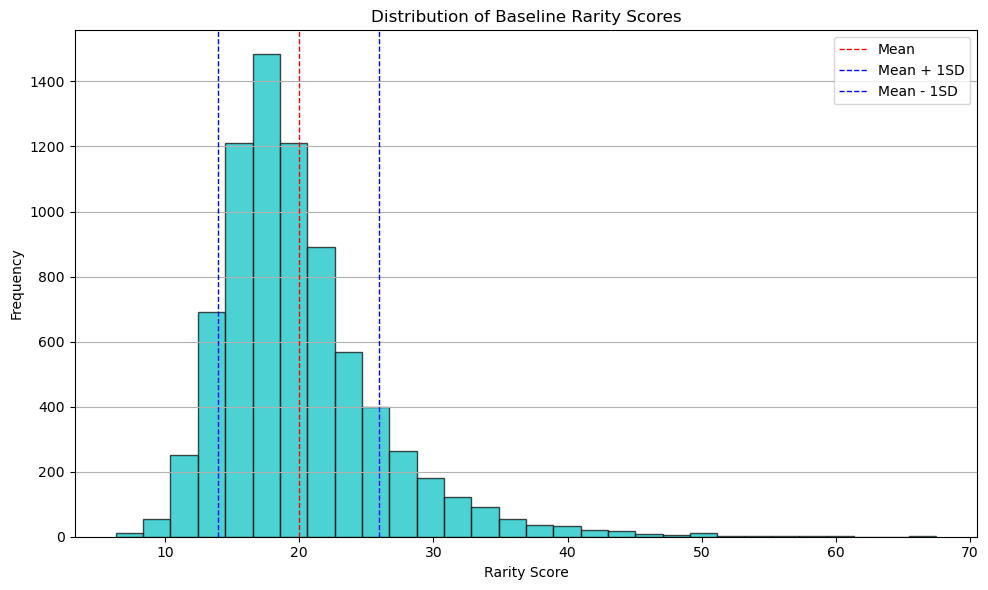

In [132]:
plt.figure(figsize=(10, 6))
plt.hist(baseline_scores, bins=30, color='c', edgecolor='black', alpha=0.7)
plt.axvline(mean_baseline, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_baseline + std_baseline, color='b', linestyle='dashed', linewidth=1, label='Mean + 1SD')
plt.axvline(mean_baseline - std_baseline, color='b', linestyle='dashed', linewidth=1, label='Mean - 1SD')
plt.title('Distribution of Baseline Rarity Scores')
plt.xlabel('Rarity Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Files already downloaded and verified
Index 4104 with lowest score 6.322751925210661 
Index 831 with highest score 67.47475233511533 
Index 17 with most frequent score 15.359124294540576


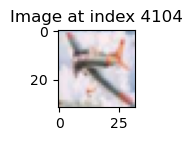

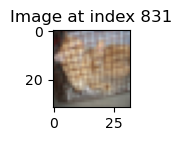

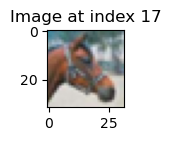

In [118]:
import torch
from torchvision import datasets, transforms, models
from PIL import Image

transform = transforms.Compose([
    transforms.ToTensor()
])
data_test = datasets.CIFAR10(
        root="./data/",
        transform = transform,
        train=False,
        download=True
)
data_loader_test = torch.utils.data.DataLoader(dataset=data_test, batch_size=64)

min_idx = baseline_scores.argmin()
max_idx = baseline_scores.argmax()
mode_idx = np.argmax(np.bincount(baseline_scores.astype(int)))
print(f"Index {min_idx} with lowest score {baseline_scores[min_idx]} ")
print(f"Index {max_idx} with highest score {baseline_scores[max_idx]} ")
print(f"Index {mode_idx} with most frequent score {baseline_scores[mode_idx]}")


def display_image(index, data_loader):
    for i, (imgs, _) in enumerate(data_loader):
        if index < (i+1)*64:
            plt.figure(figsize=(1,1))  #smaller figure size to make it look less blurry
            plt.imshow(np.transpose(imgs[index - i*64].numpy(), (1, 2, 0)))
            plt.title(f"Image at index {index}")
            plt.show()
            break



display_image(min_idx, data_loader_test)
display_image(max_idx, data_loader_test)
display_image(mode_idx, data_loader_test)


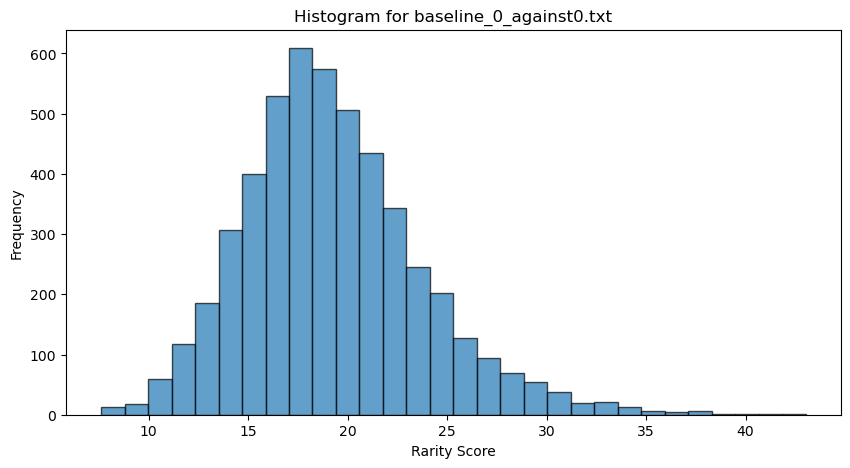

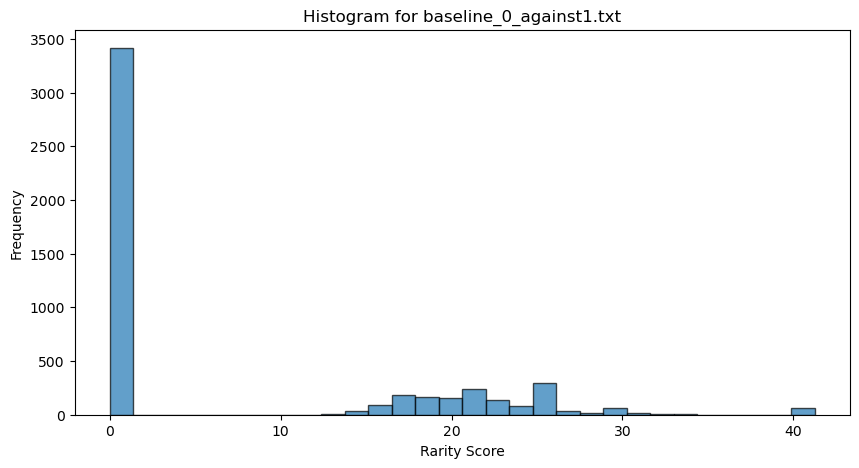

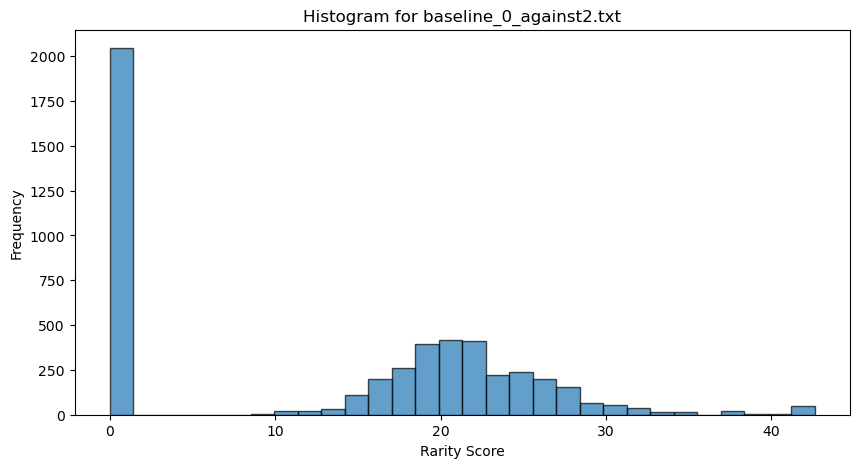

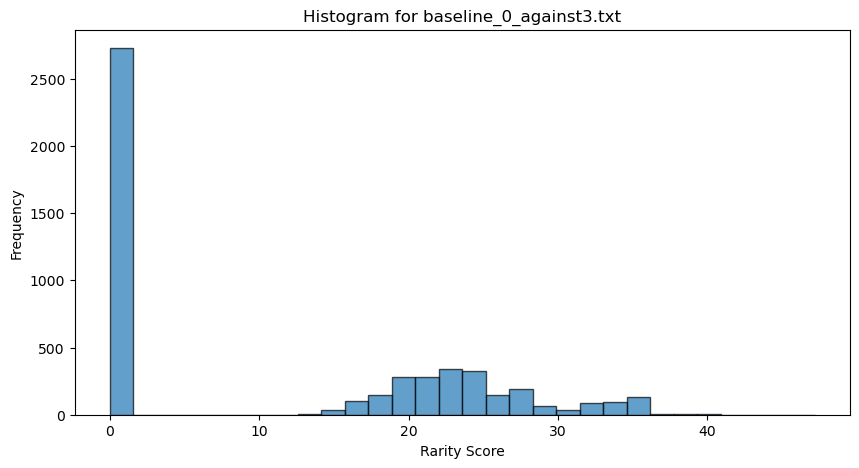

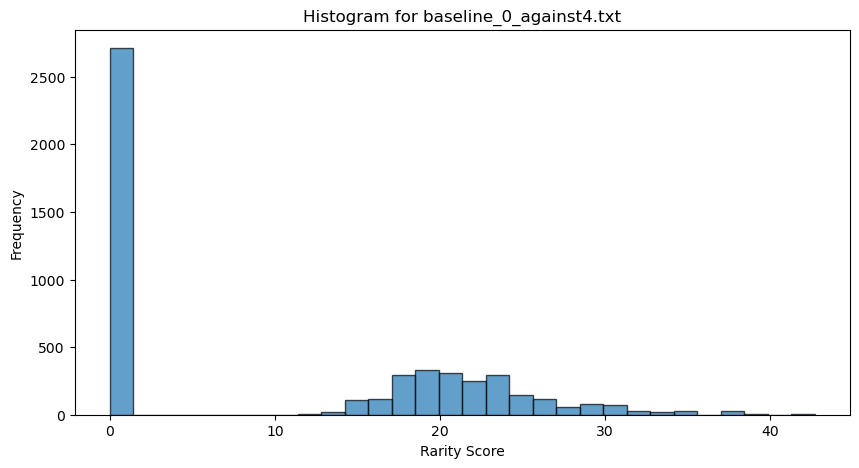

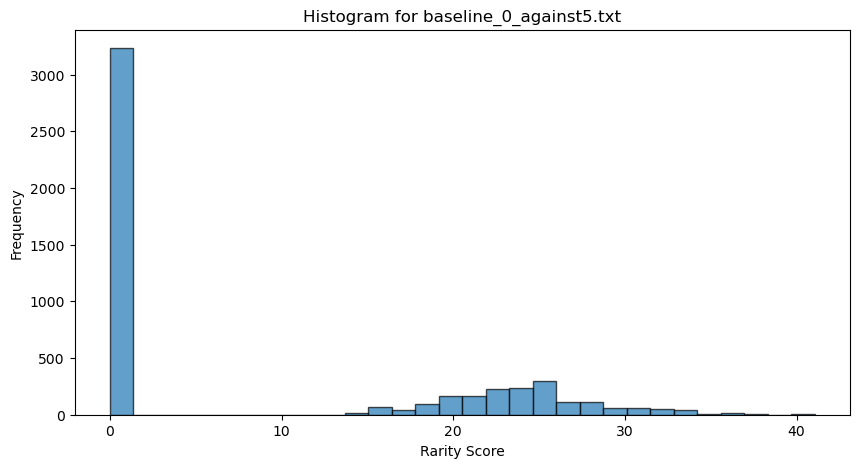

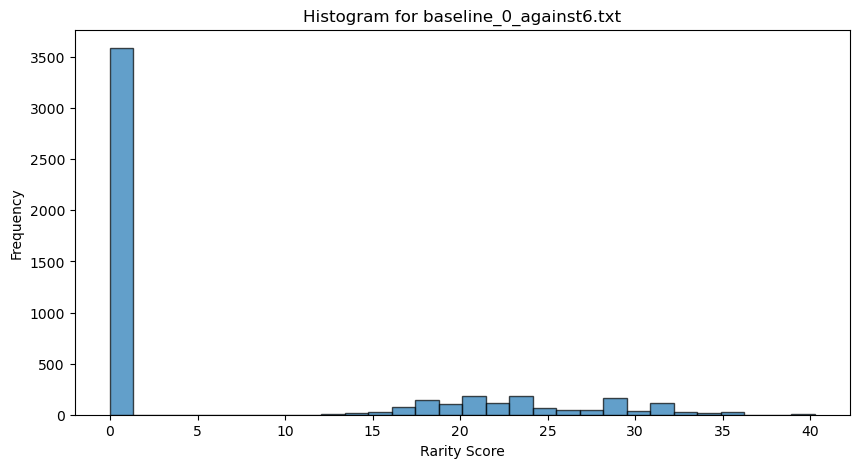

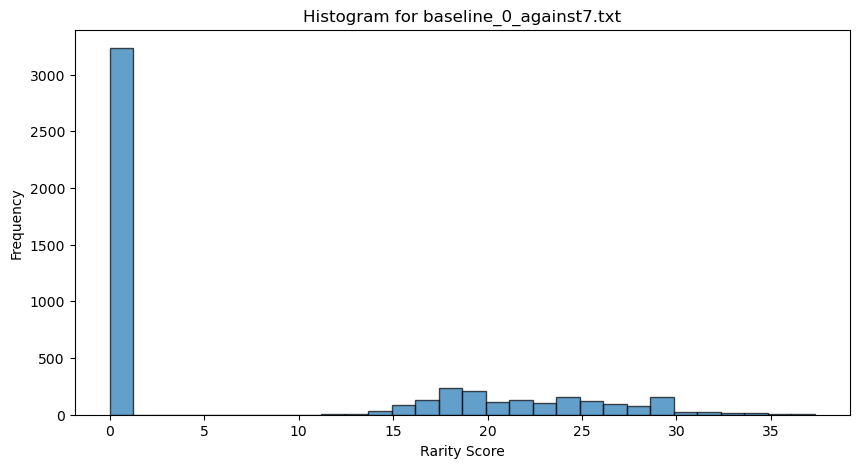

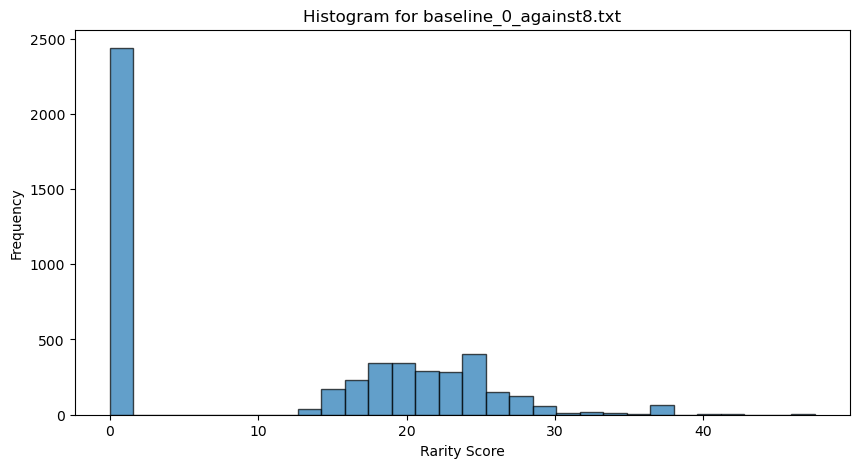

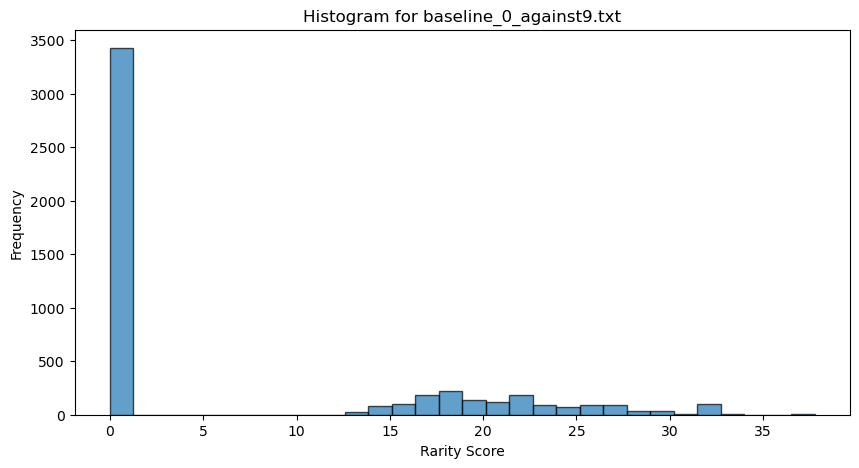

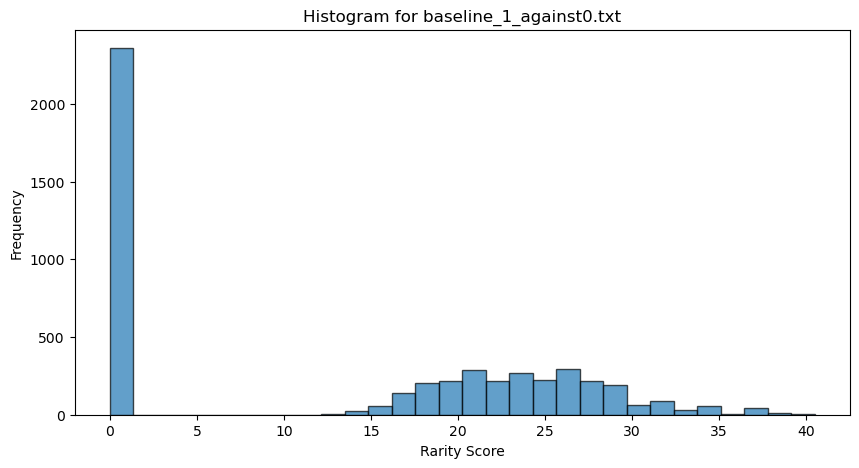

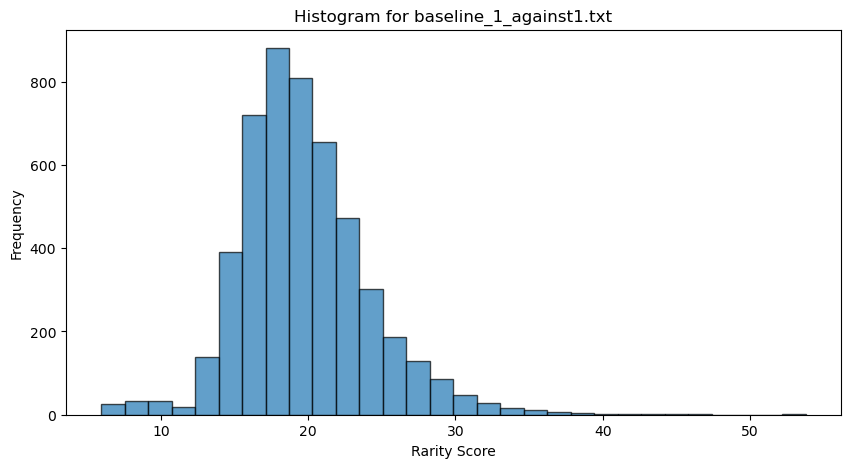

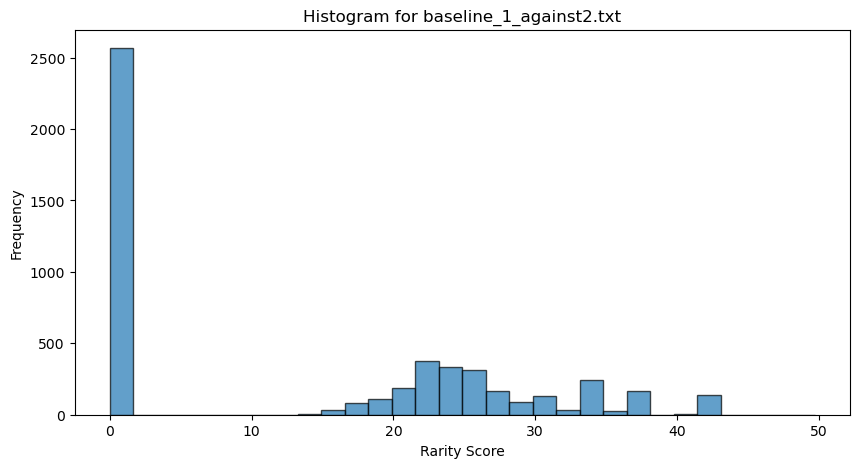

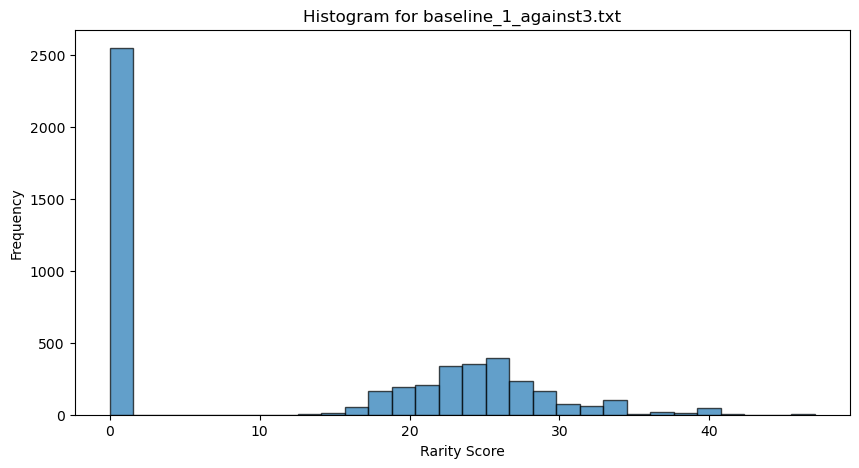

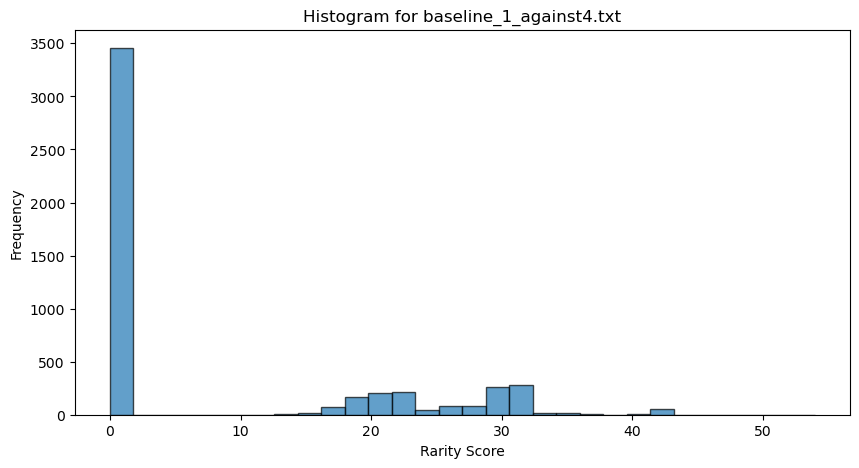

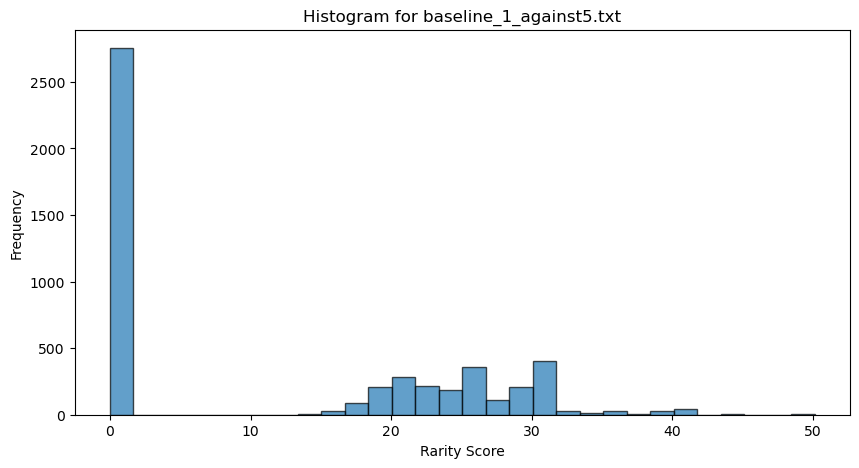

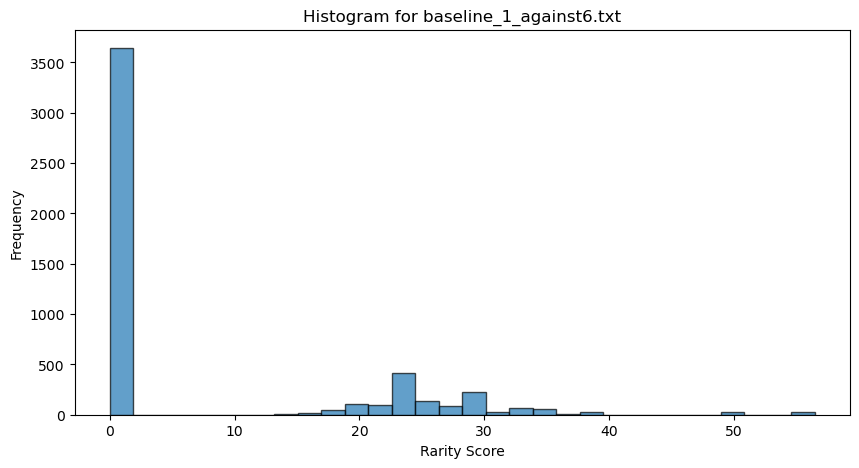

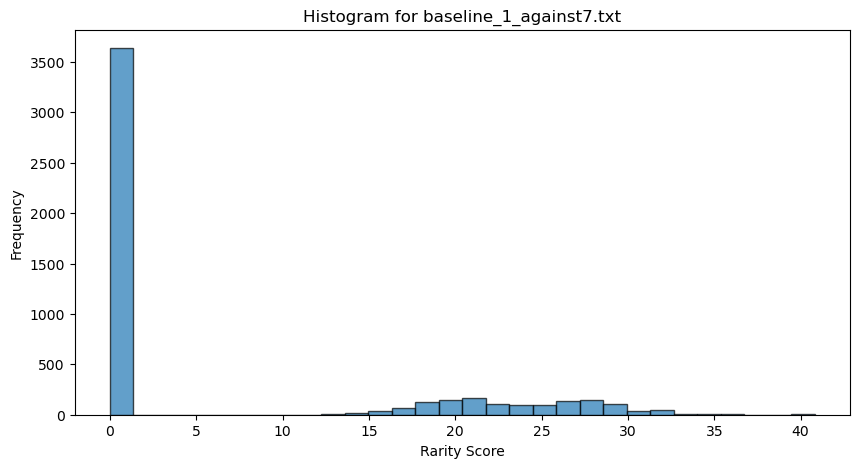

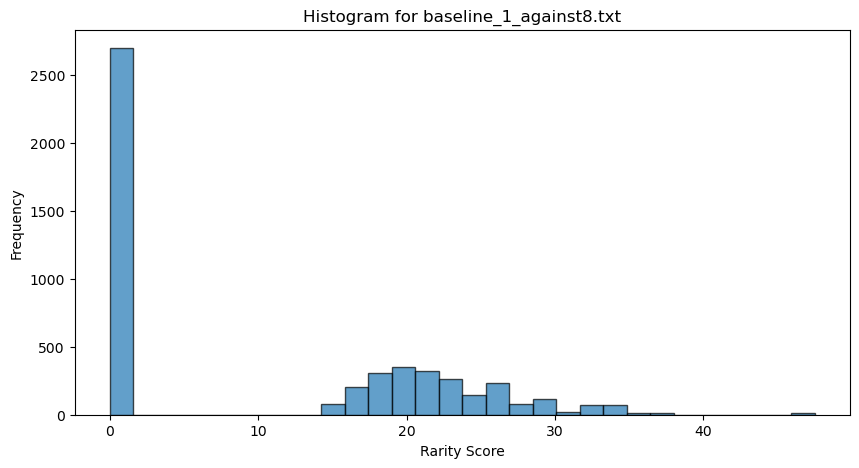

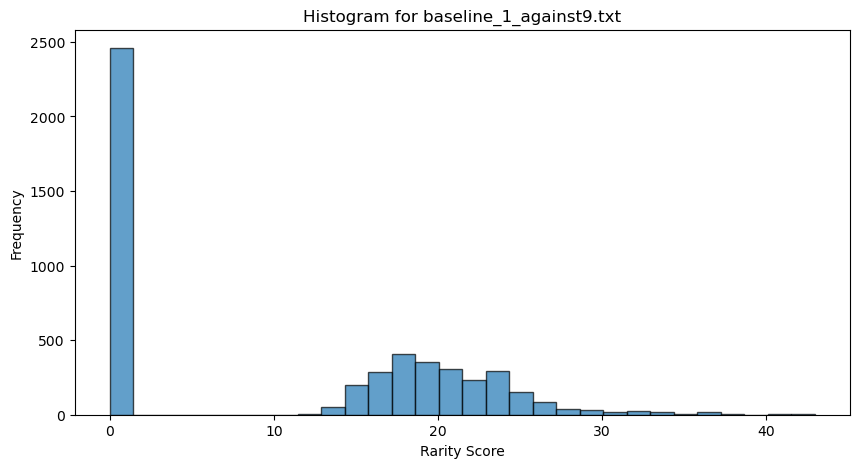

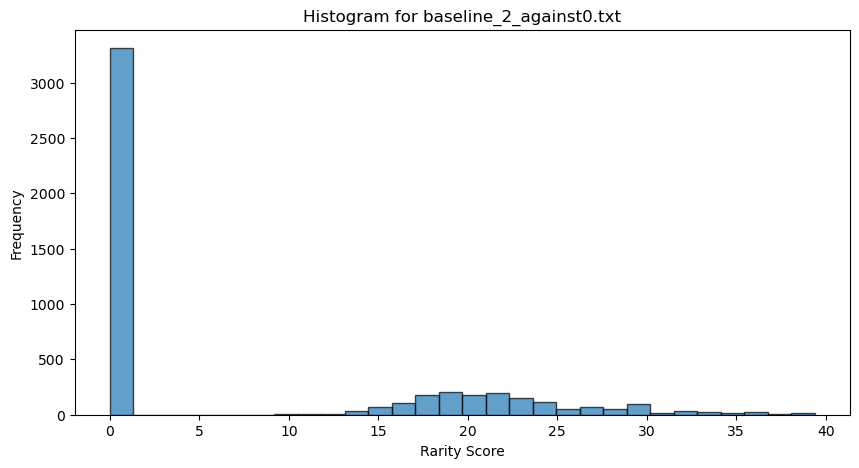

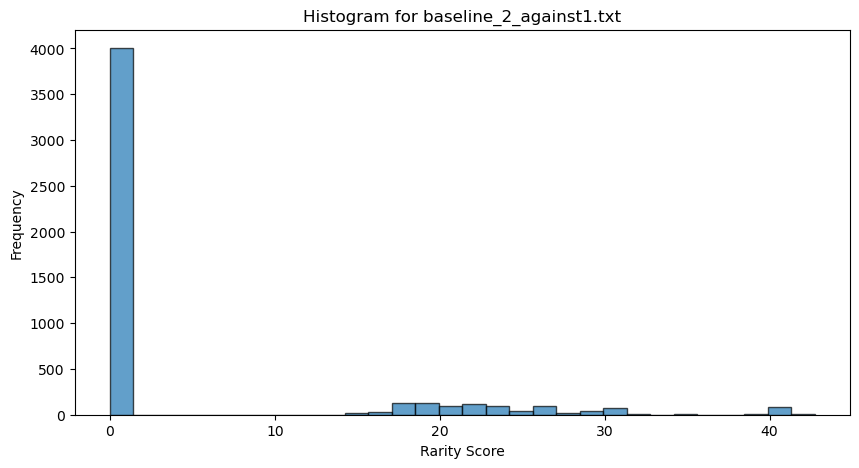

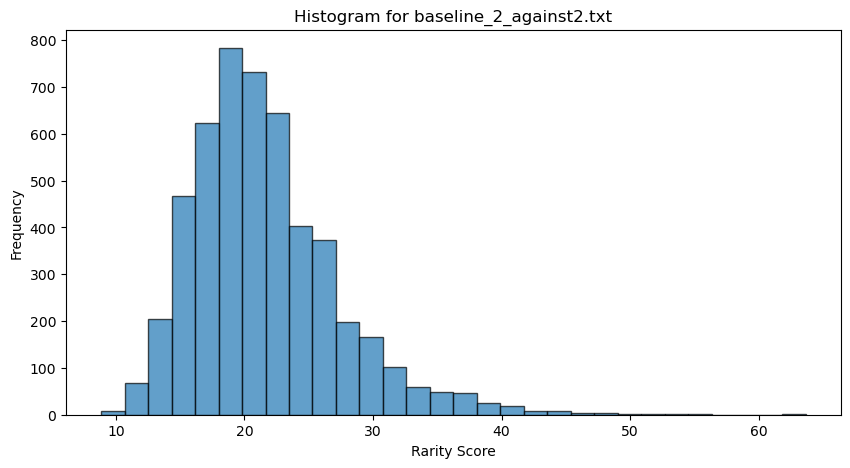

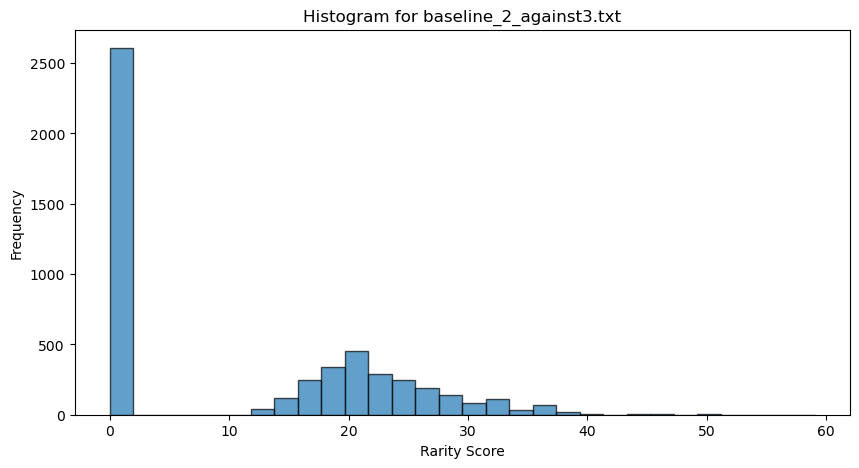

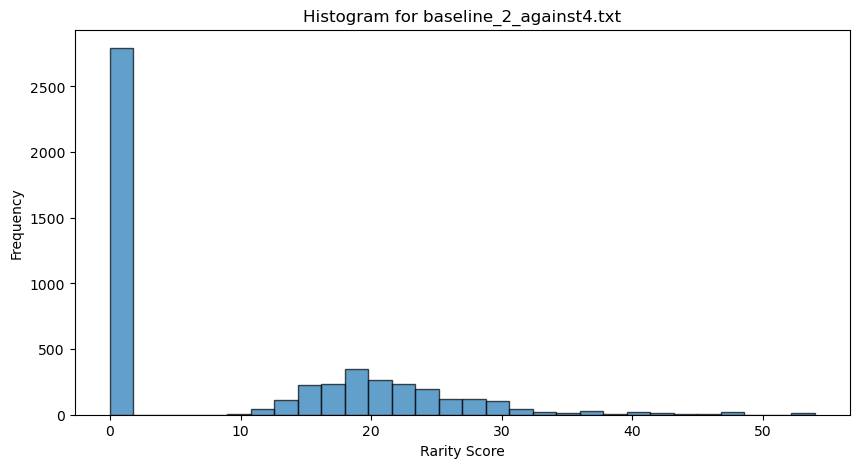

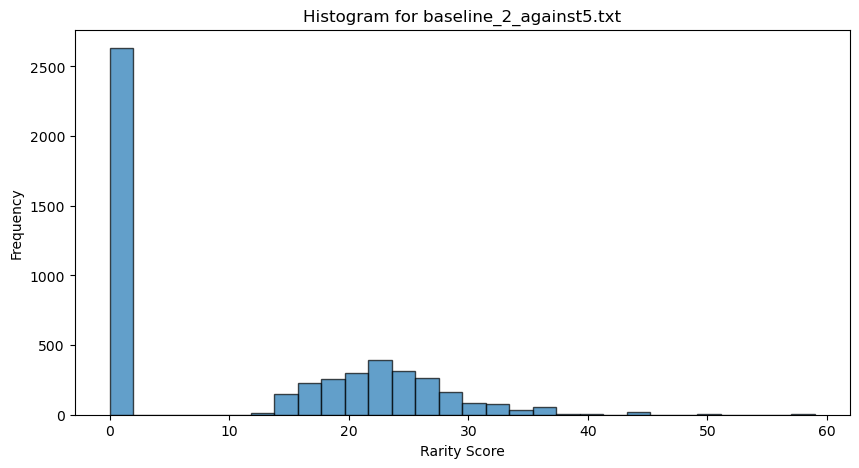

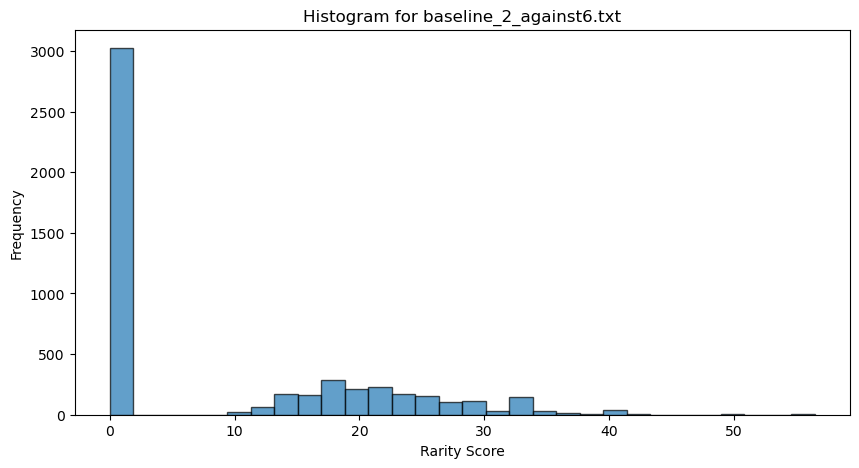

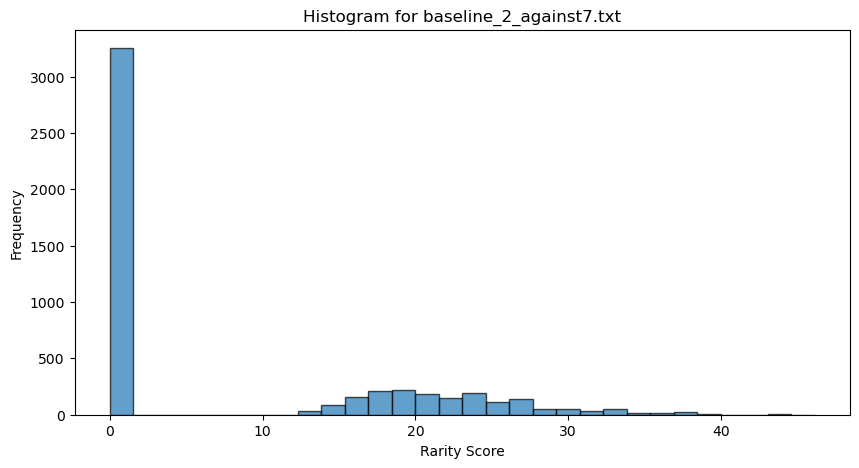

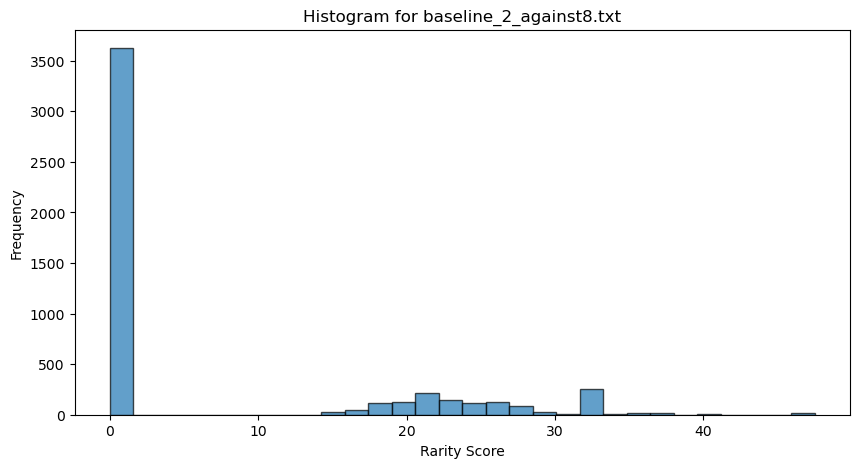

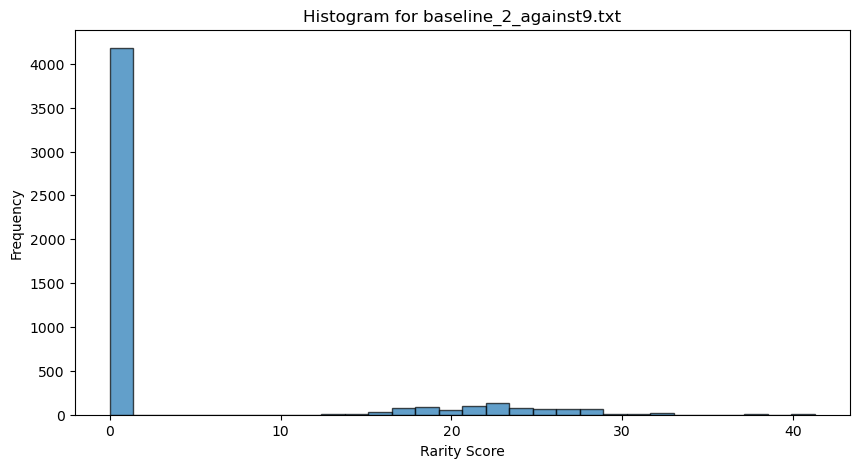

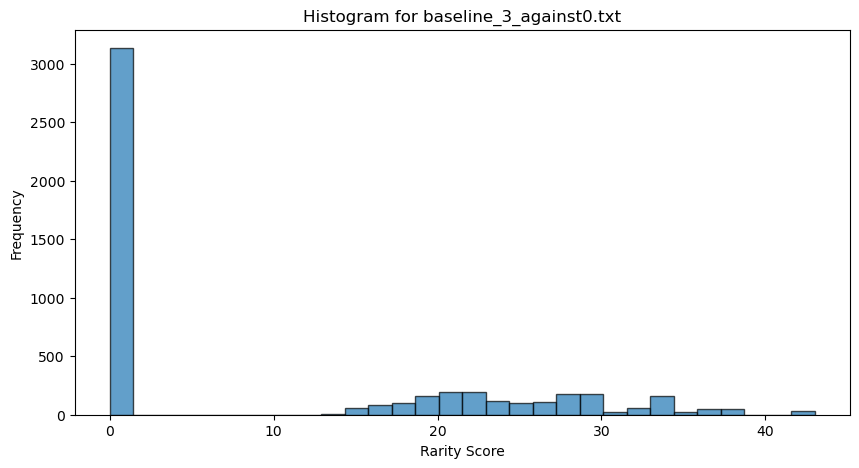

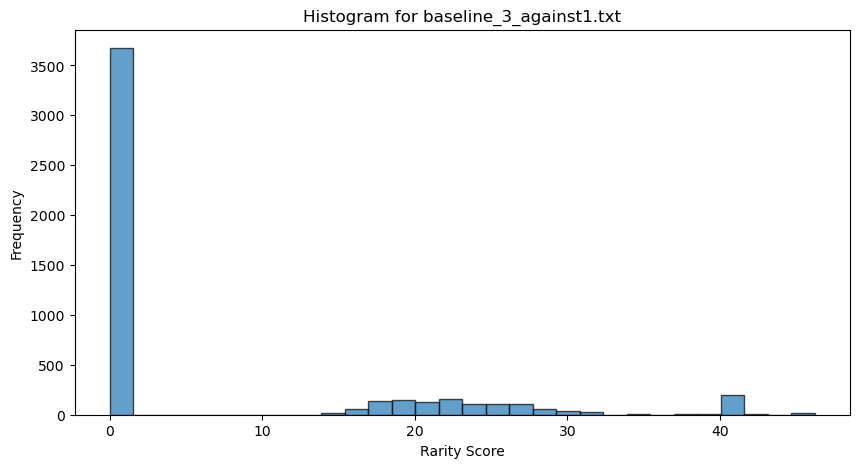

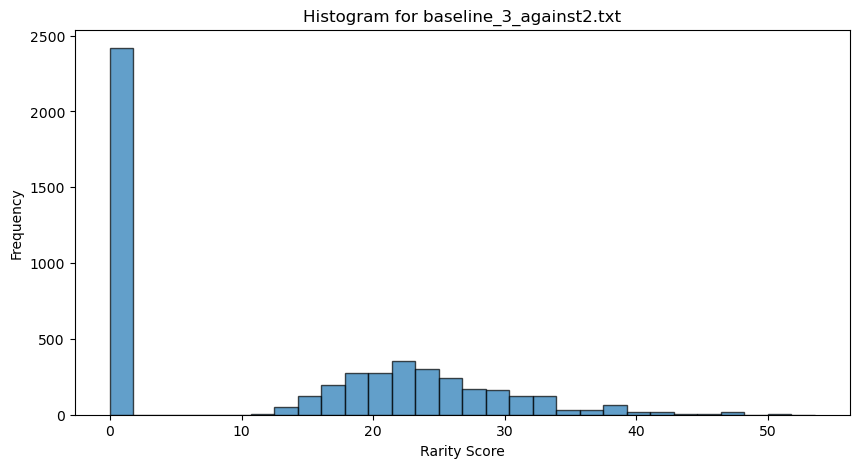

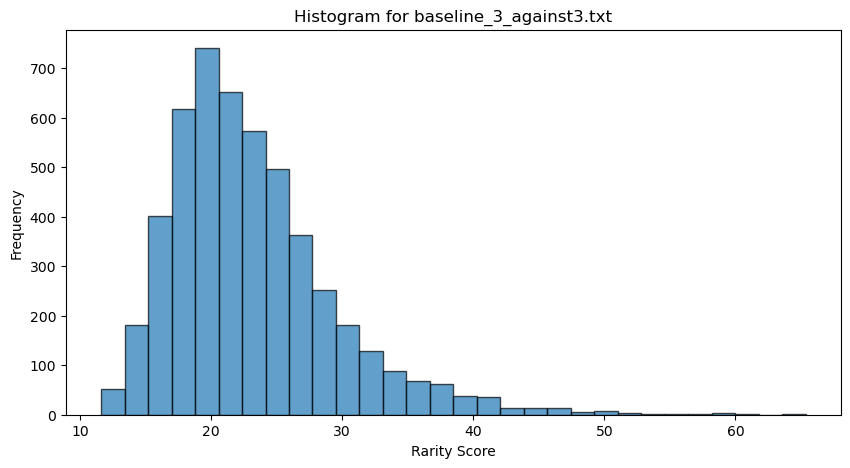

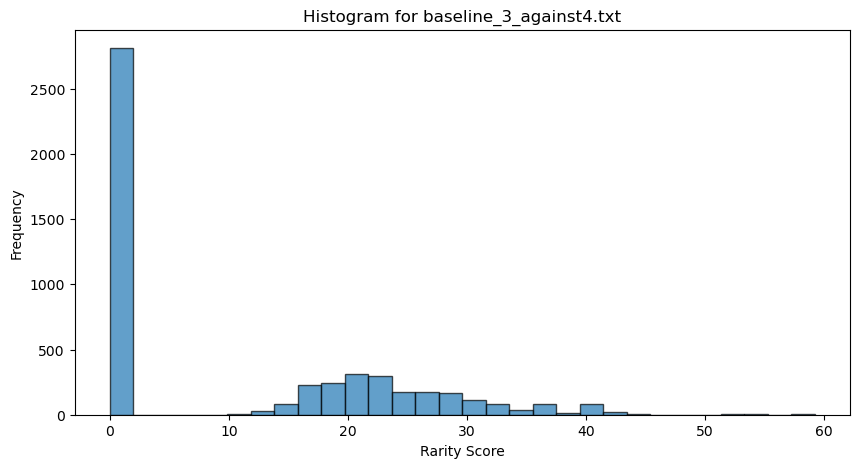

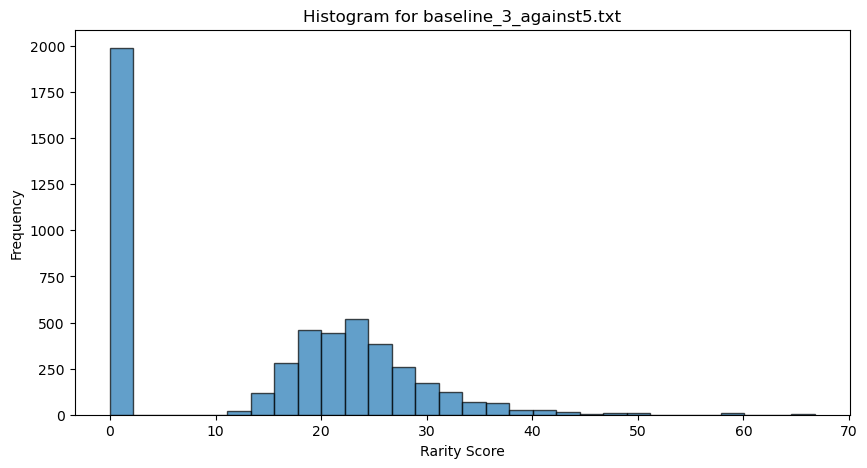

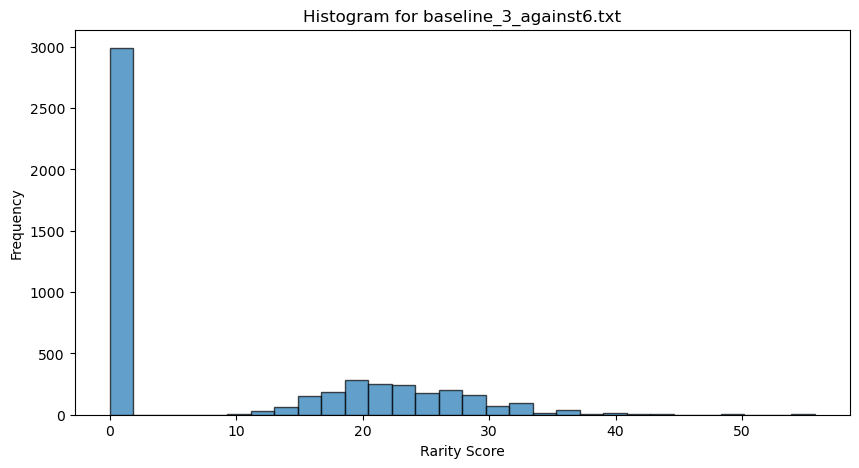

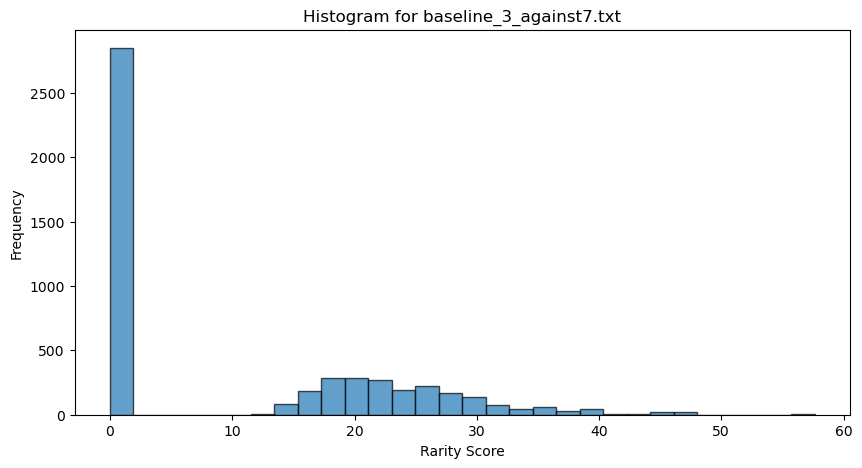

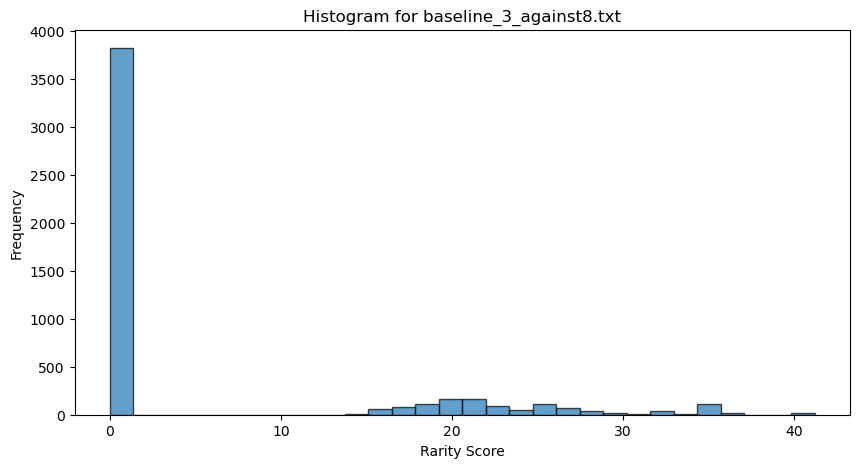

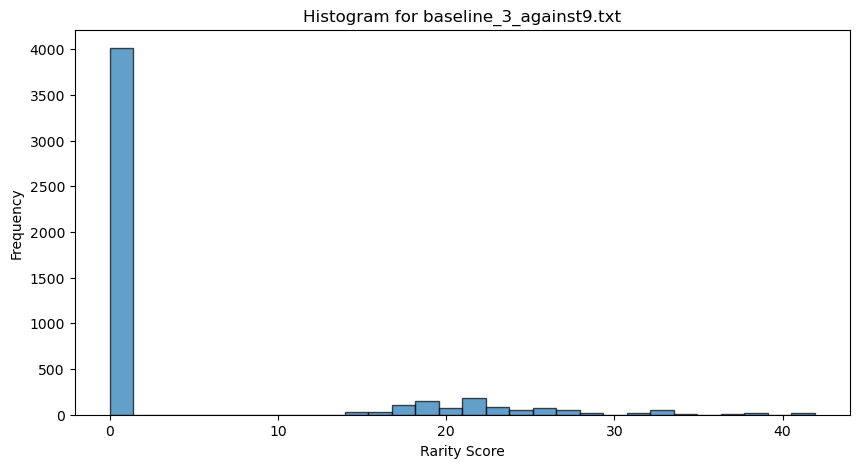

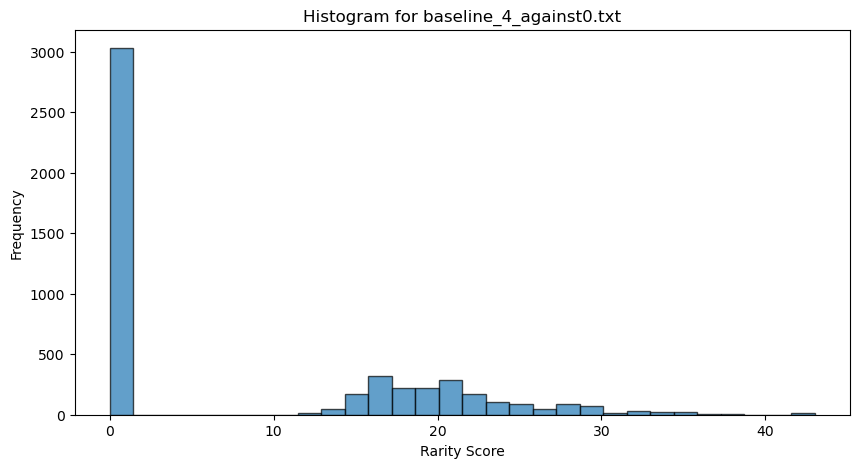

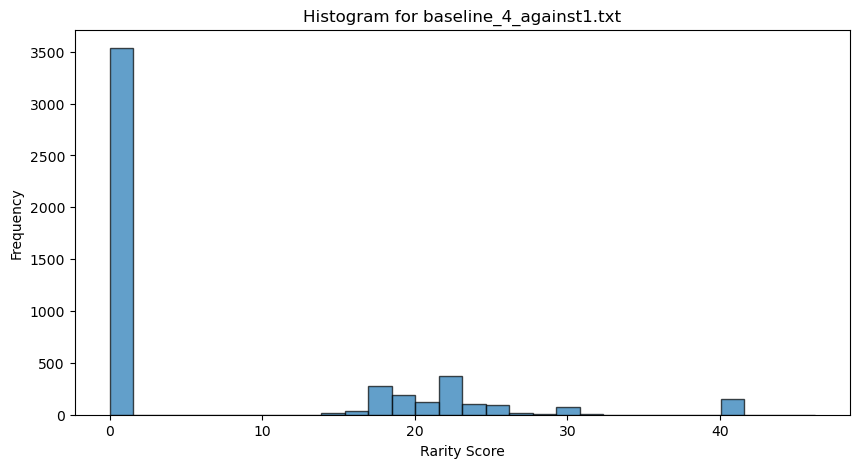

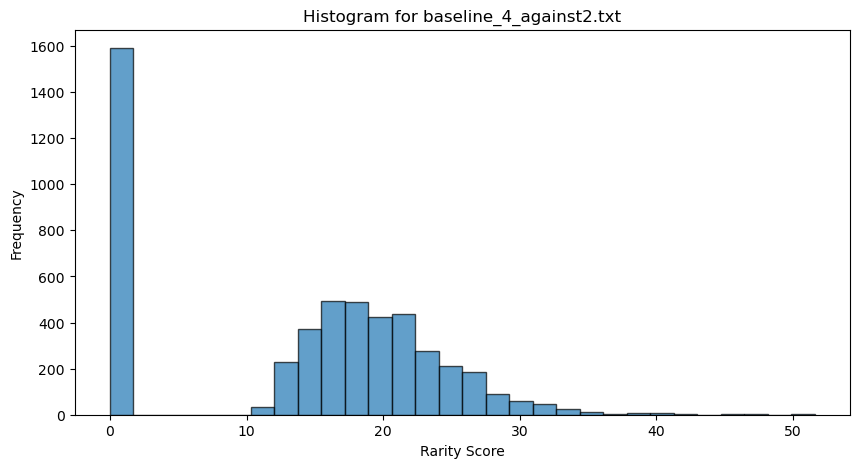

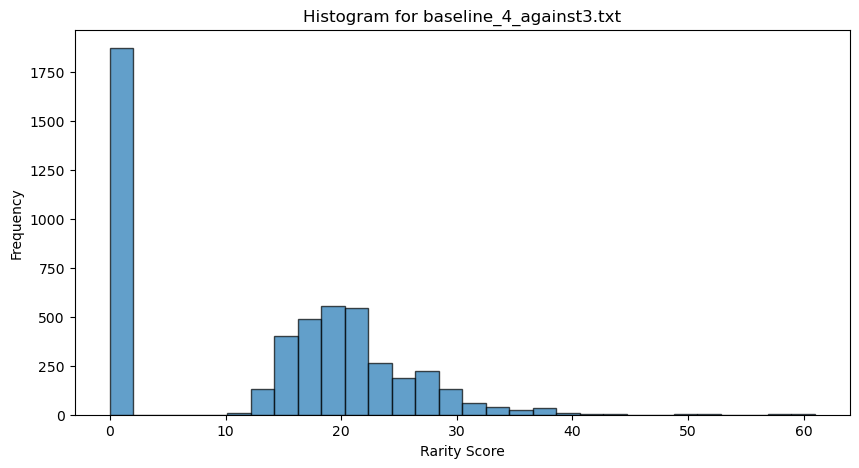

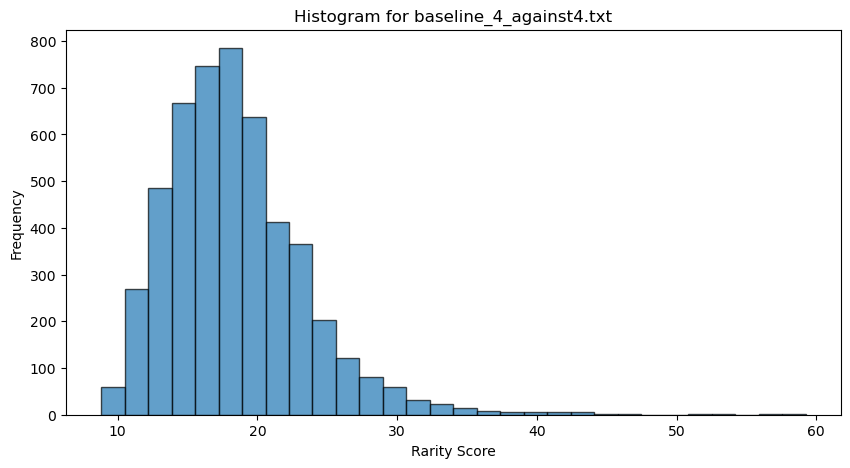

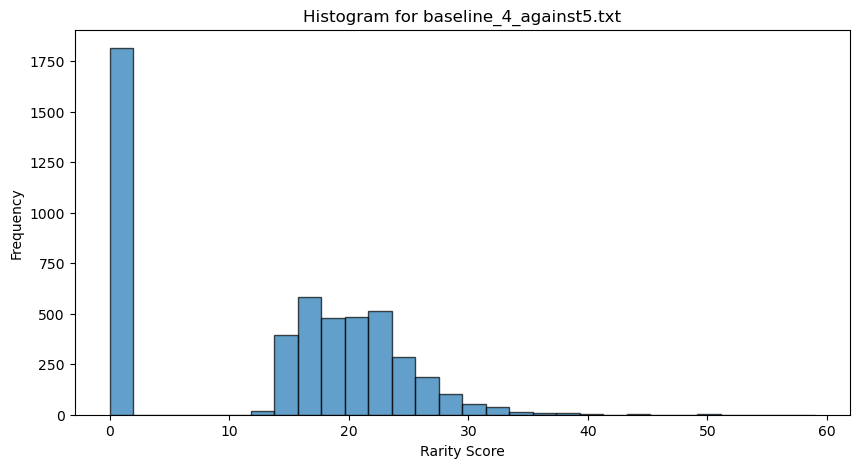

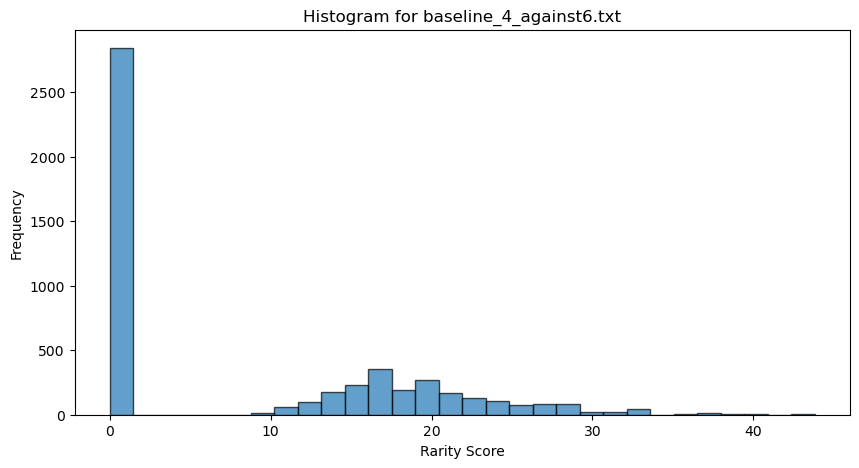

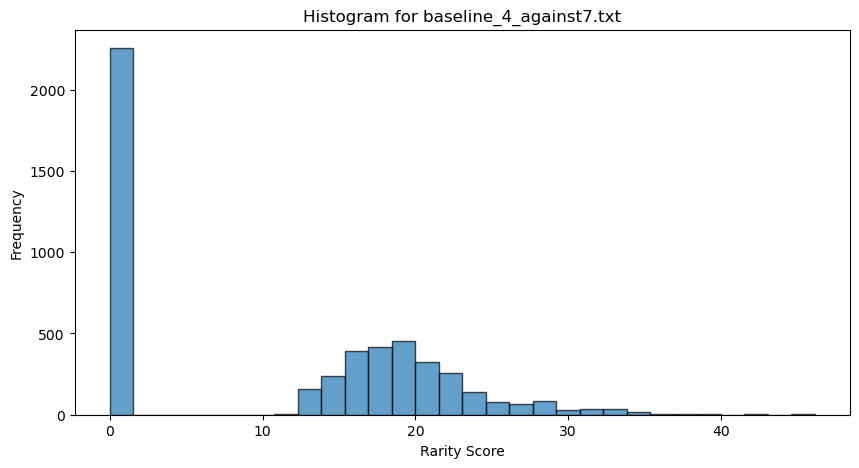

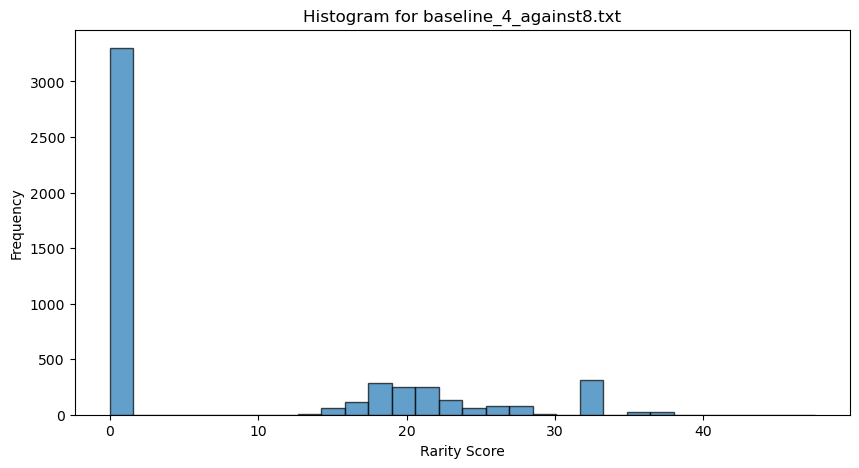

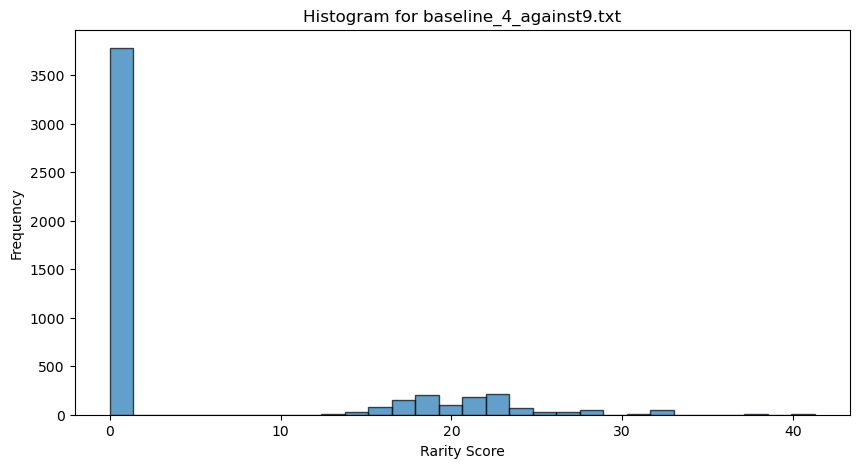

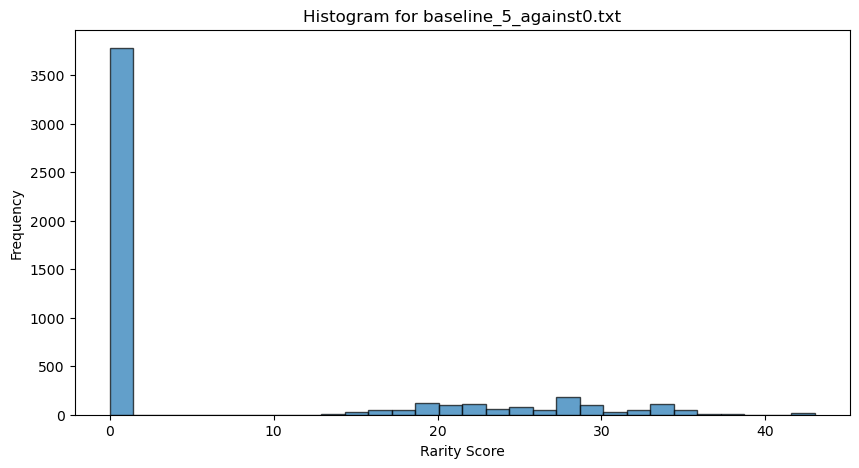

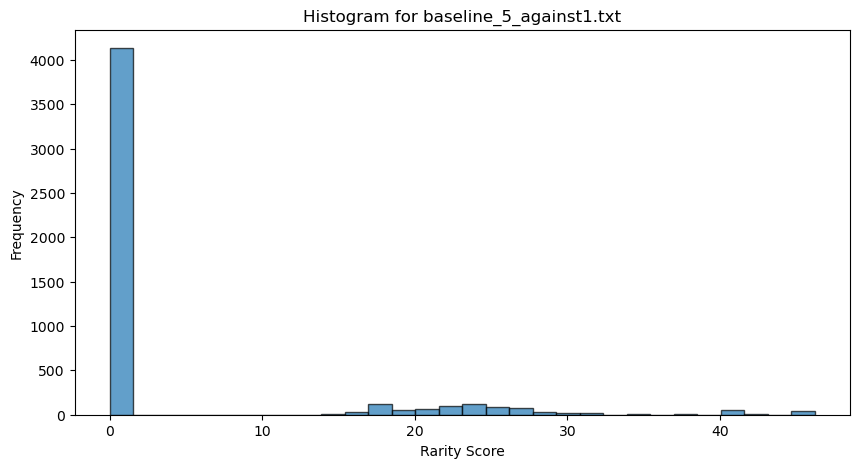

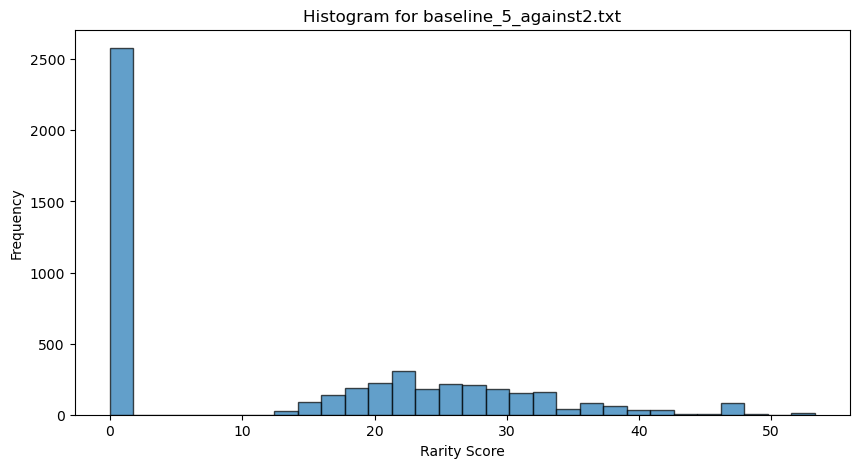

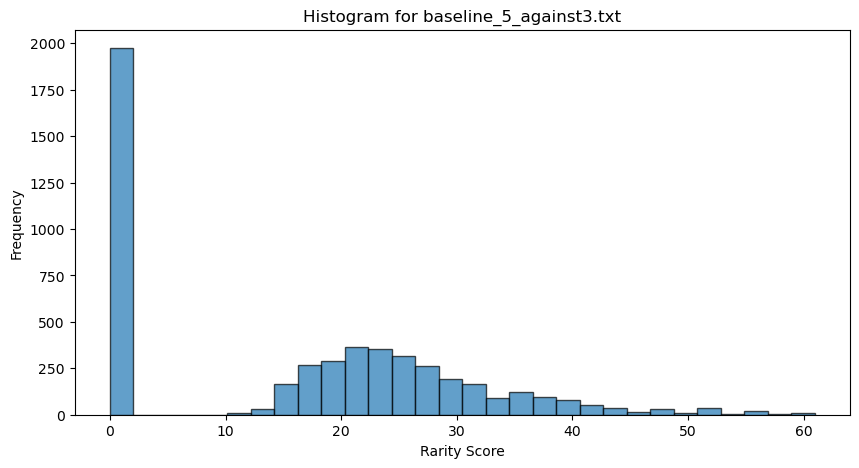

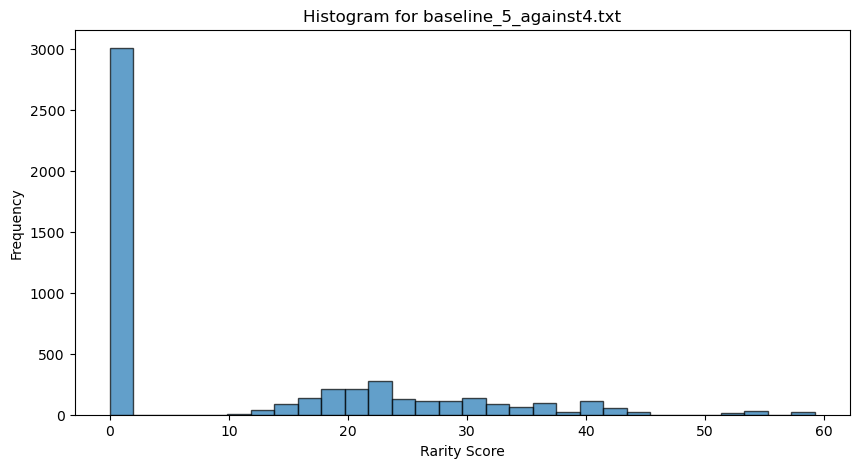

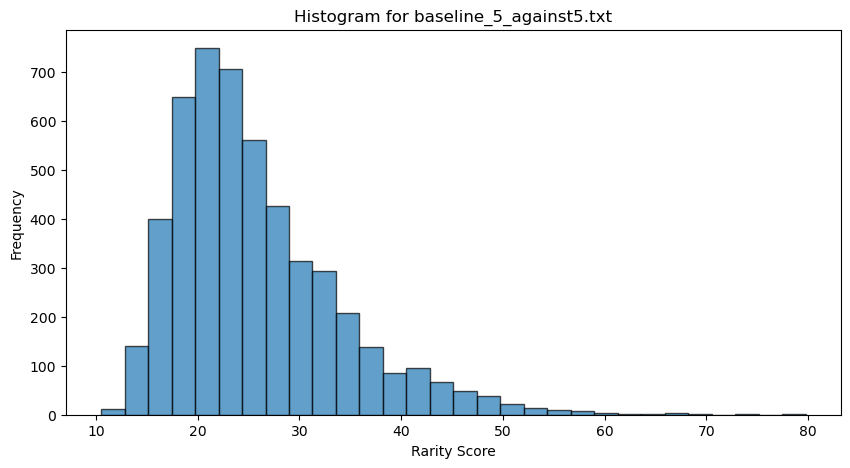

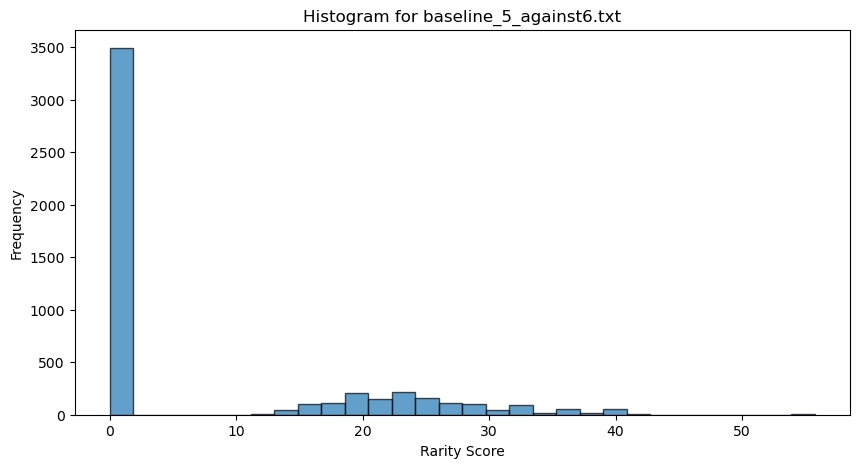

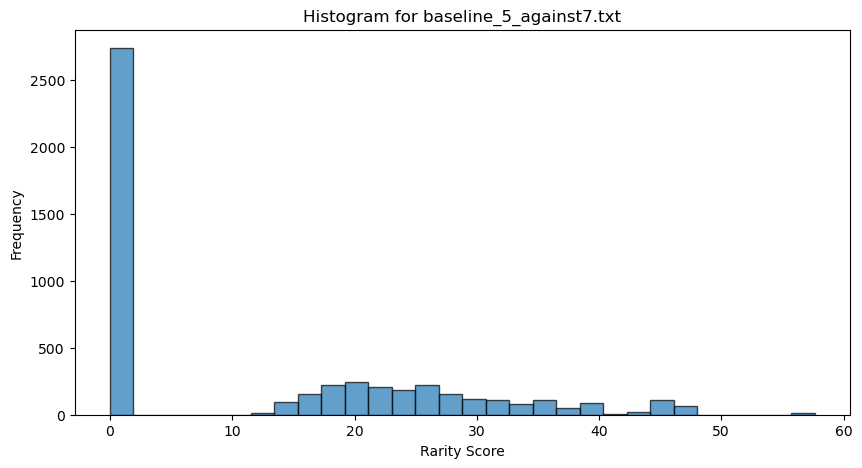

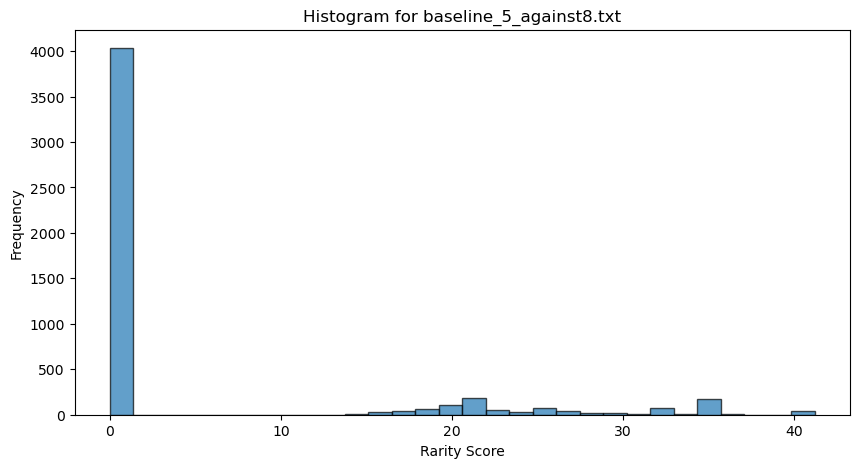

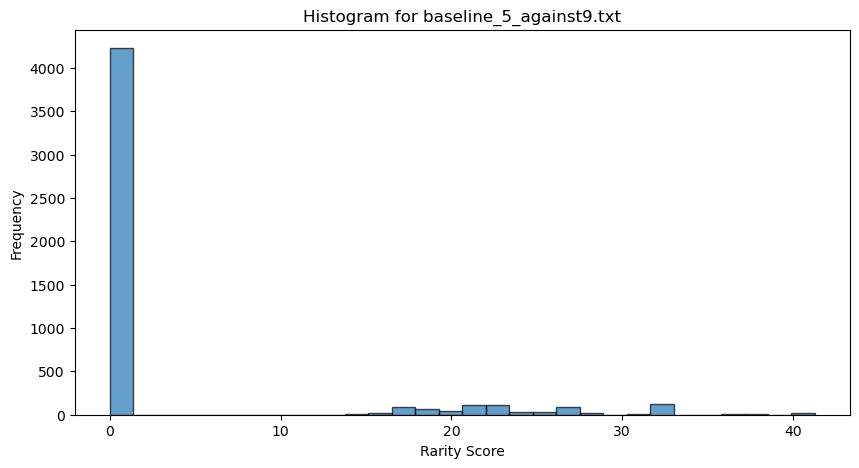

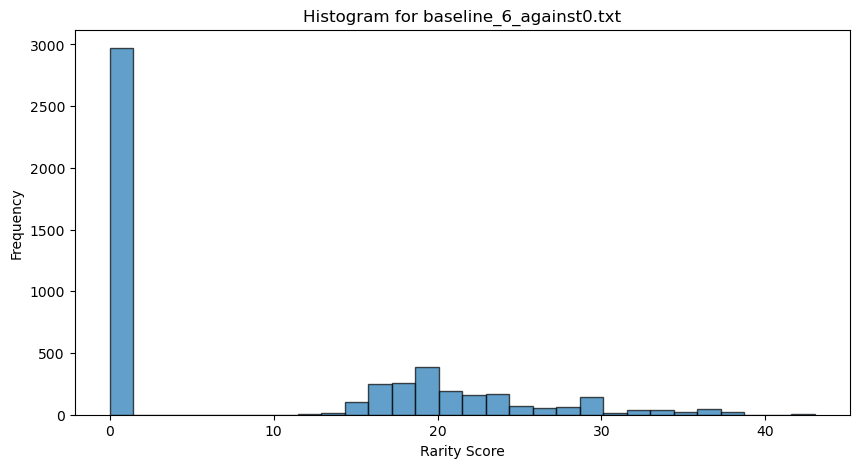

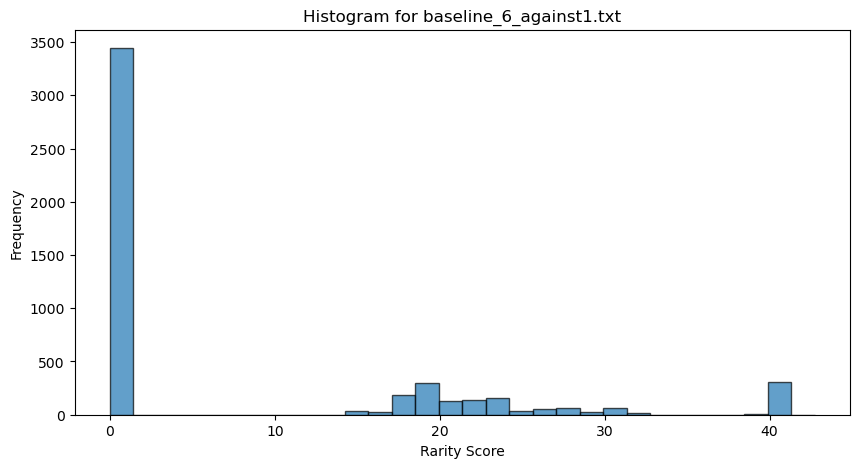

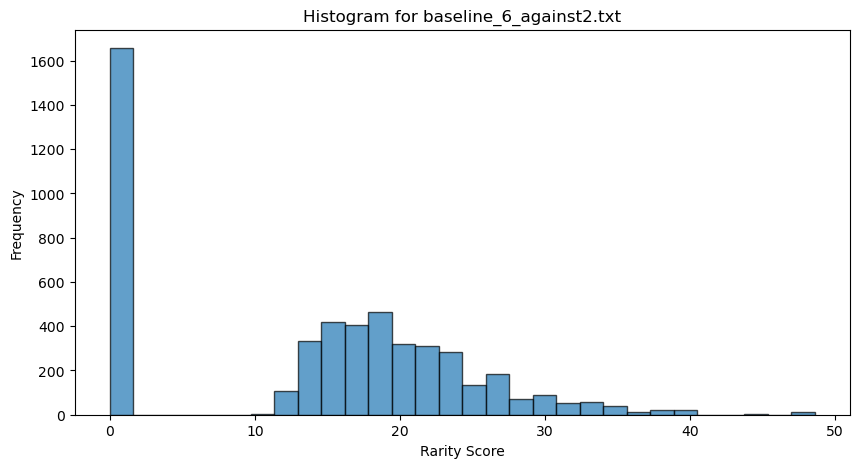

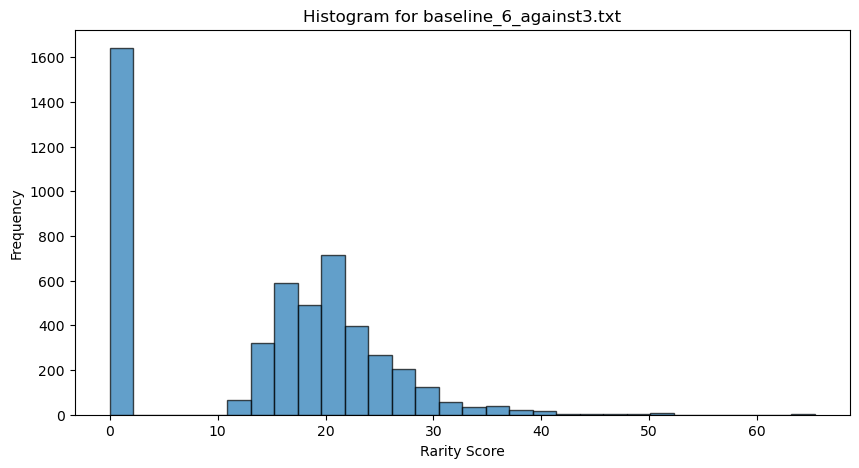

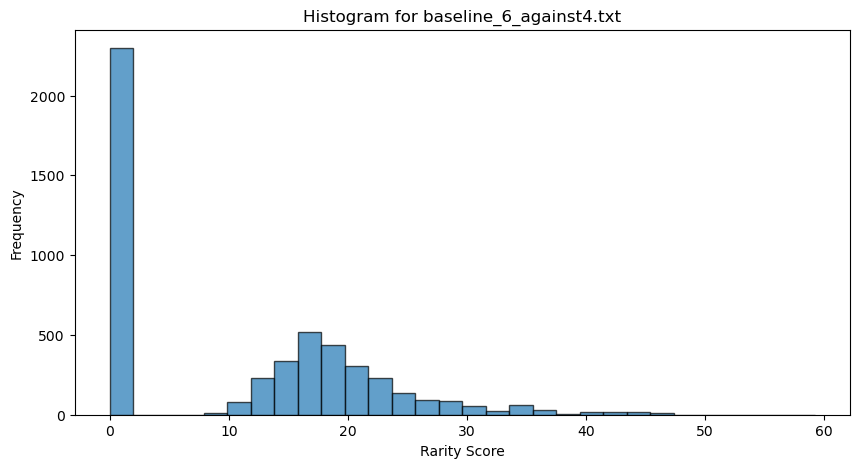

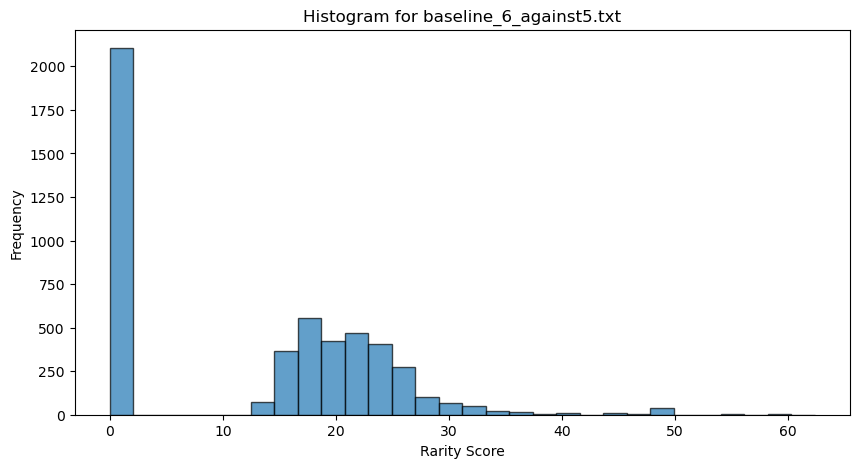

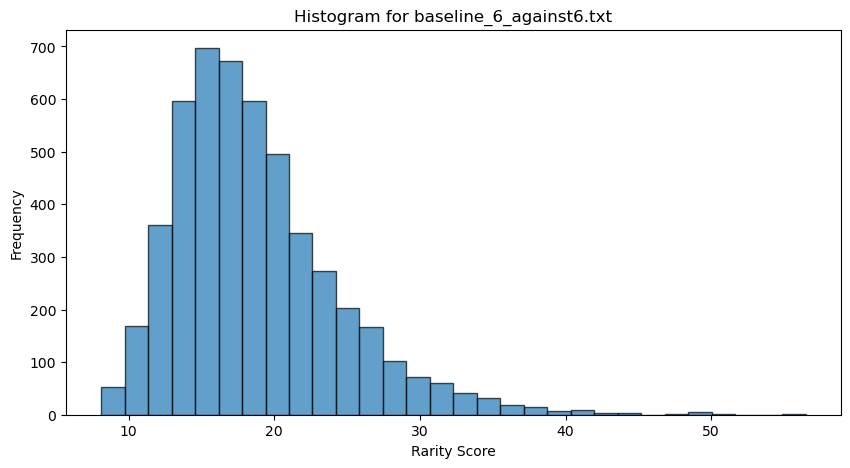

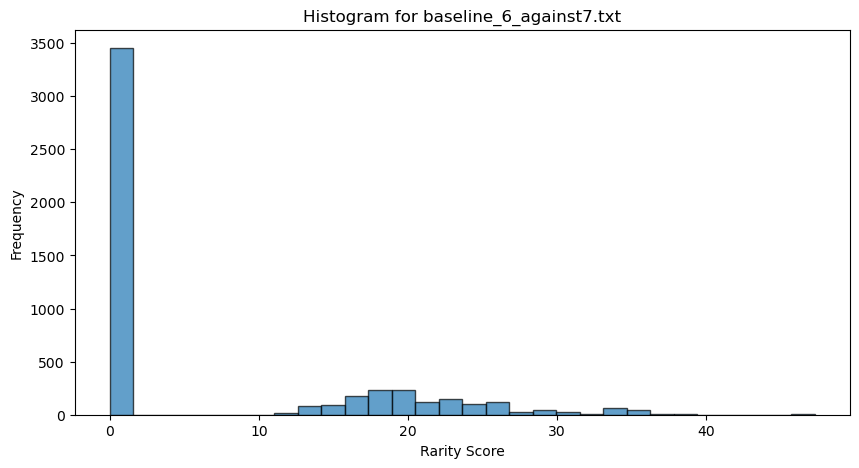

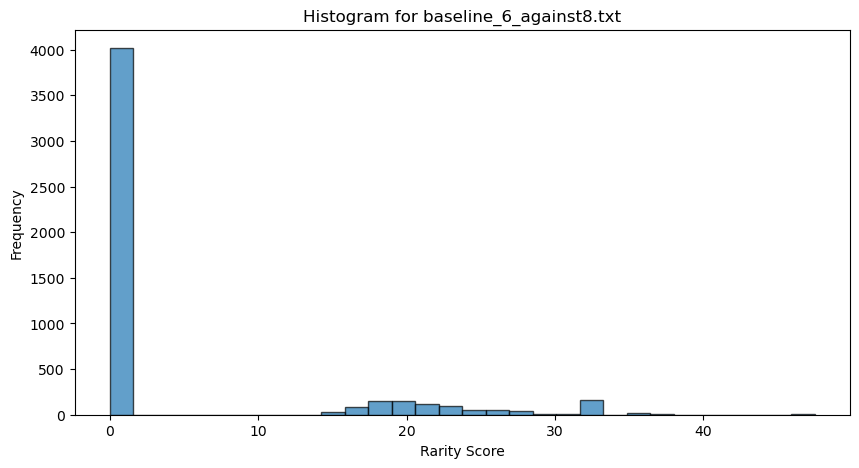

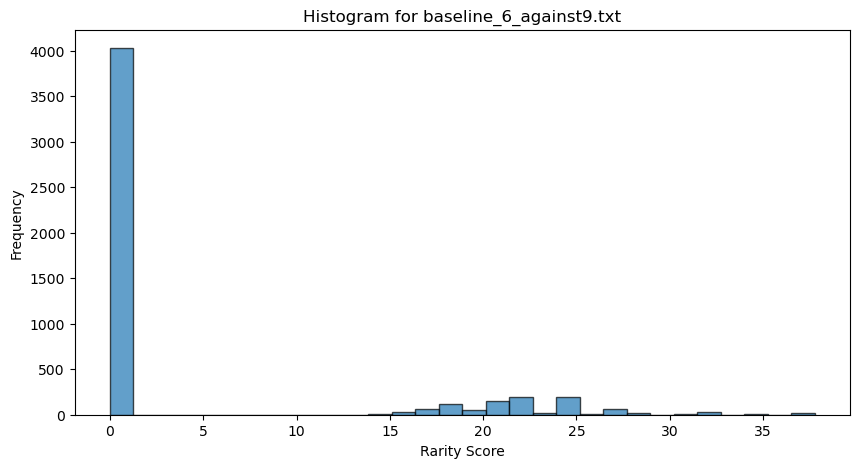

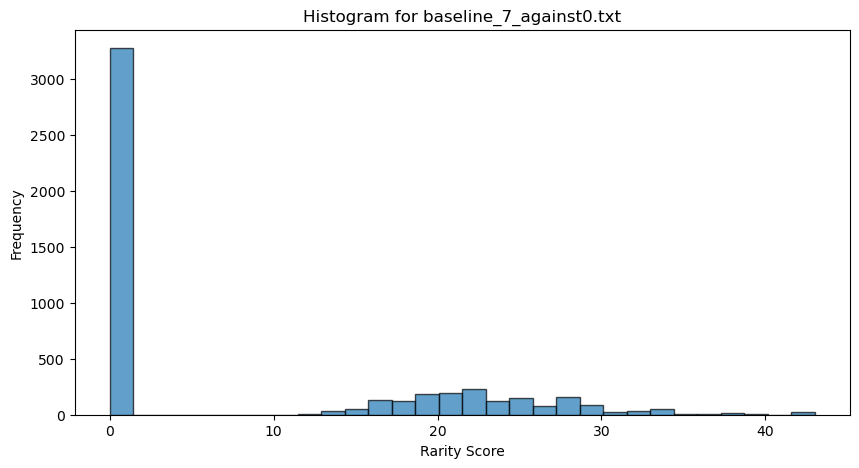

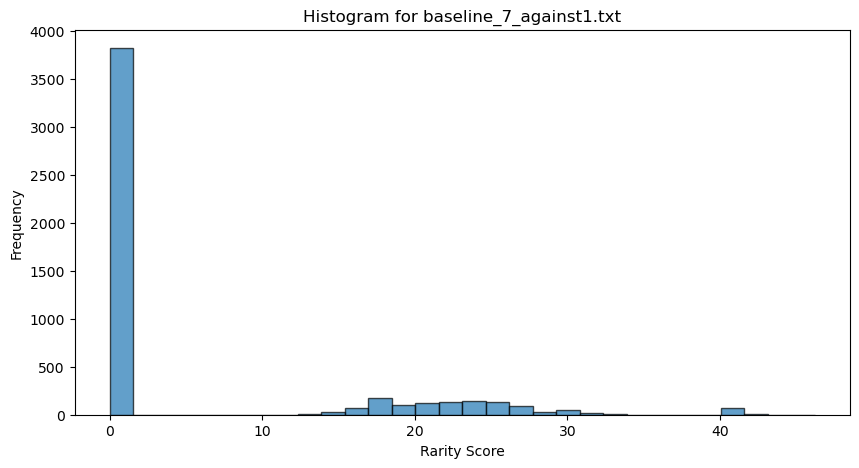

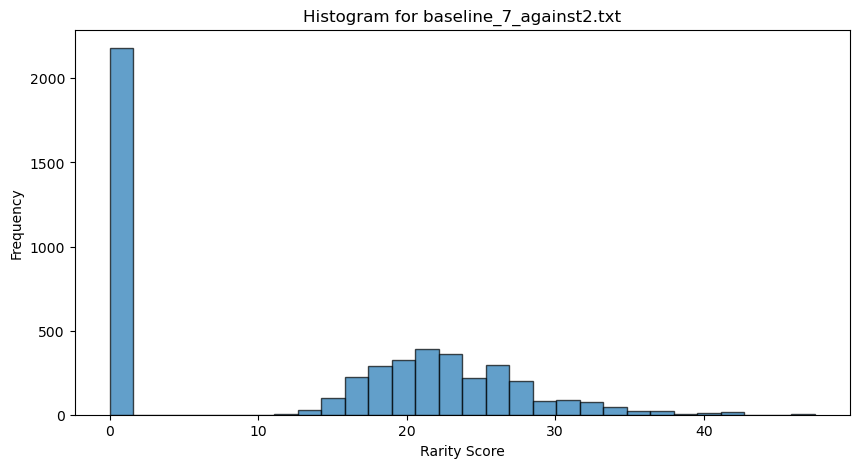

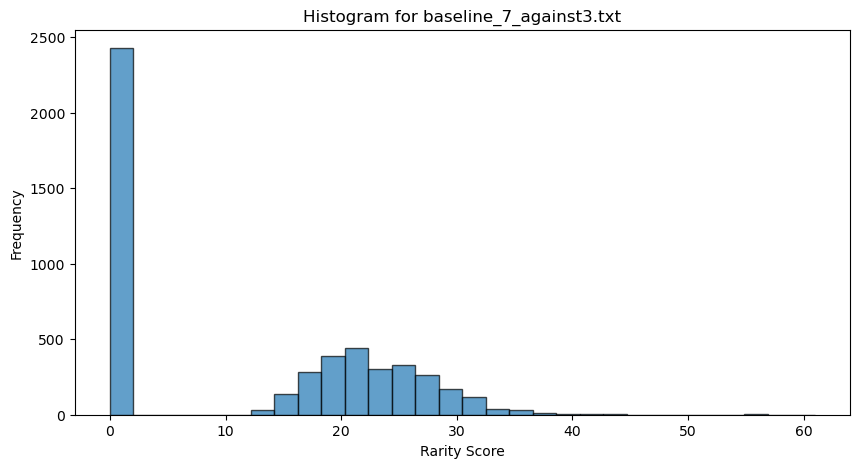

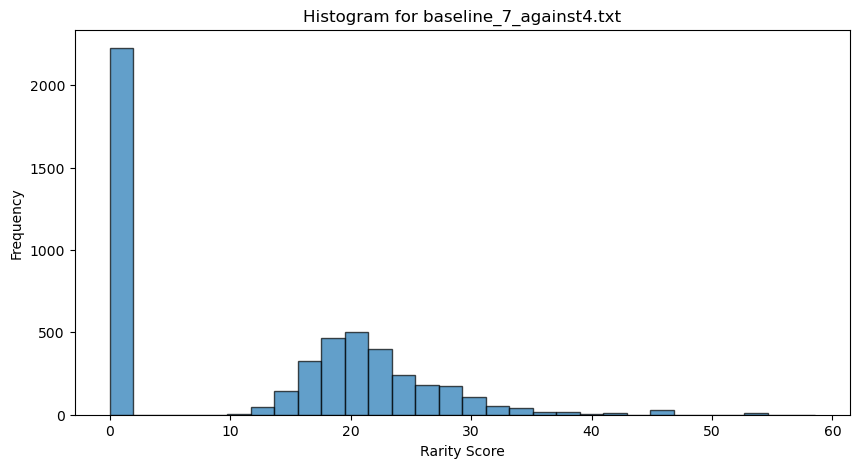

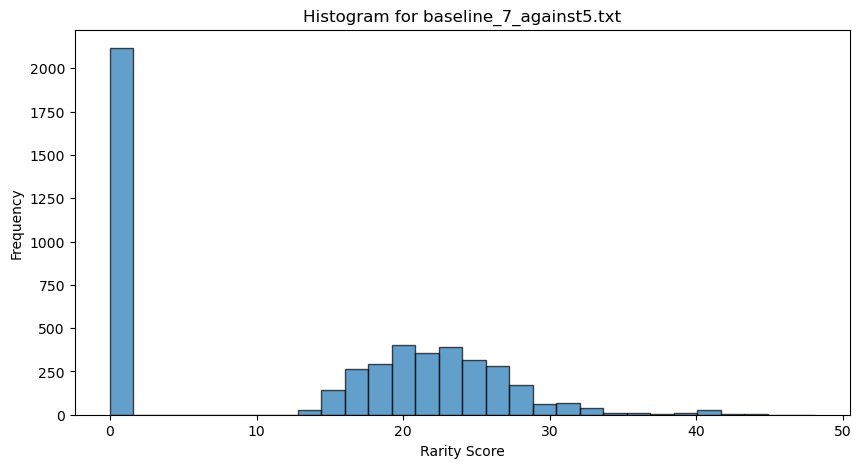

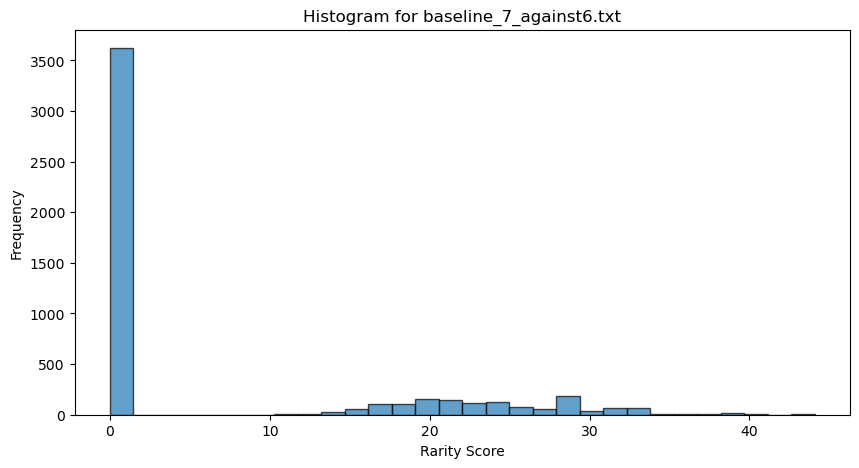

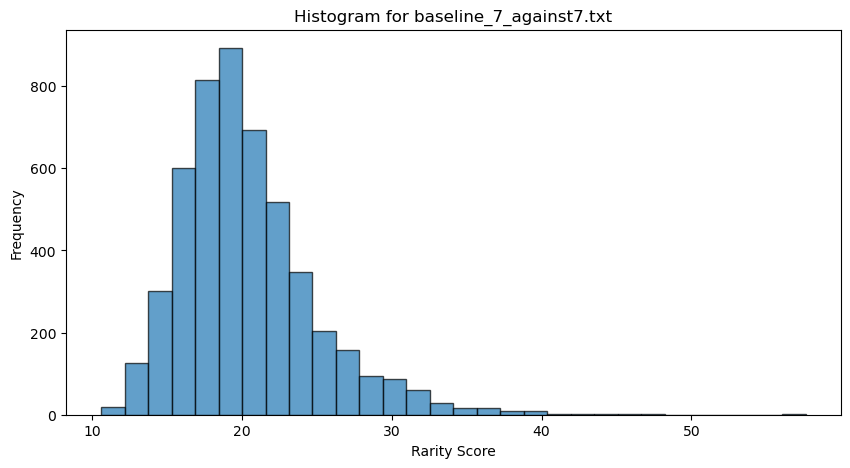

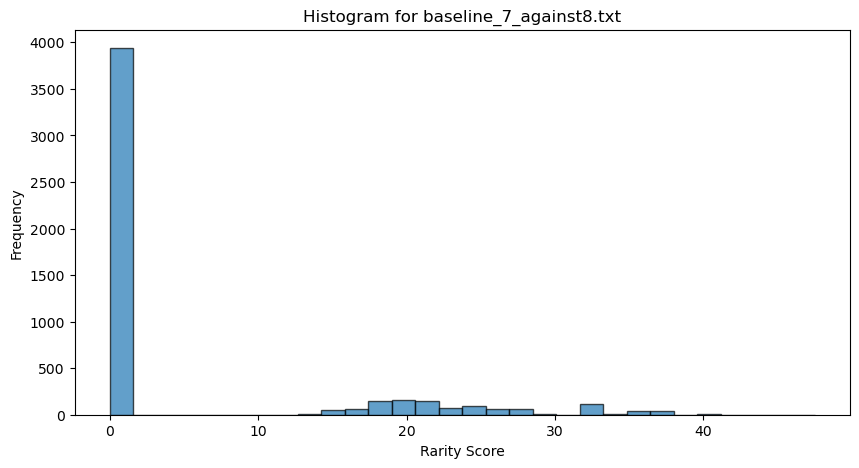

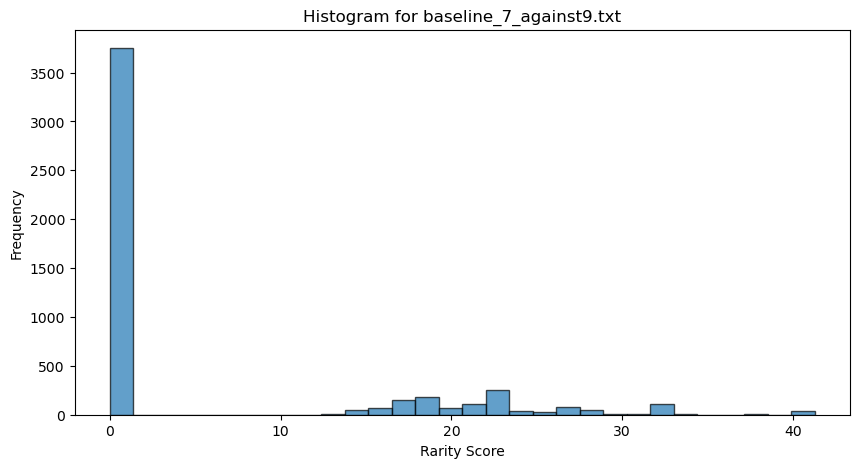

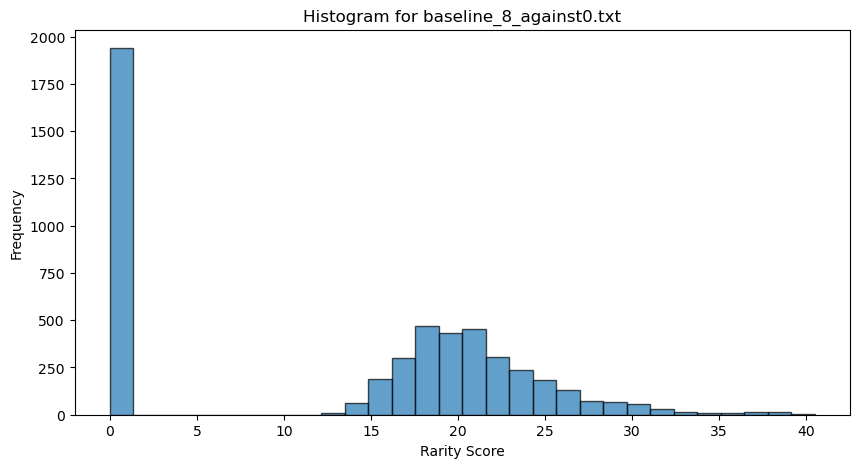

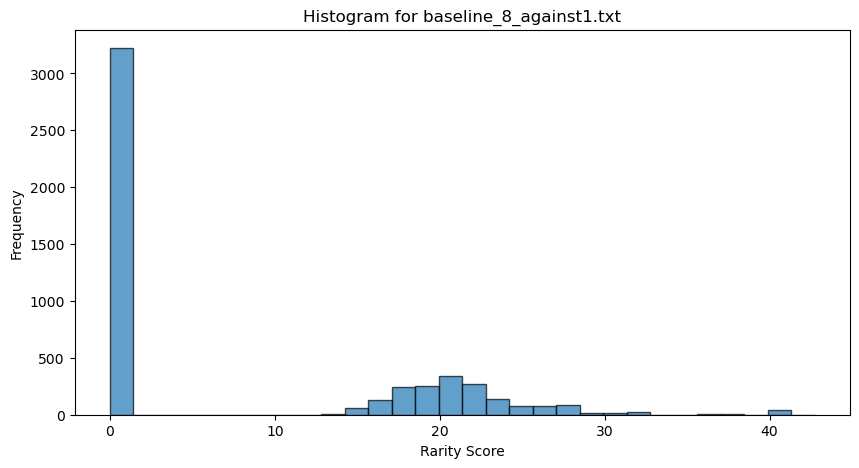

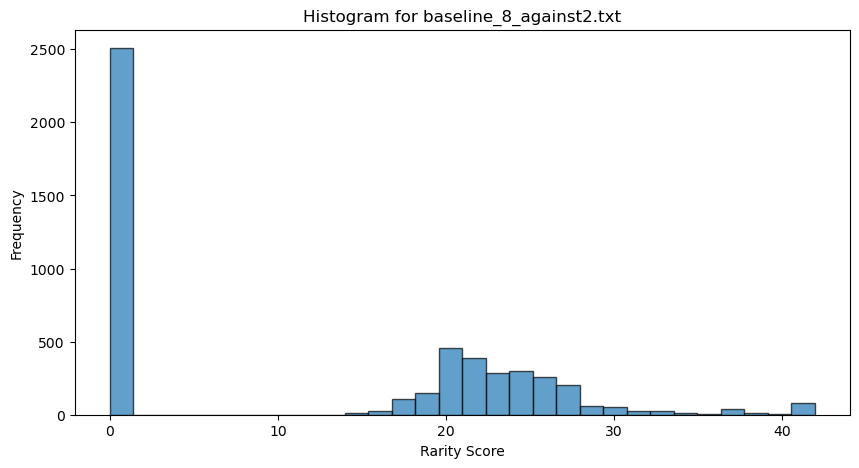

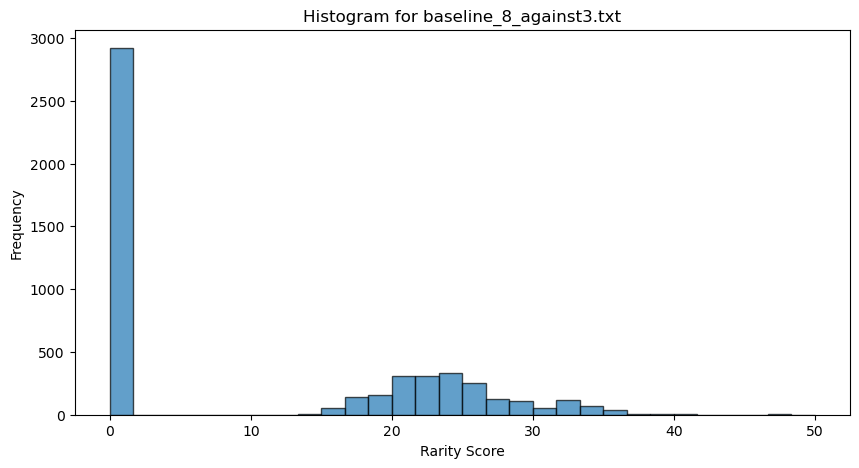

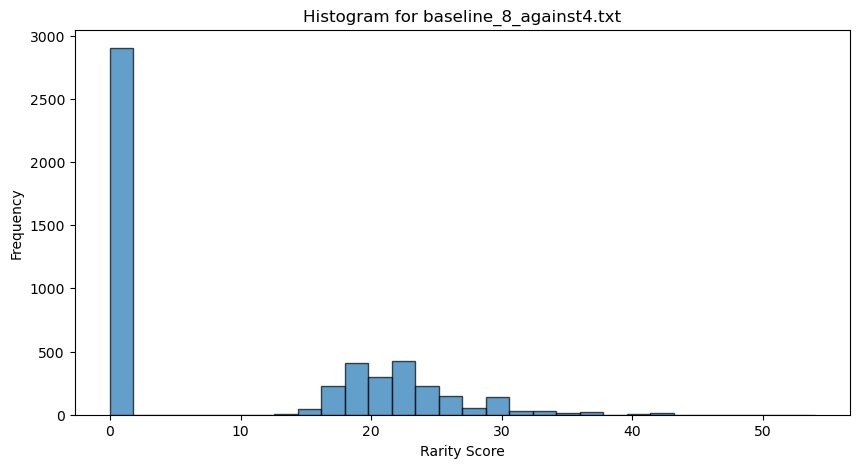

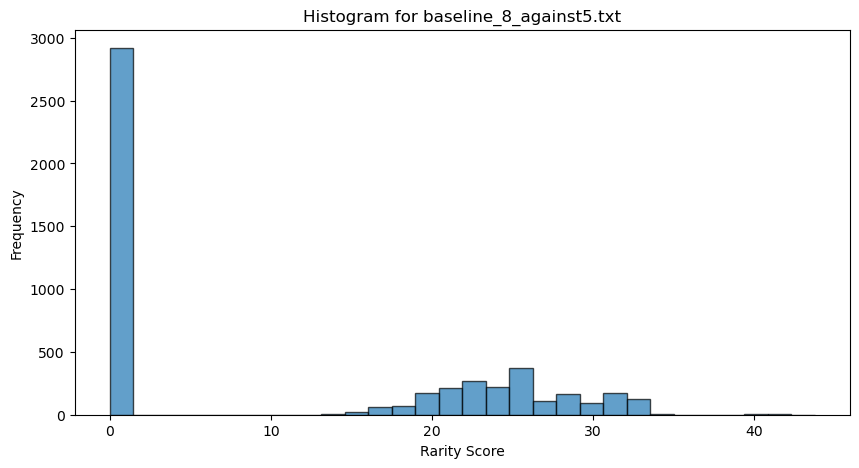

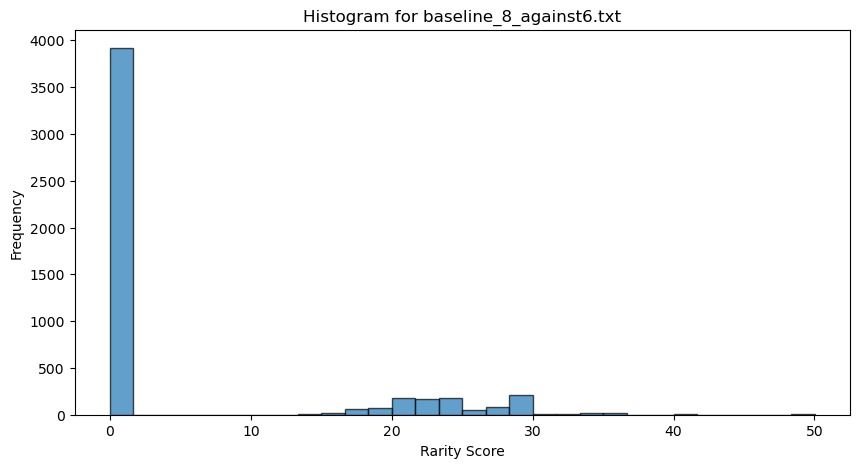

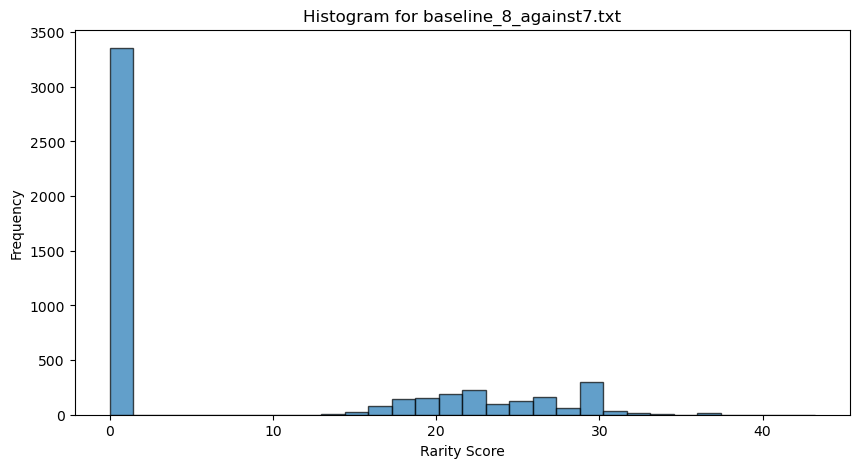

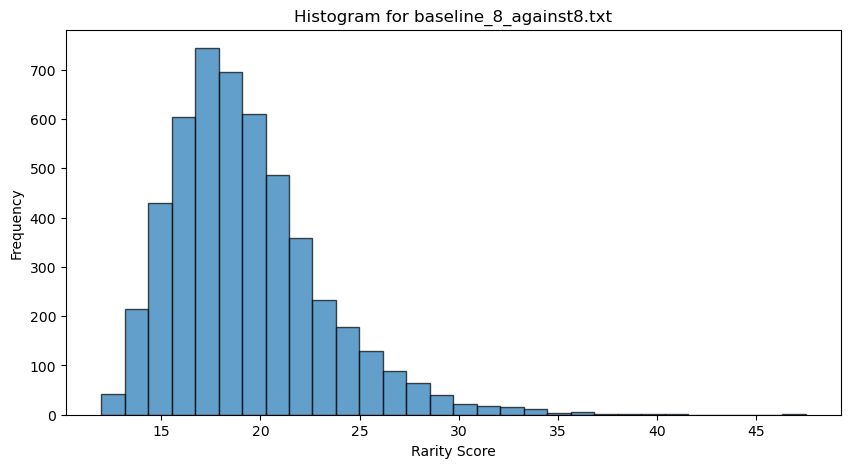

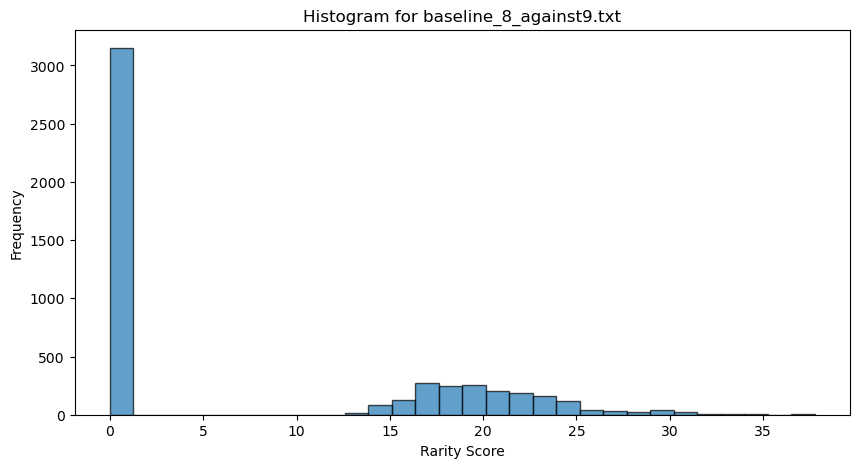

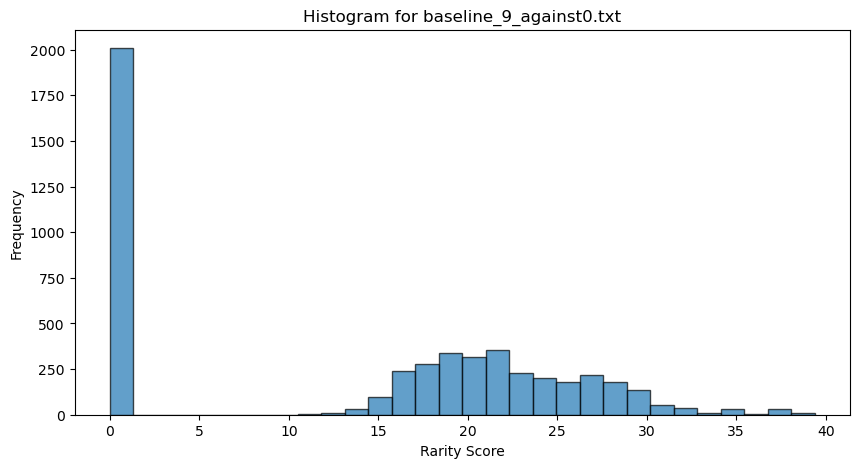

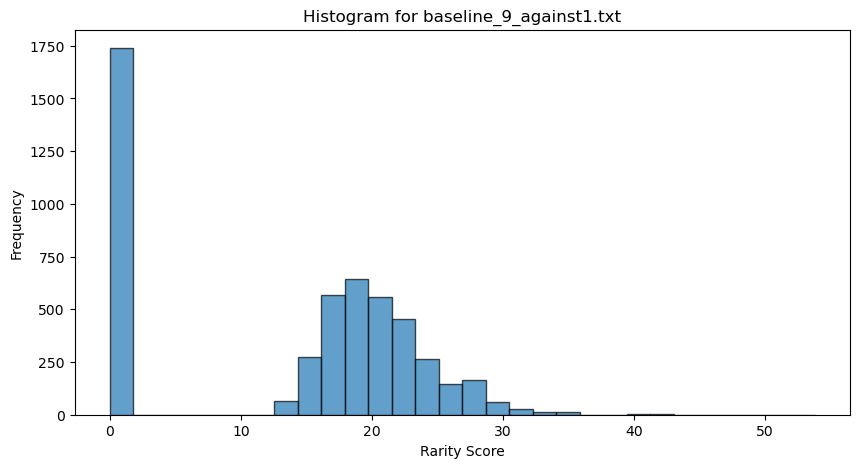

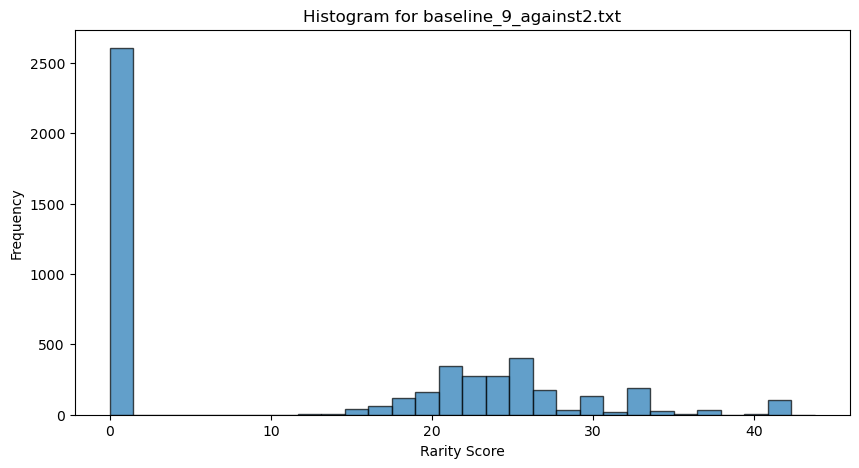

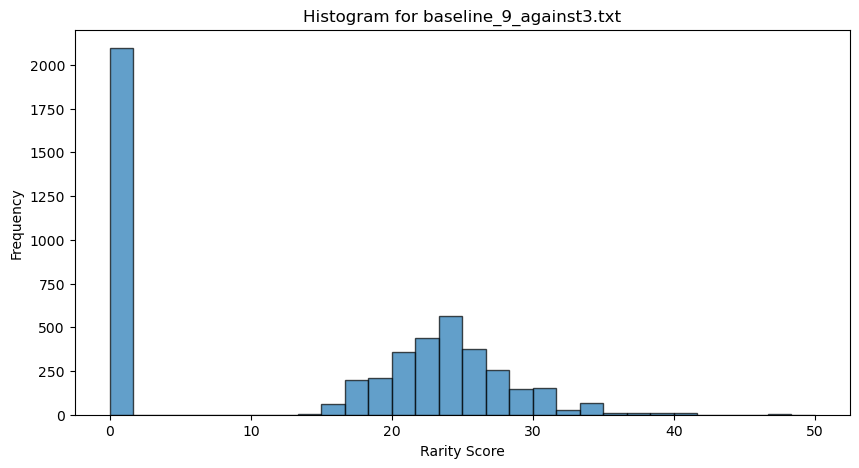

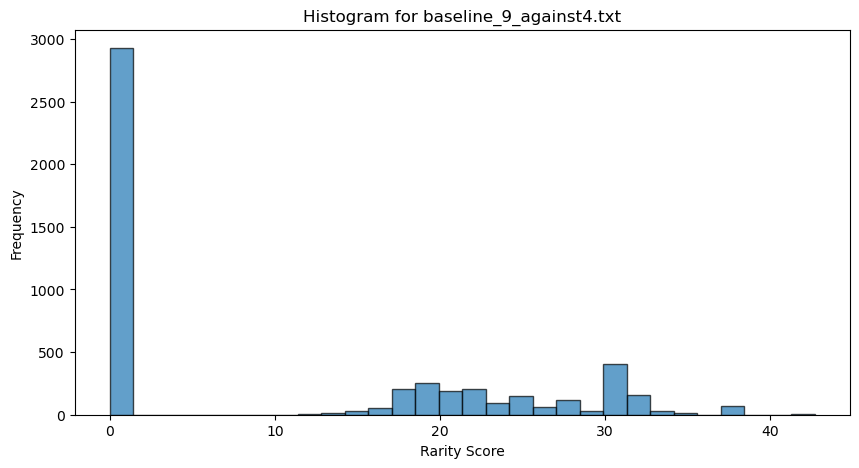

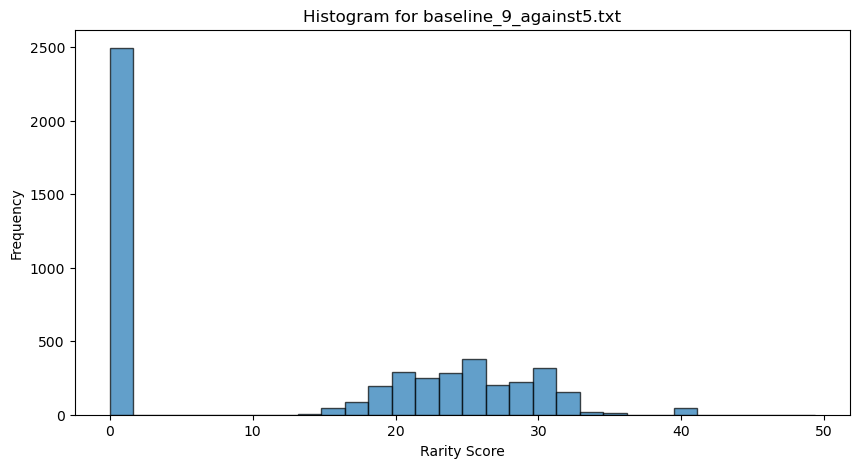

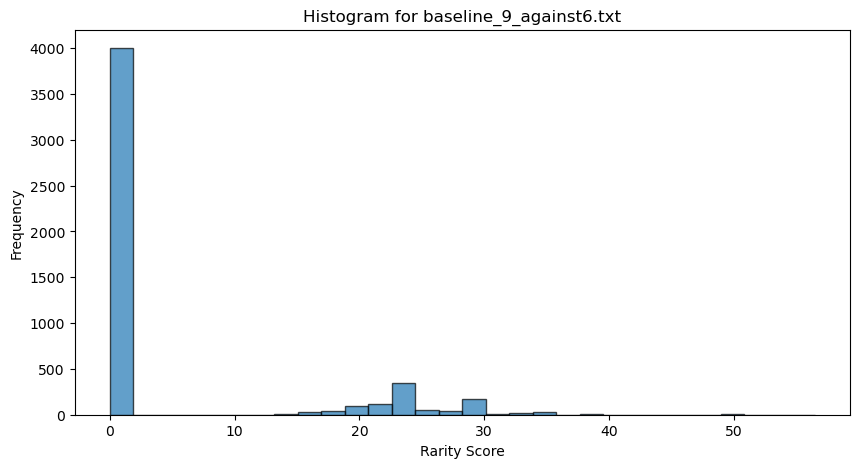

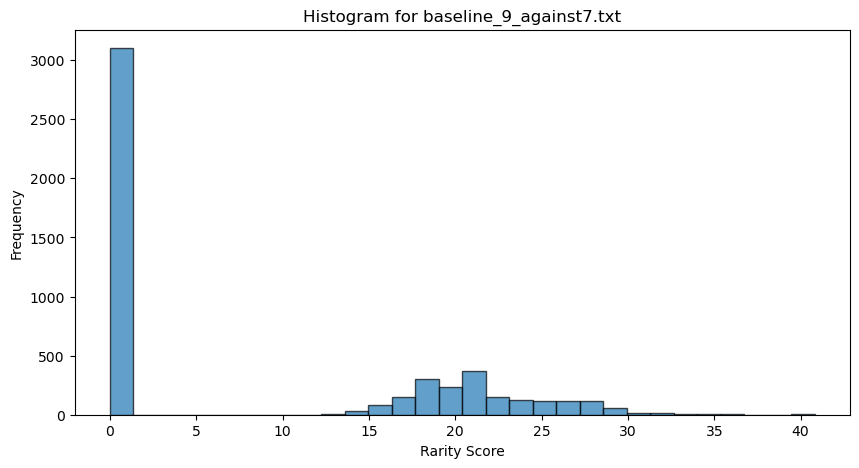

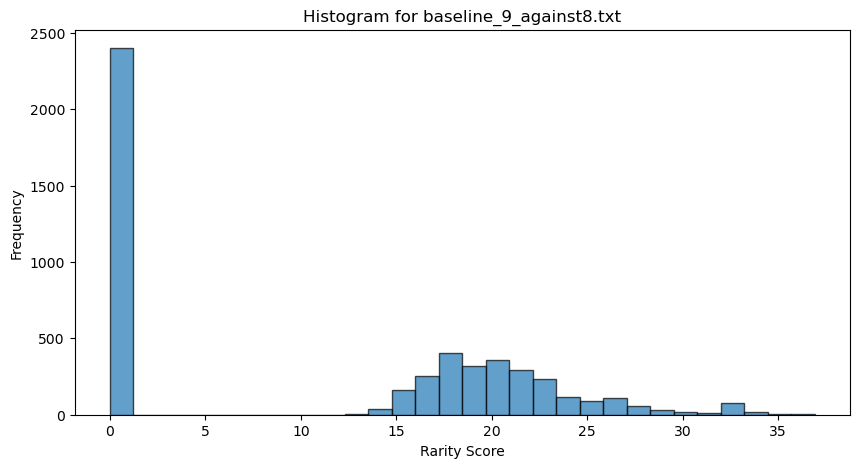

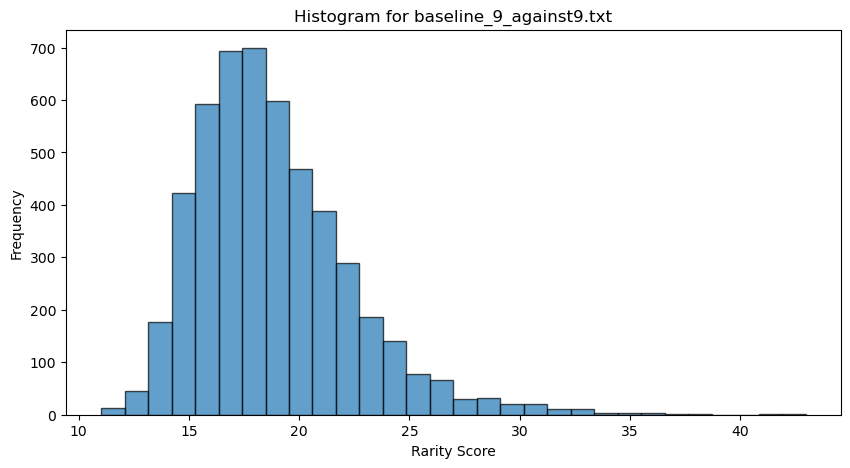

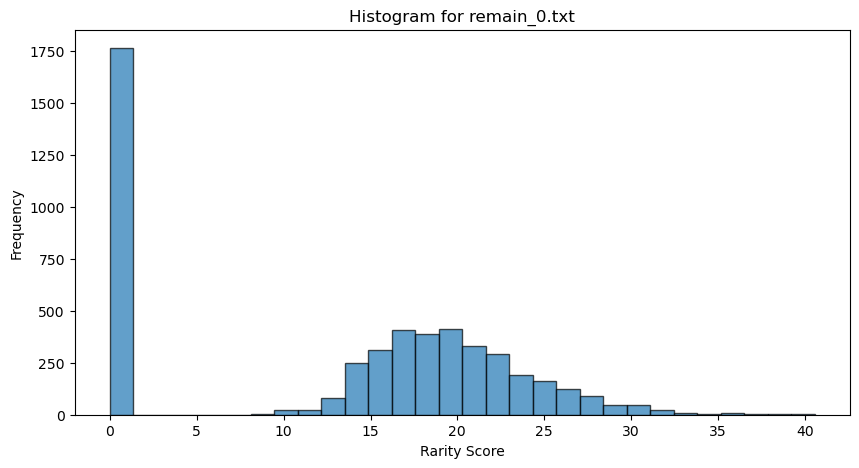

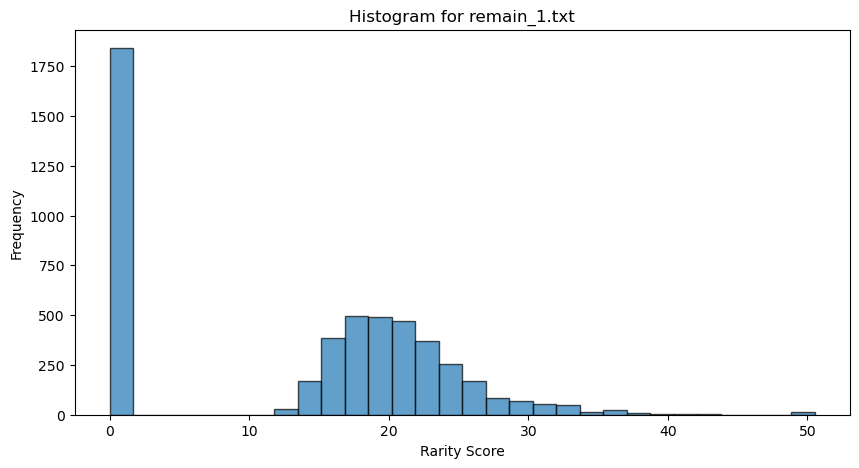

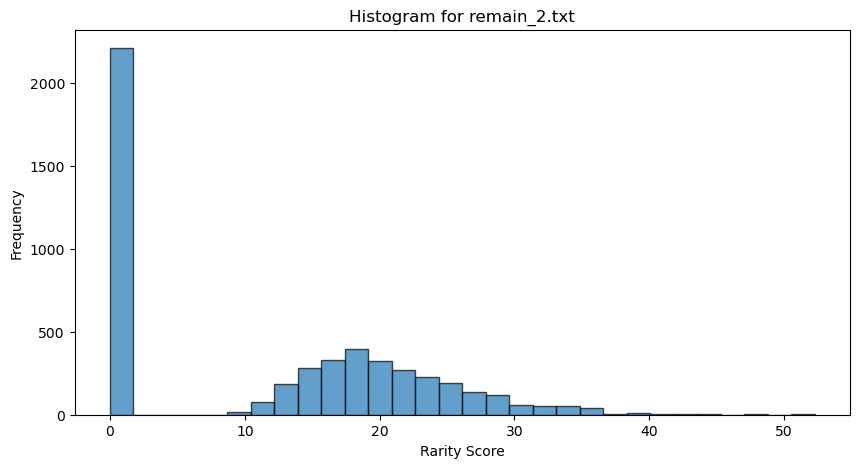

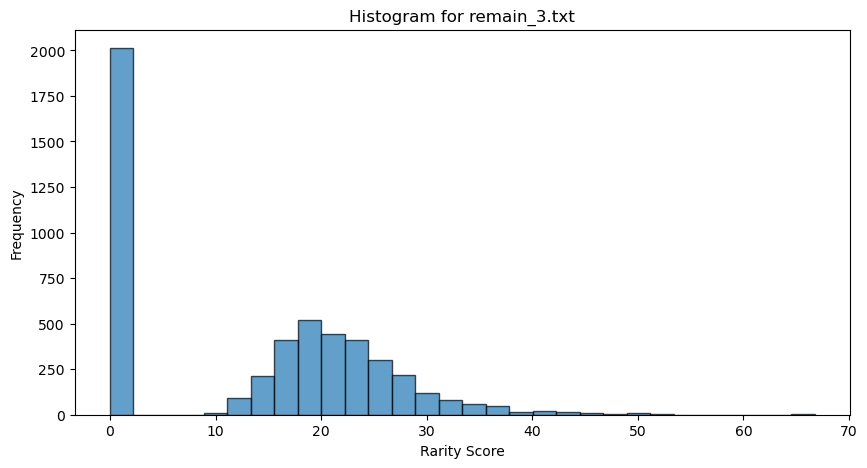

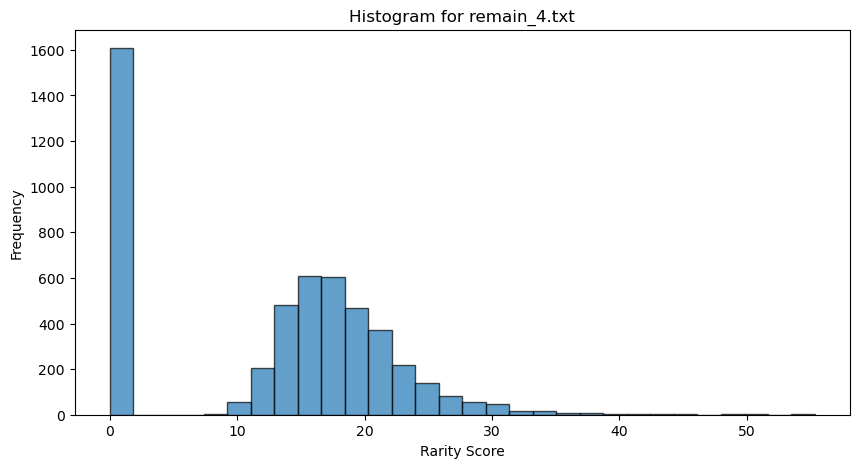

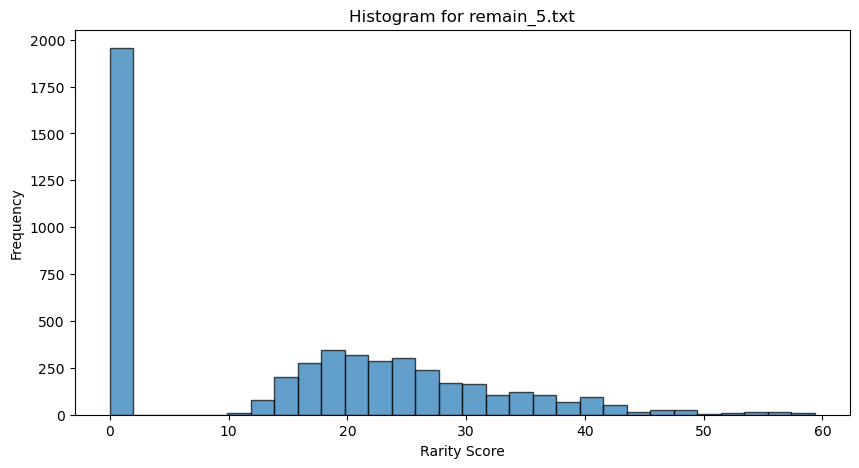

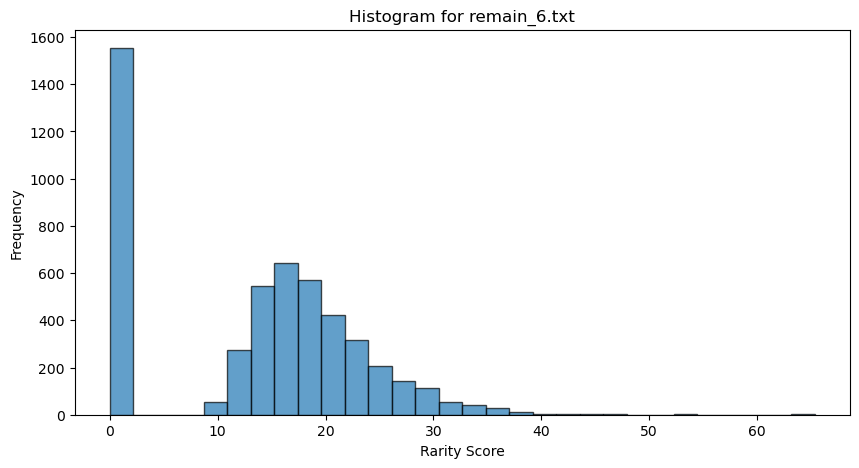

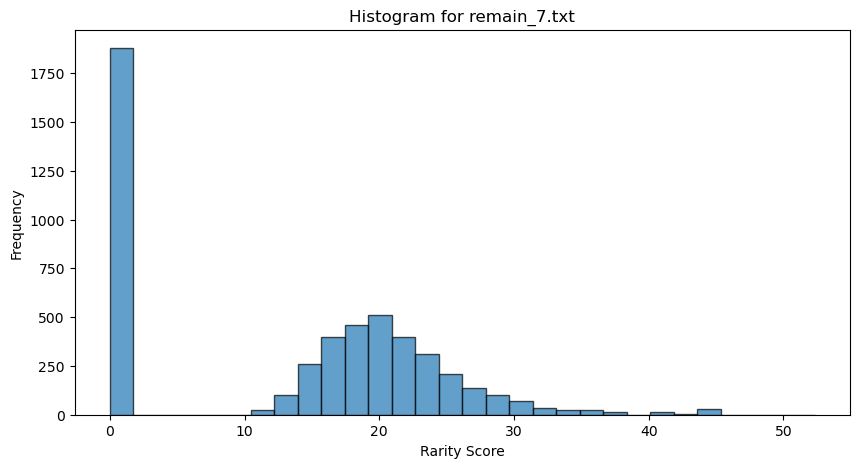

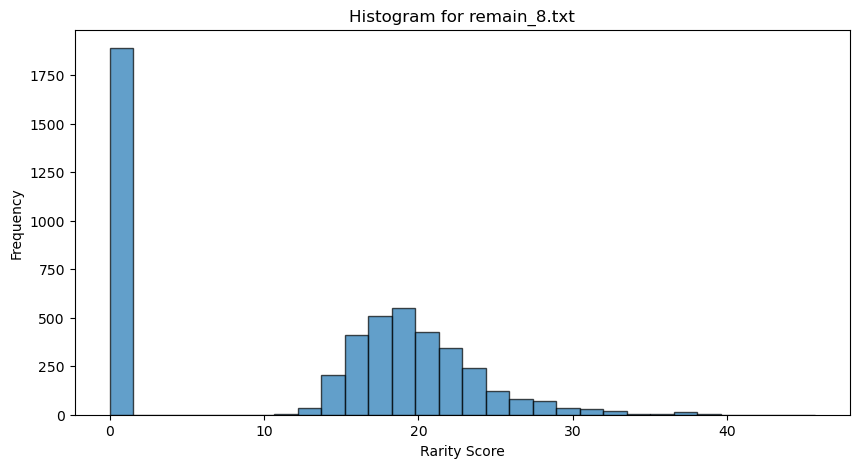

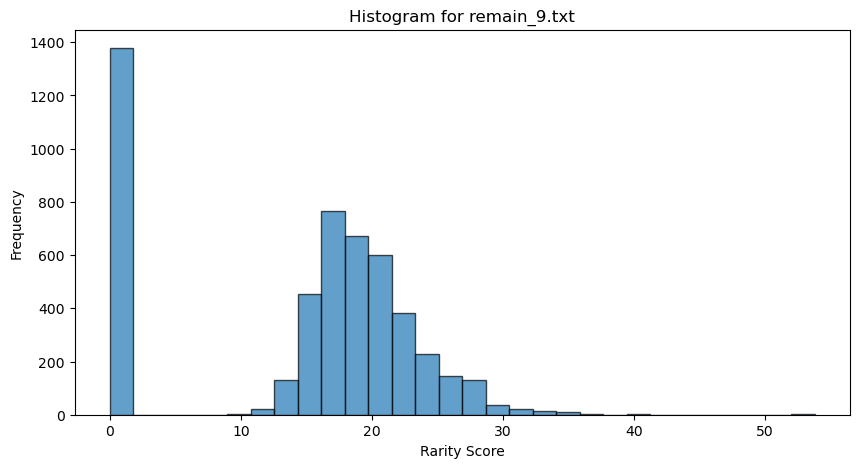

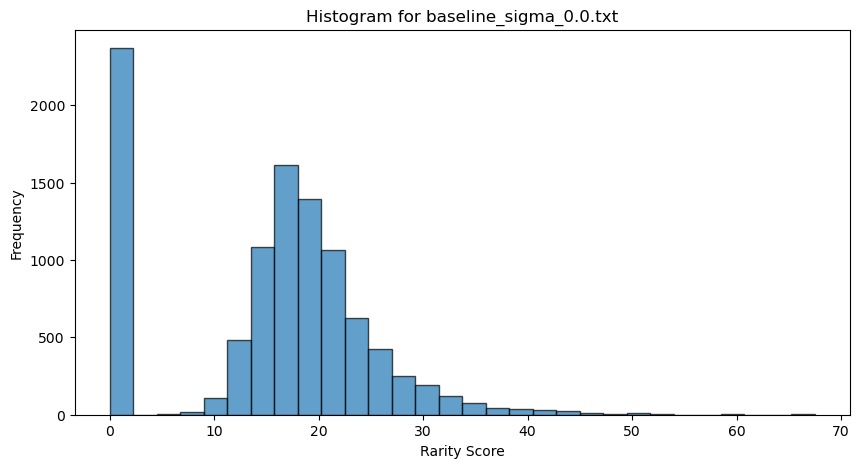

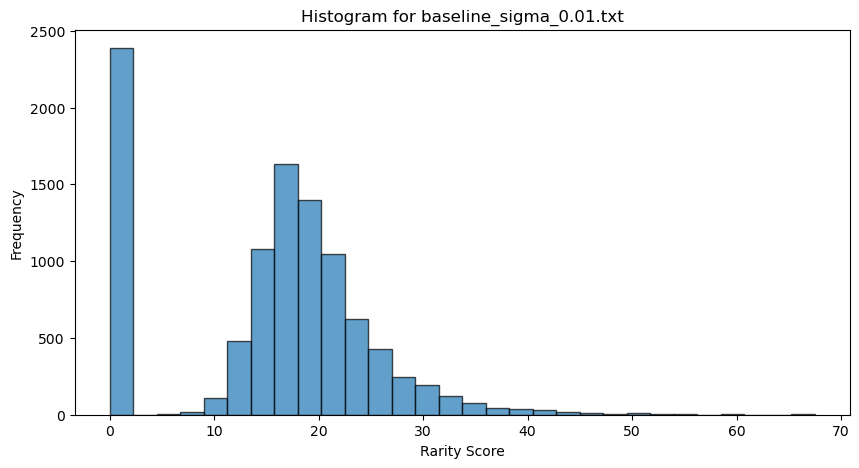

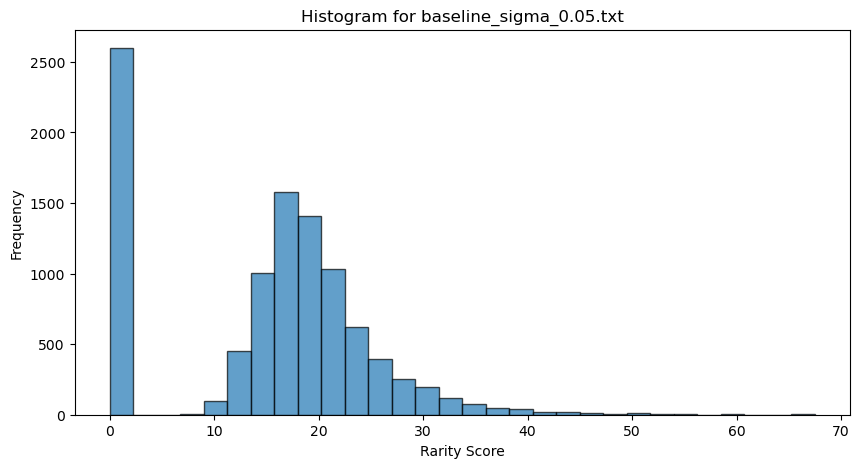

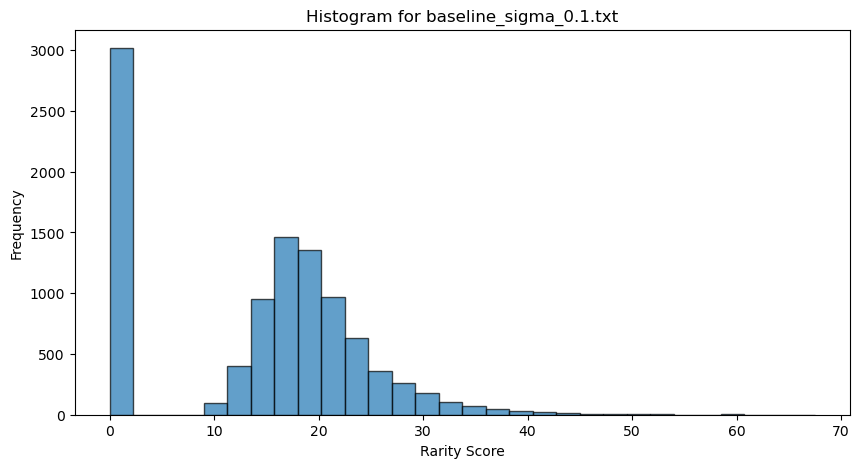

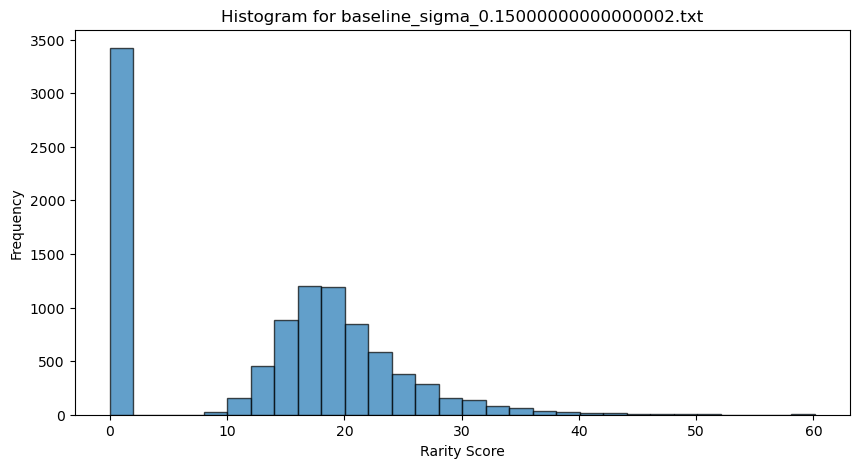

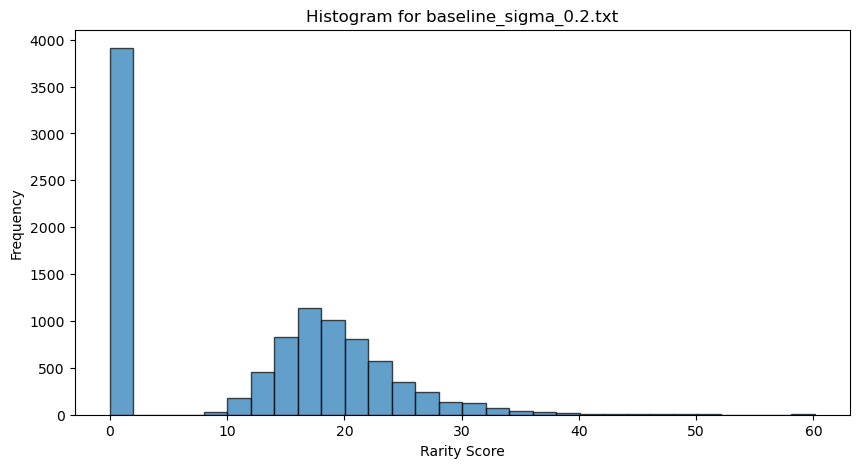

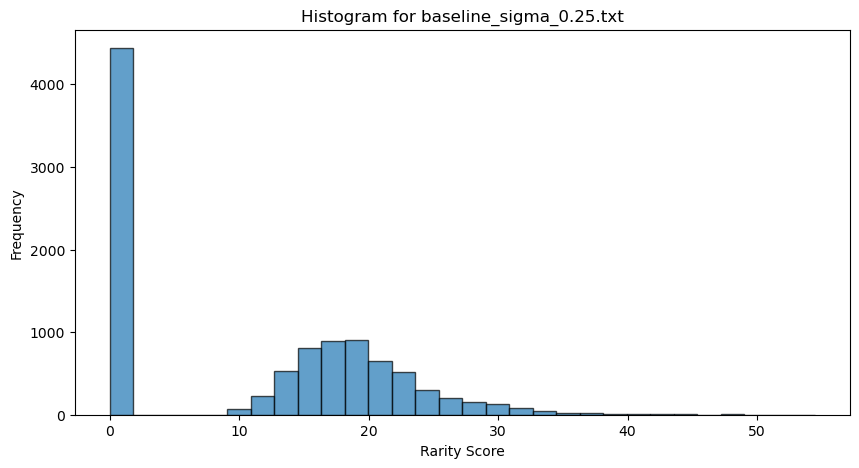

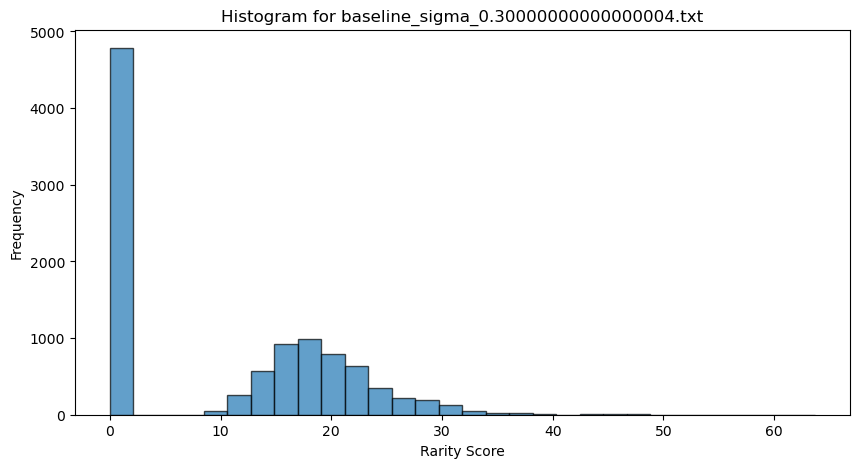

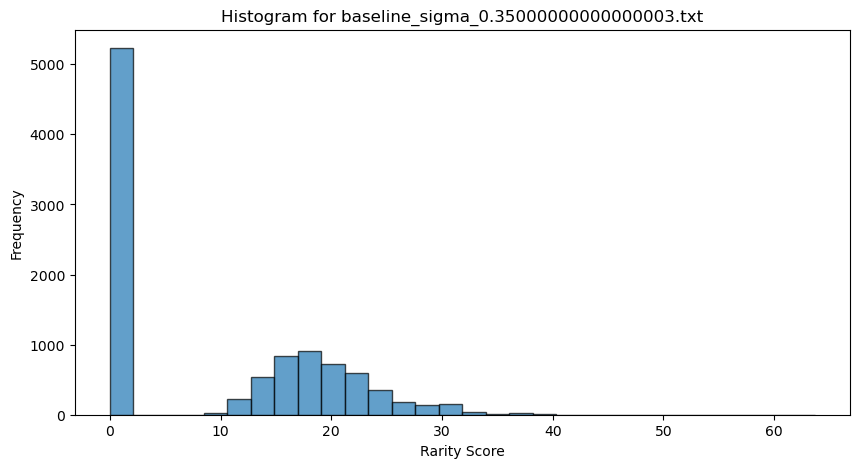

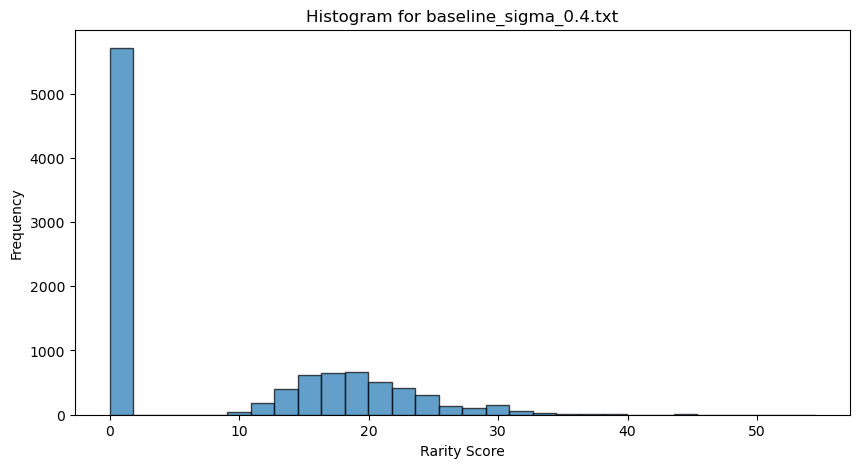

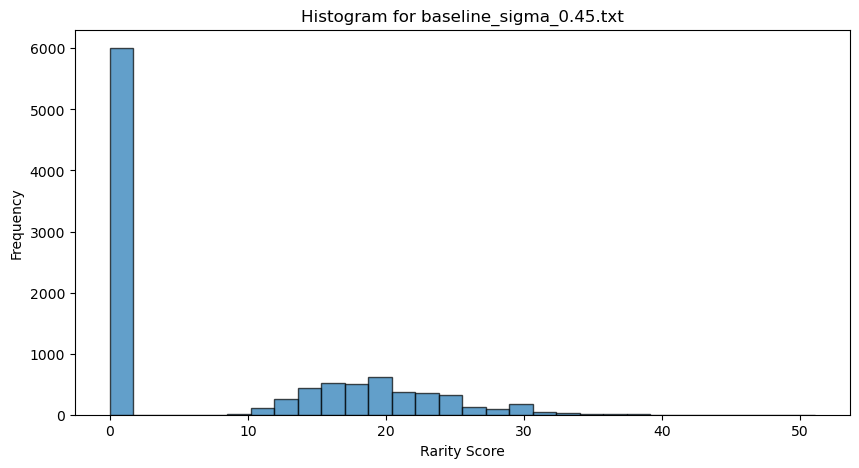

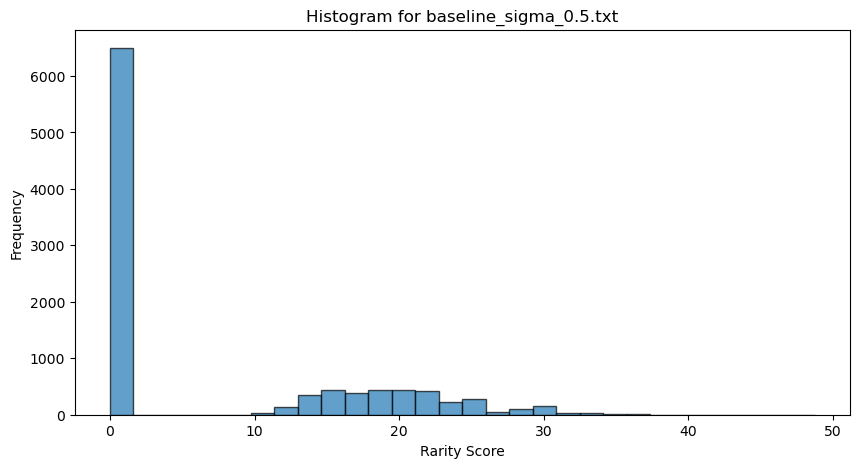

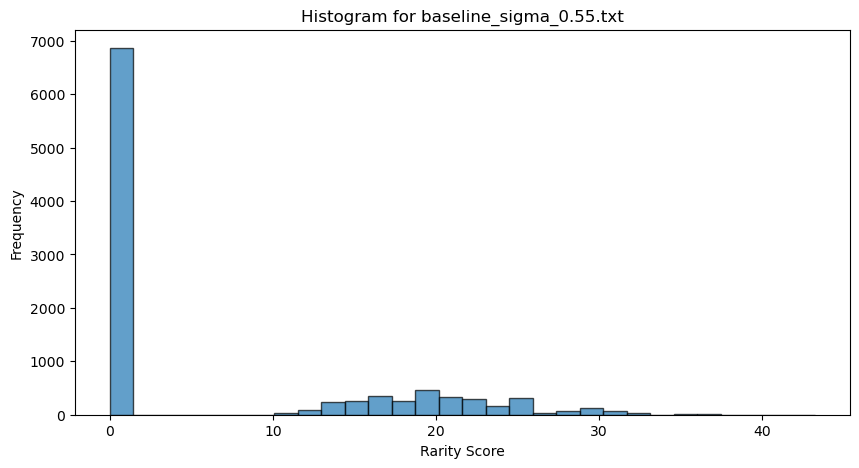

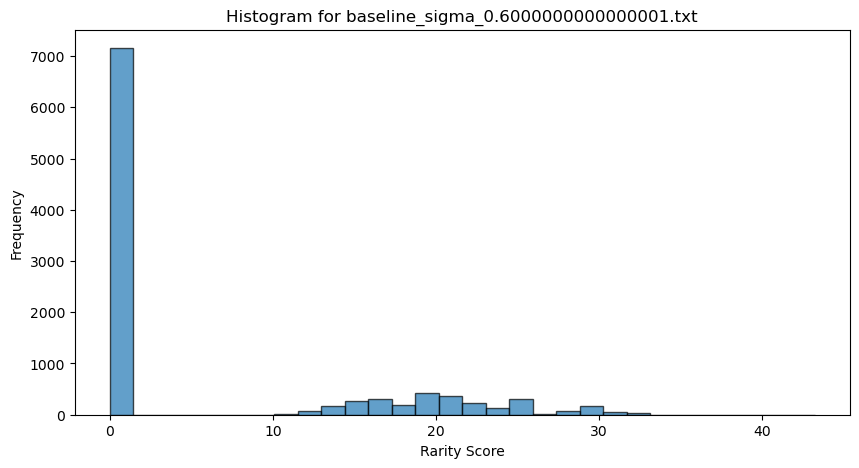

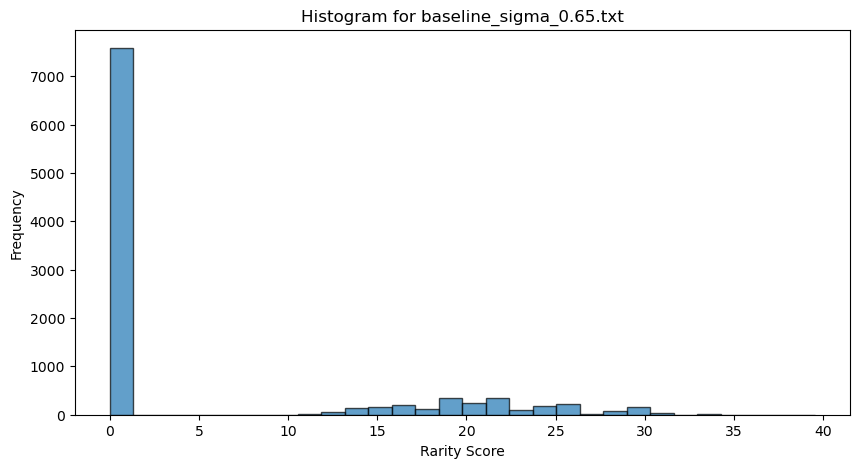

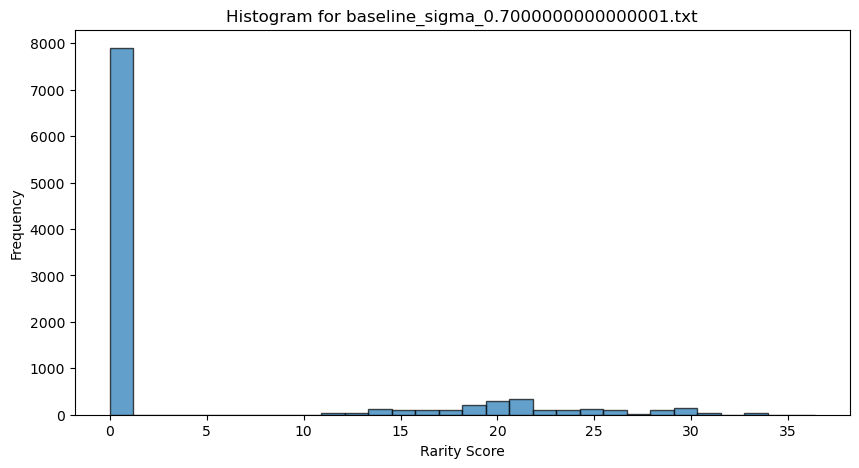

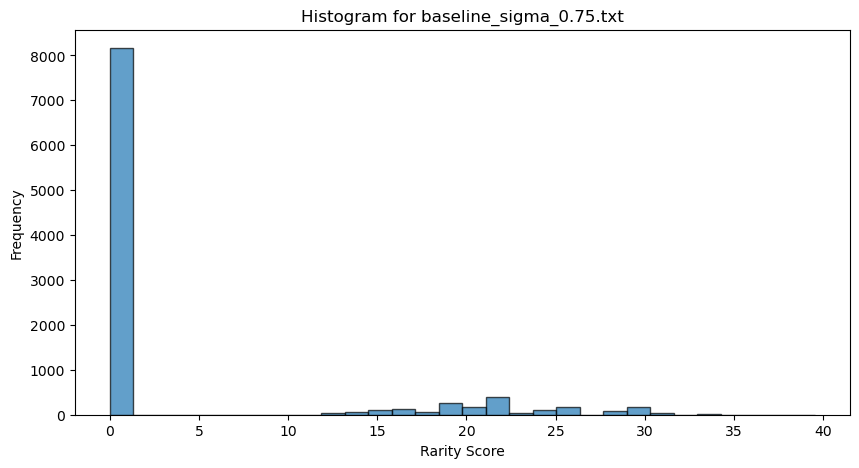

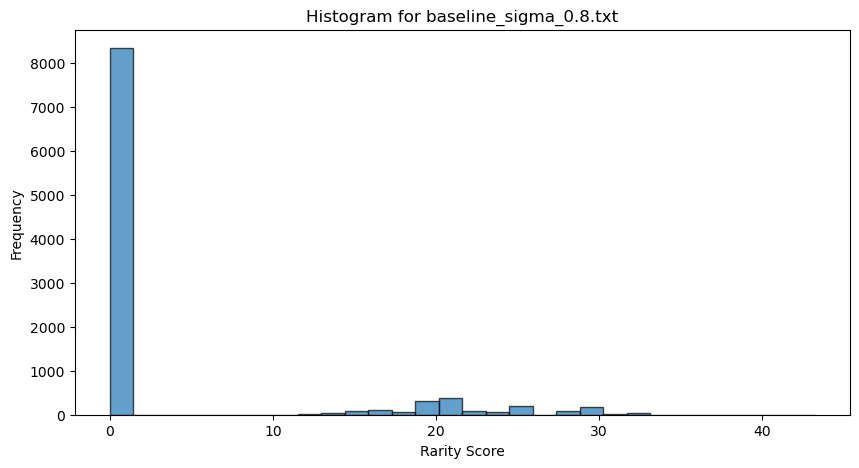

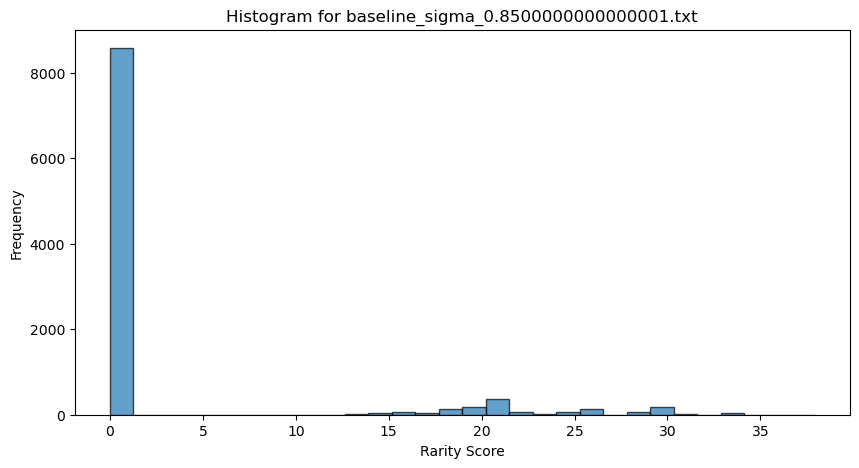

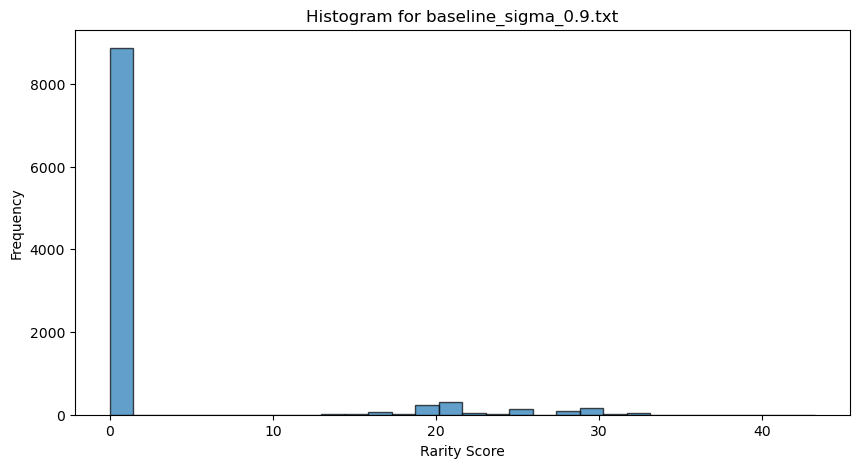

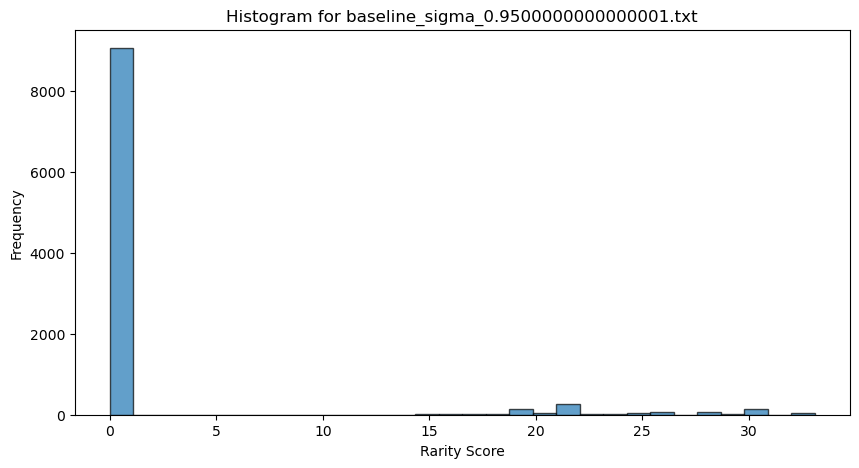

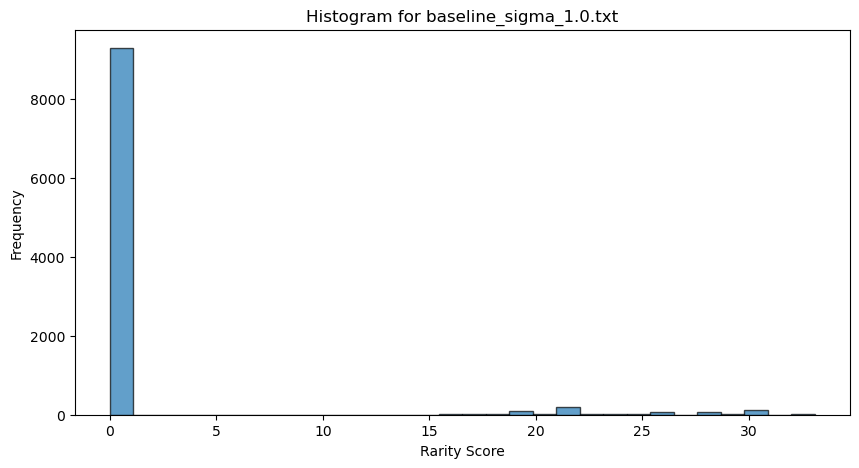

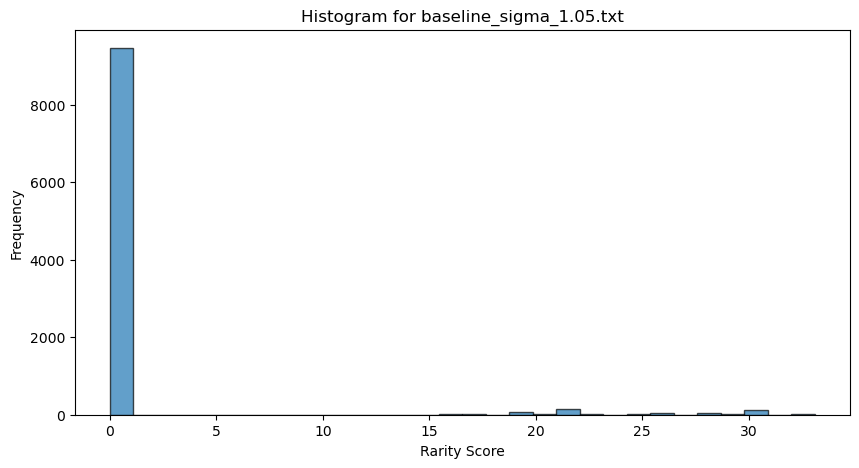

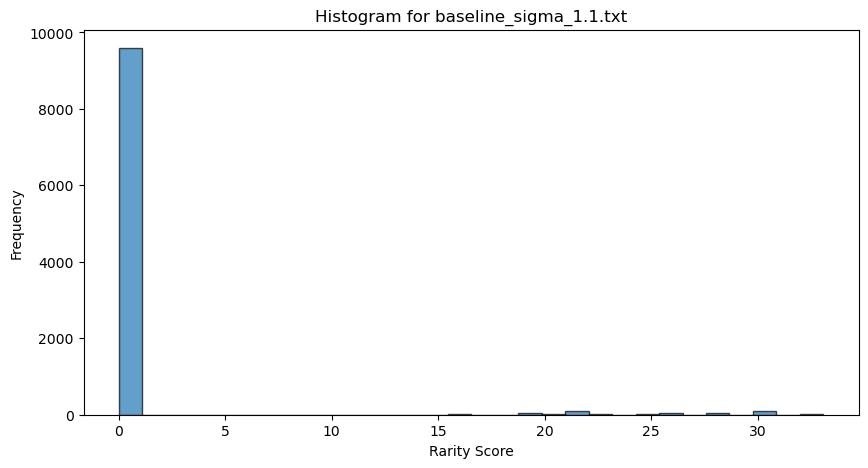

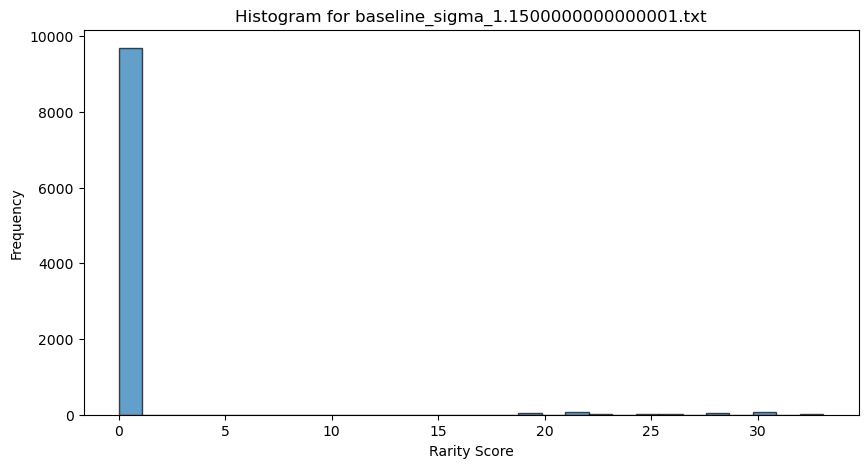

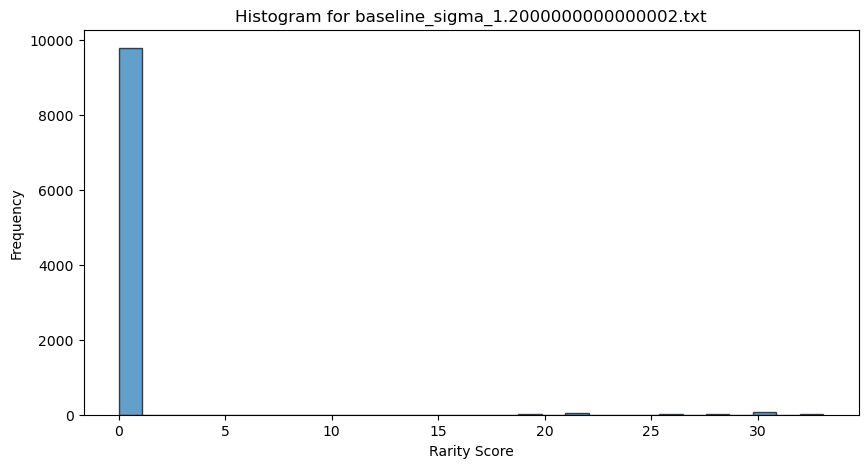

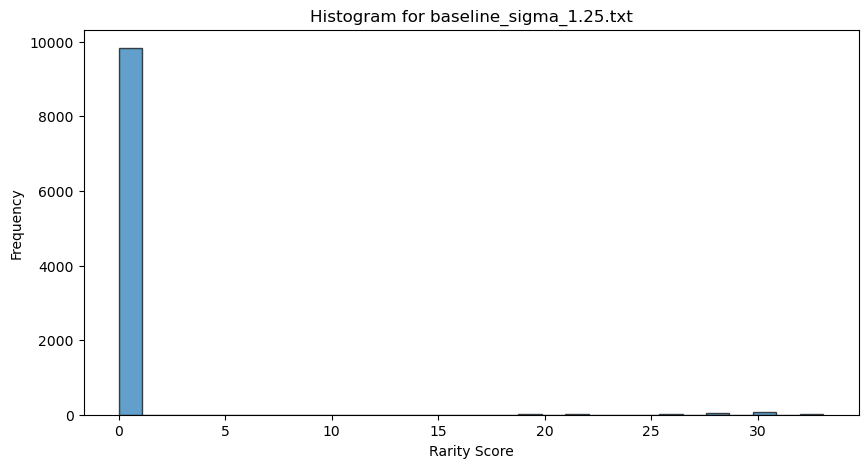

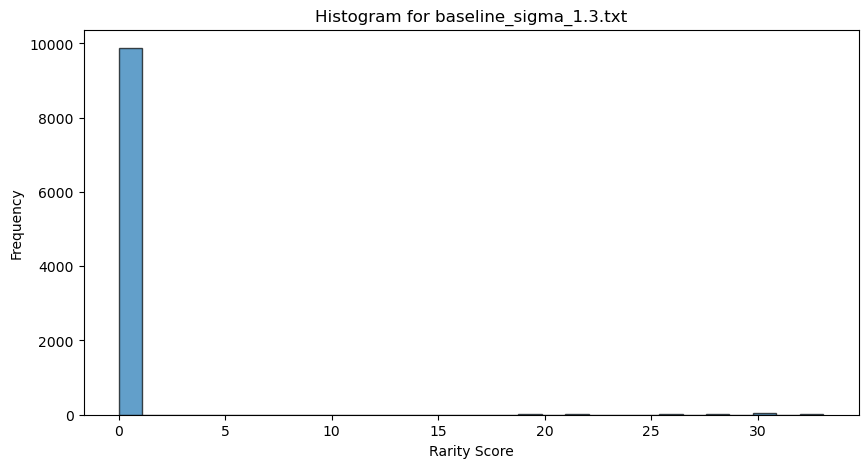

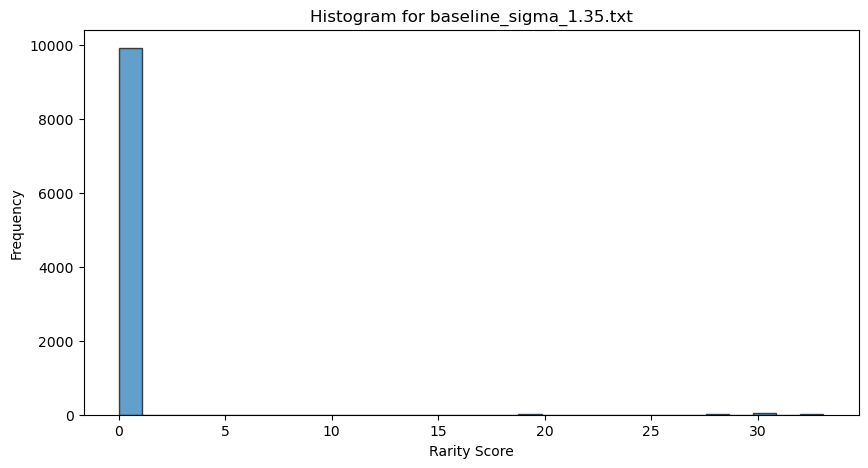

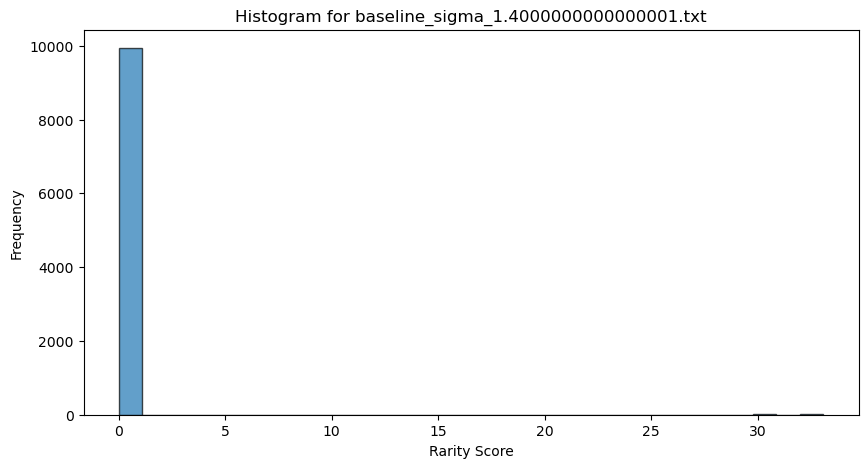

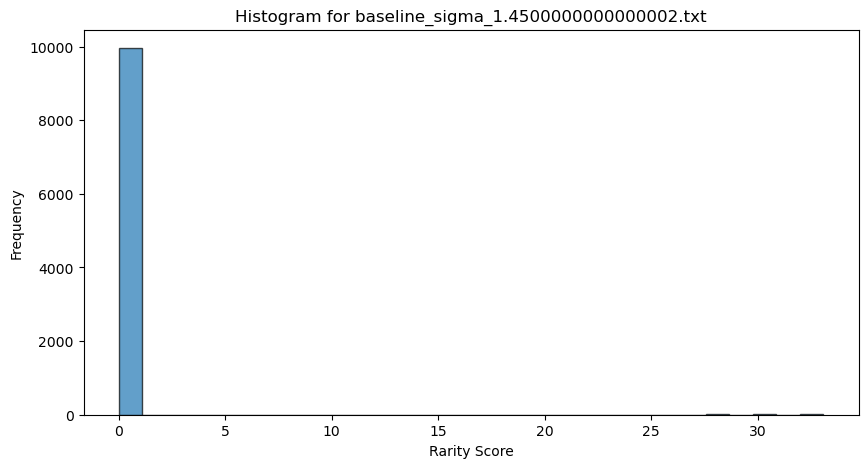

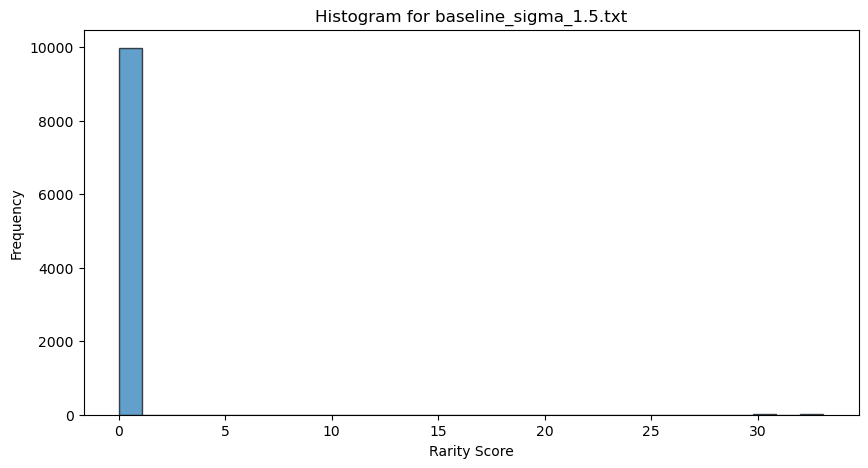

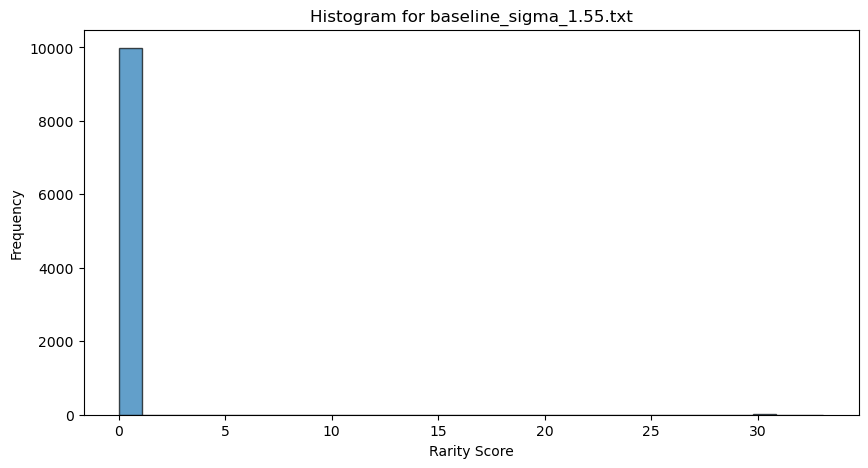

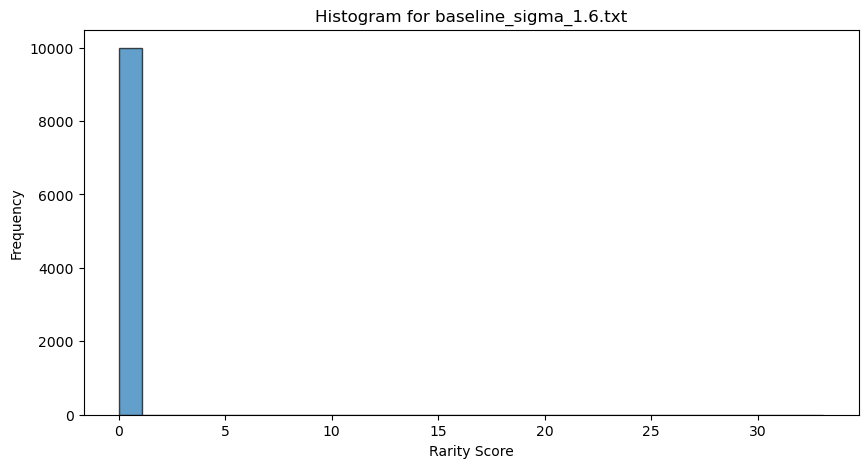

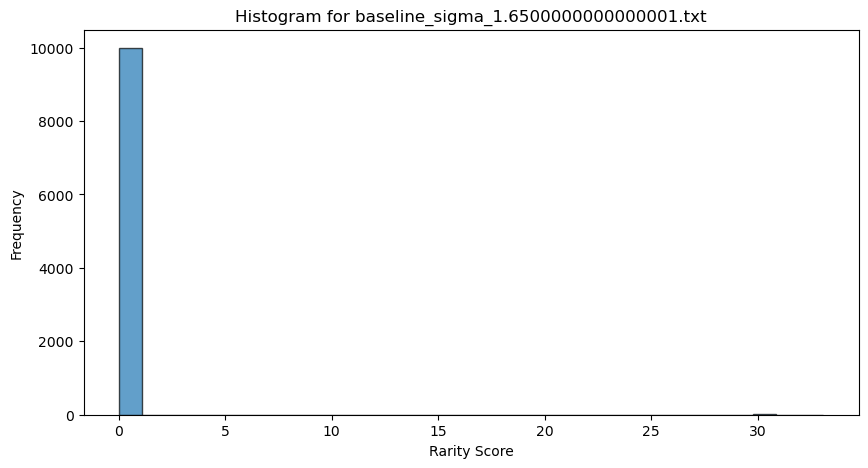

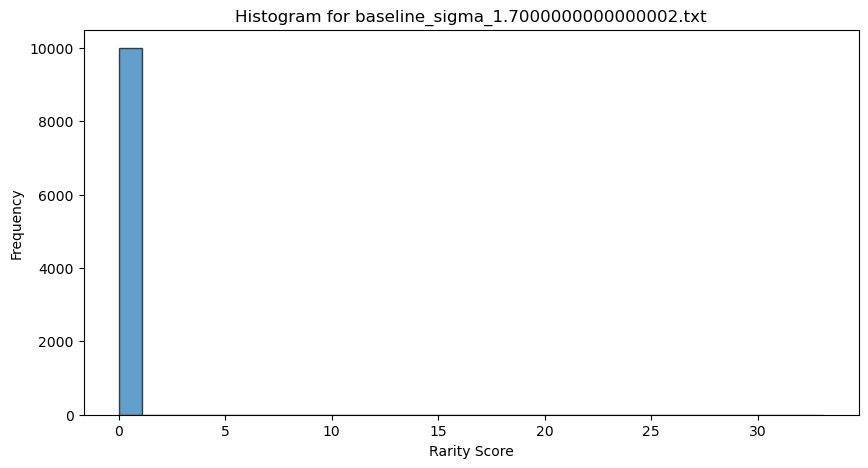

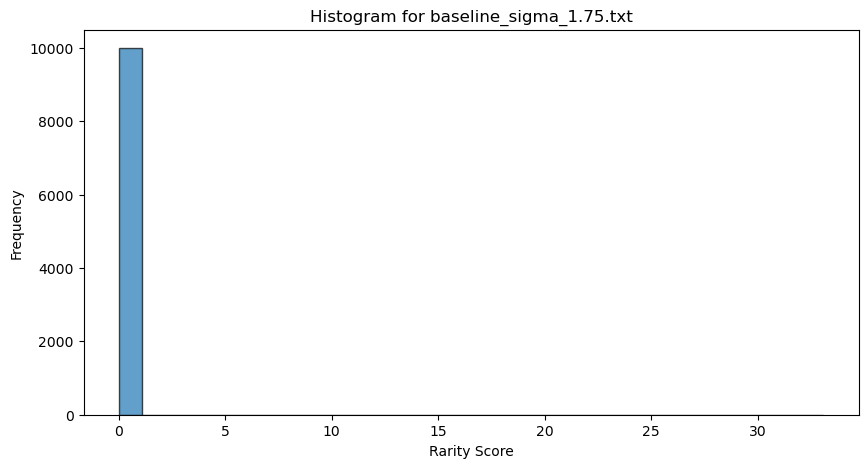

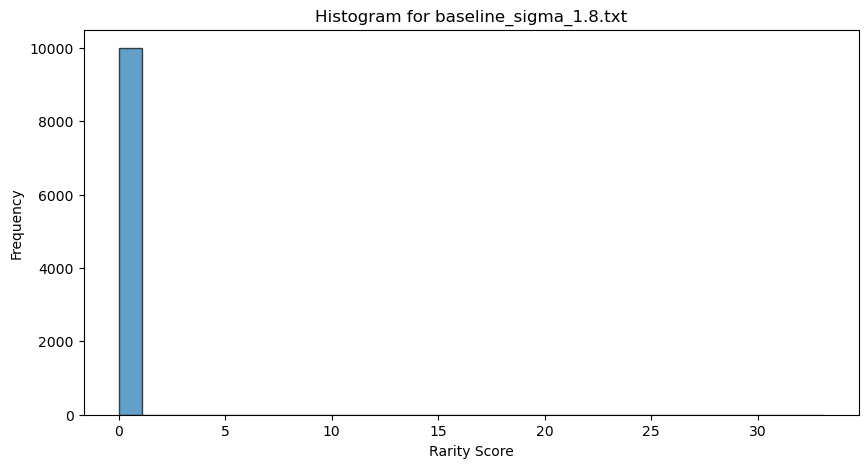

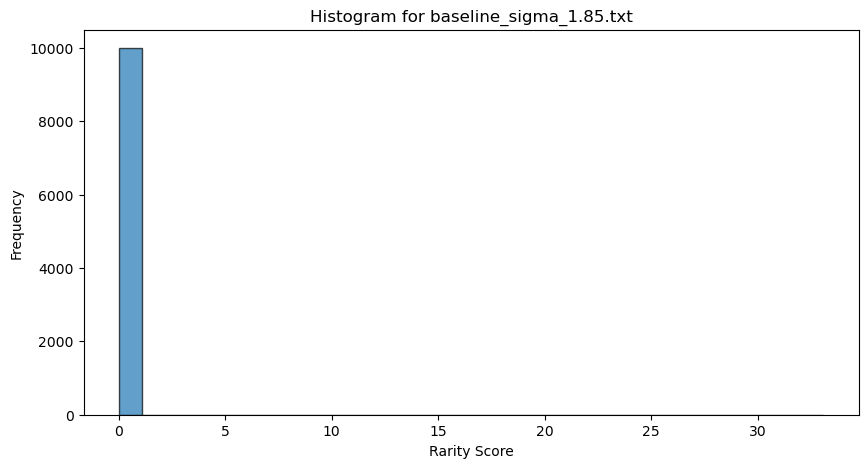

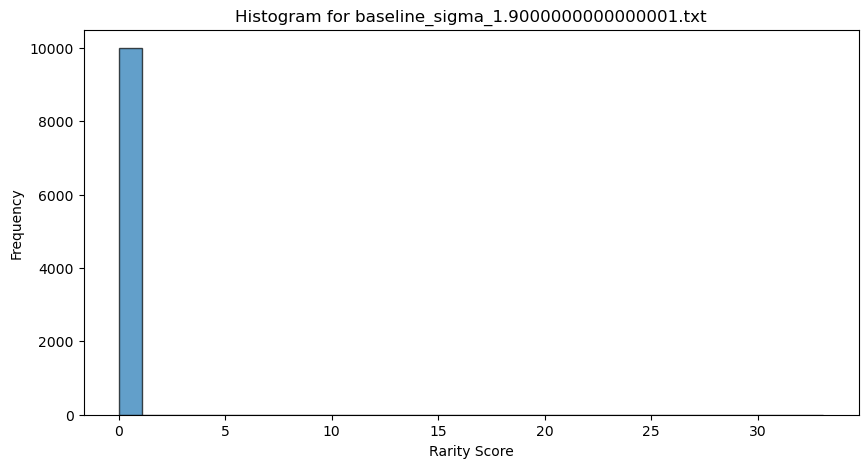

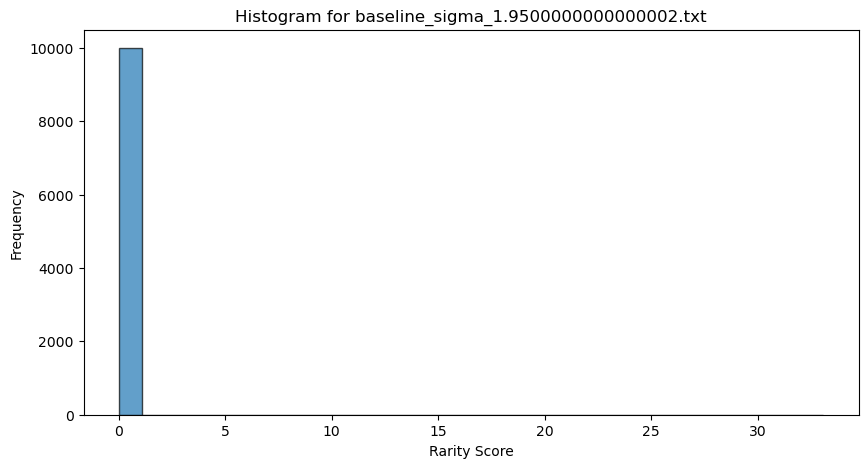

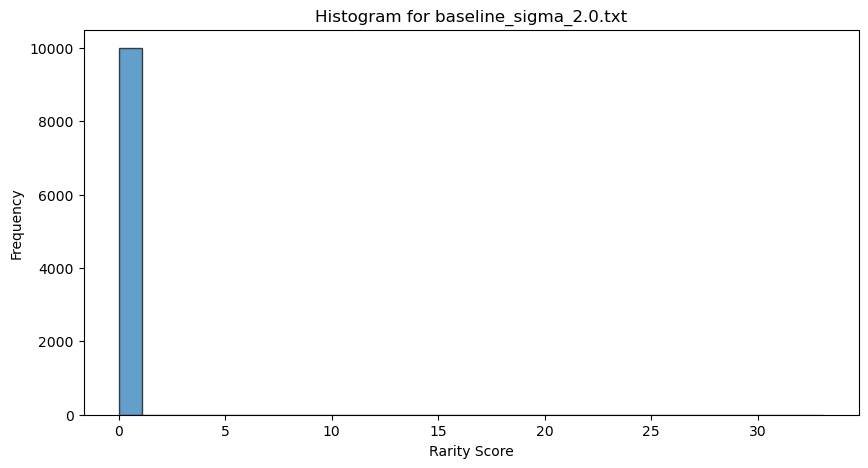

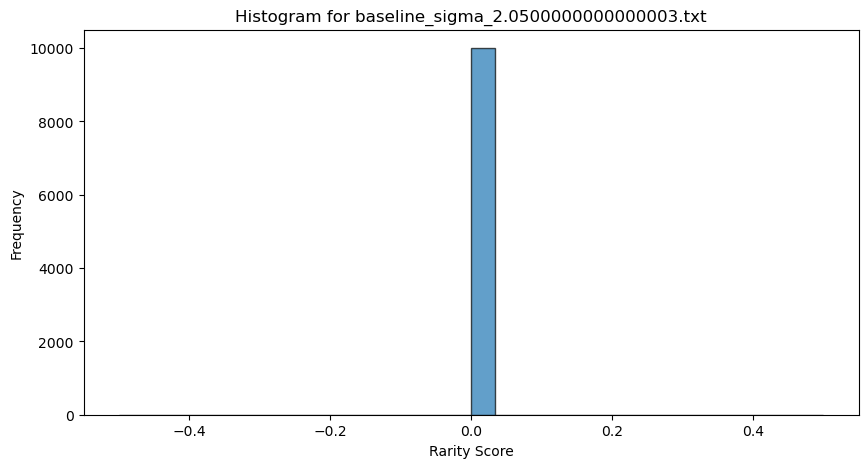

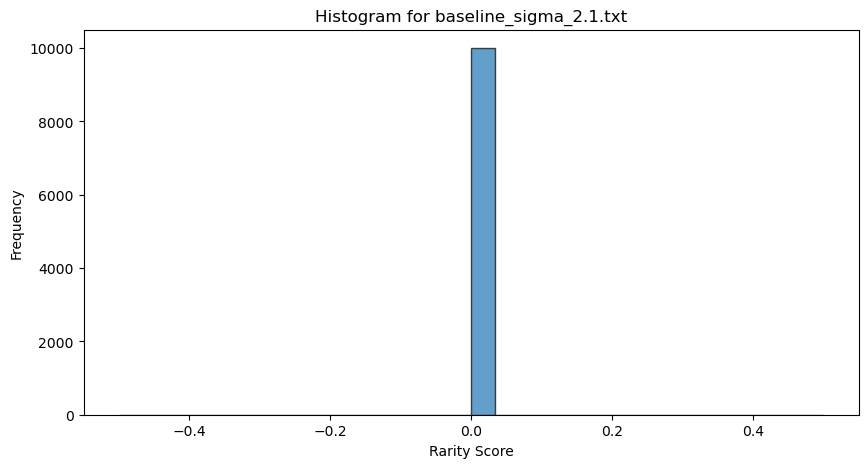

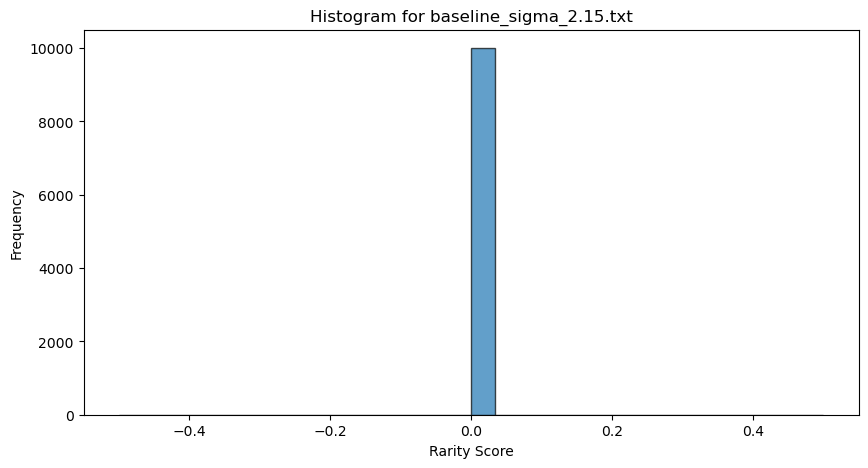

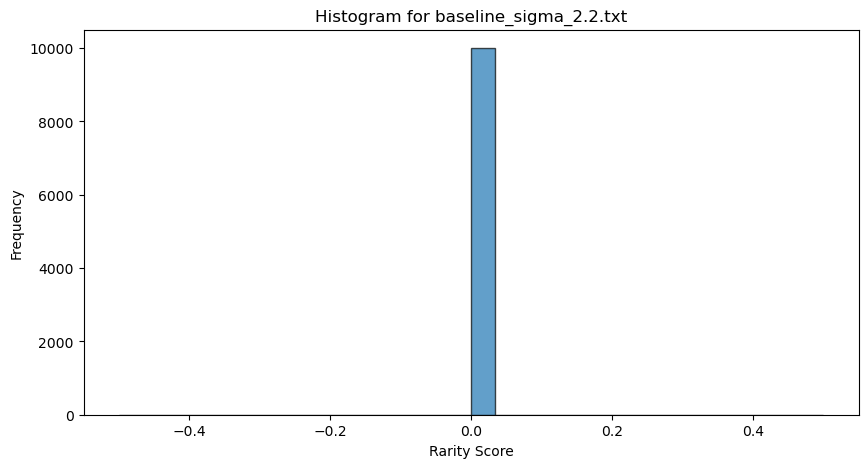

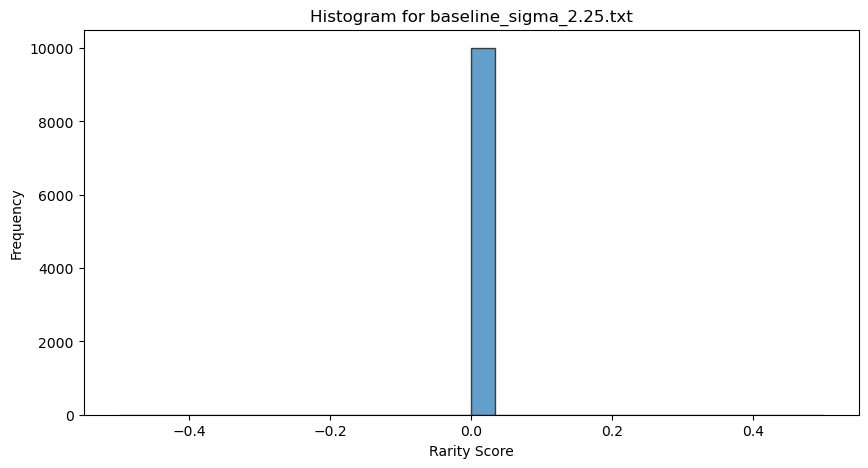

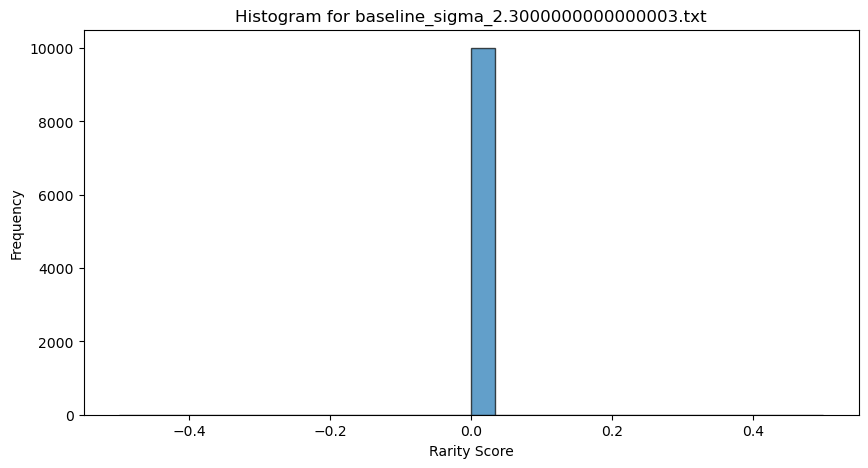

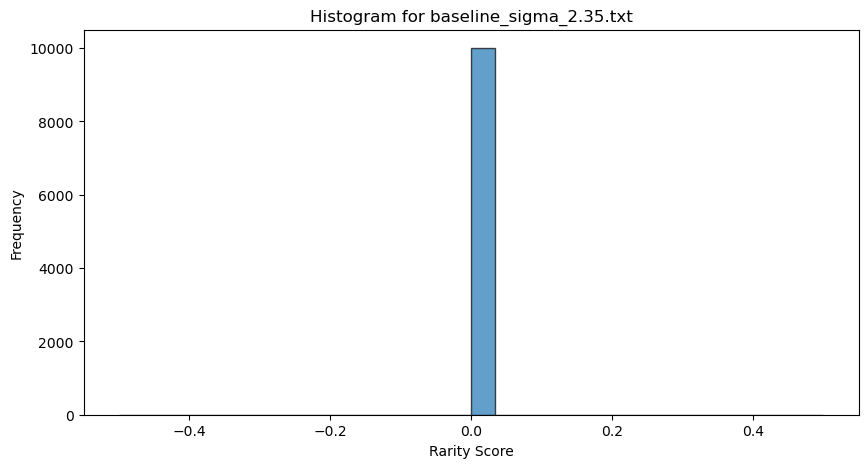

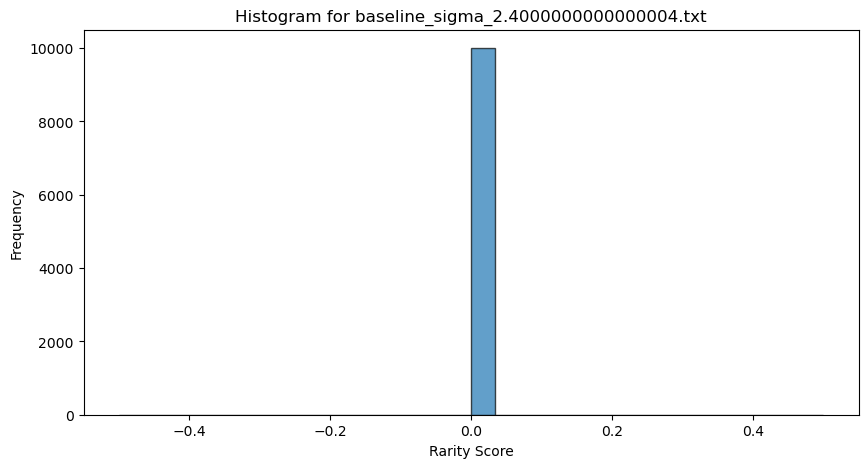

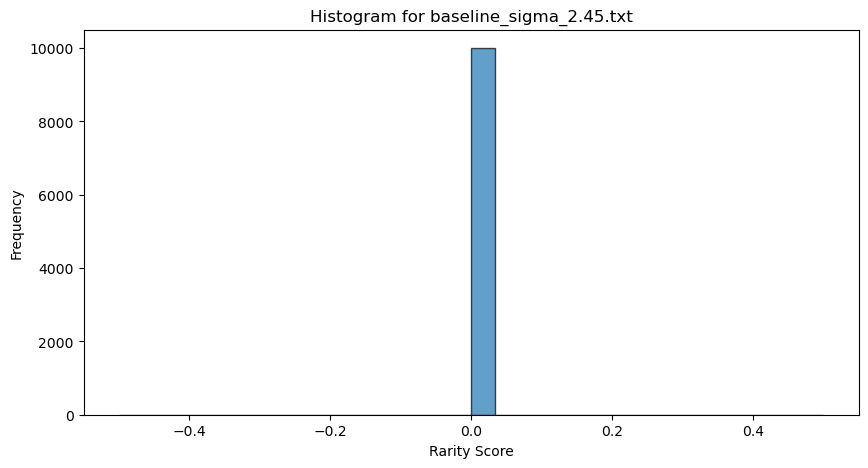

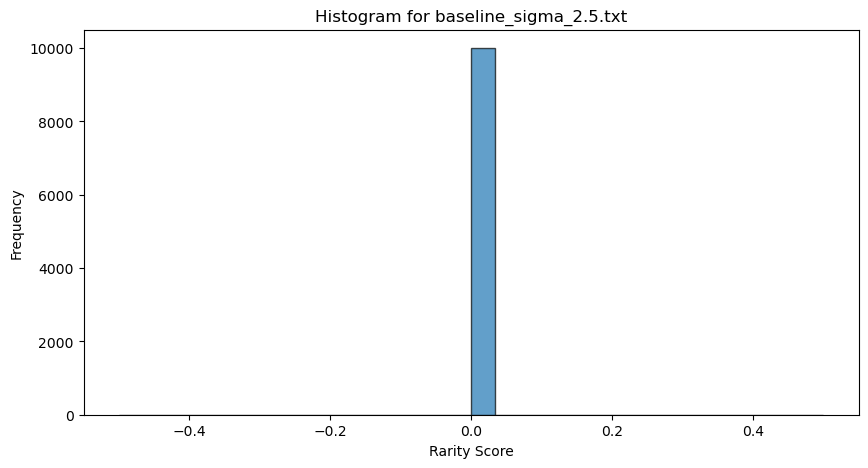

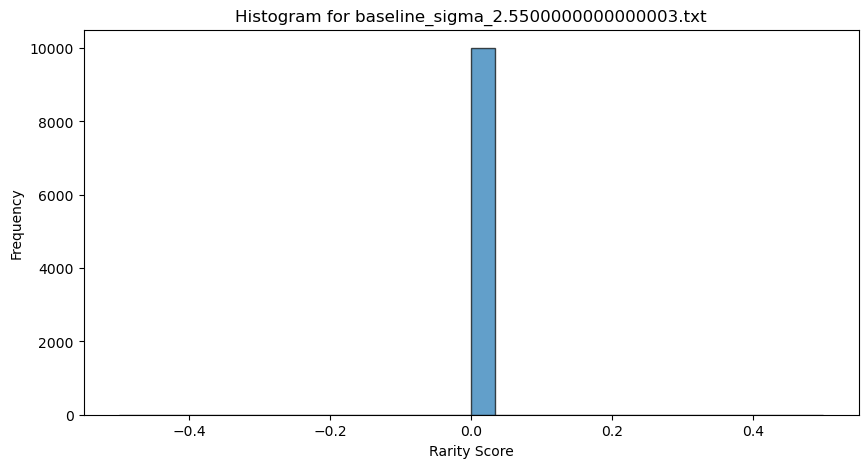

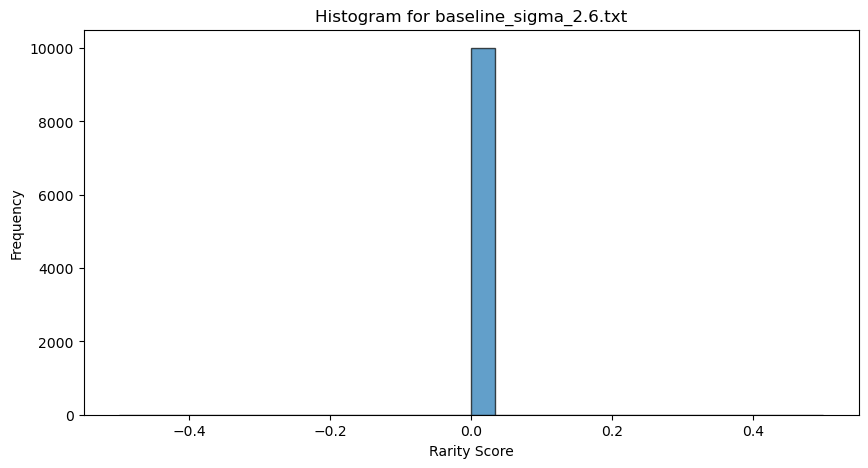

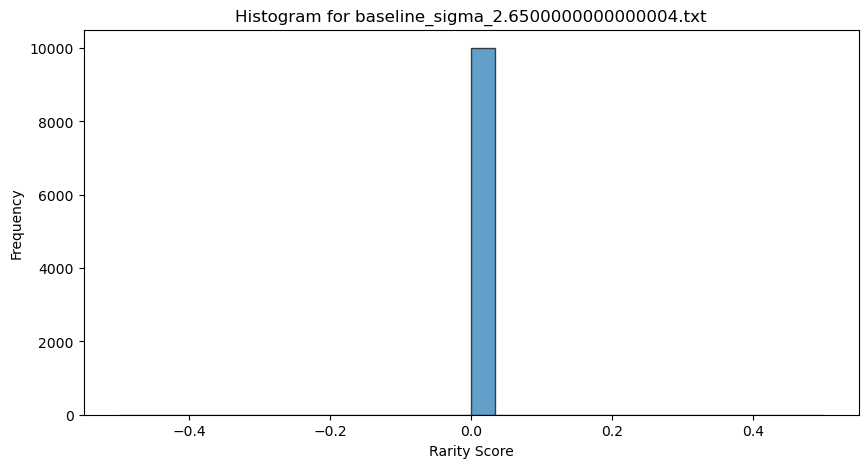

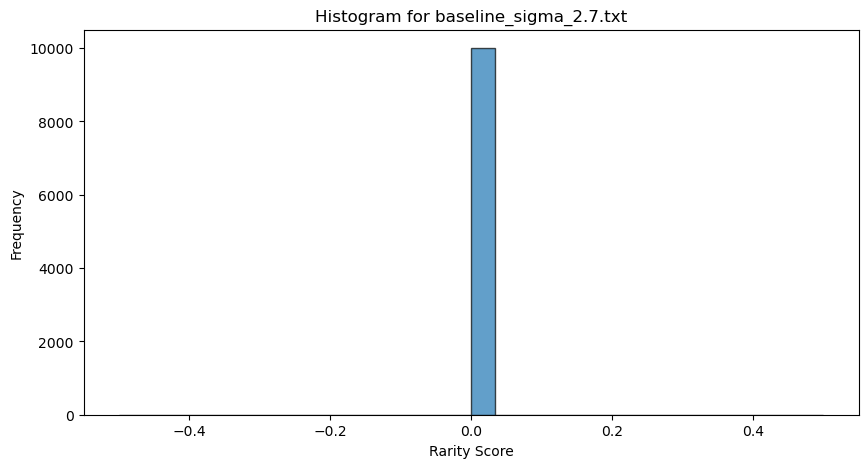

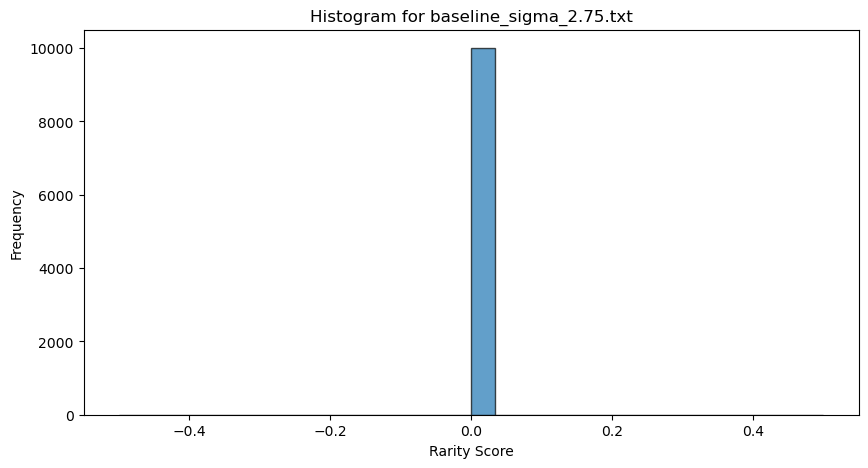

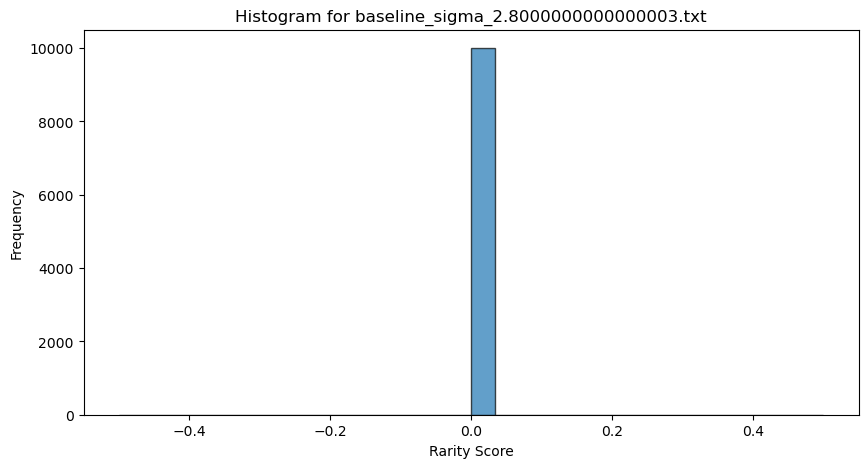

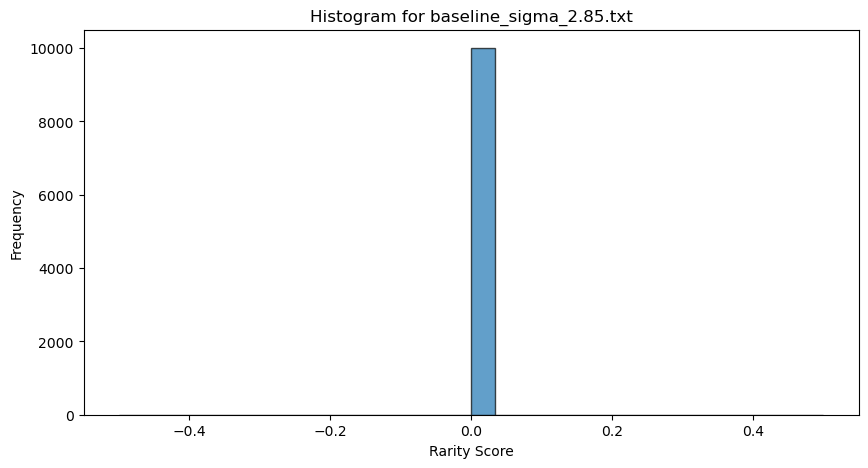

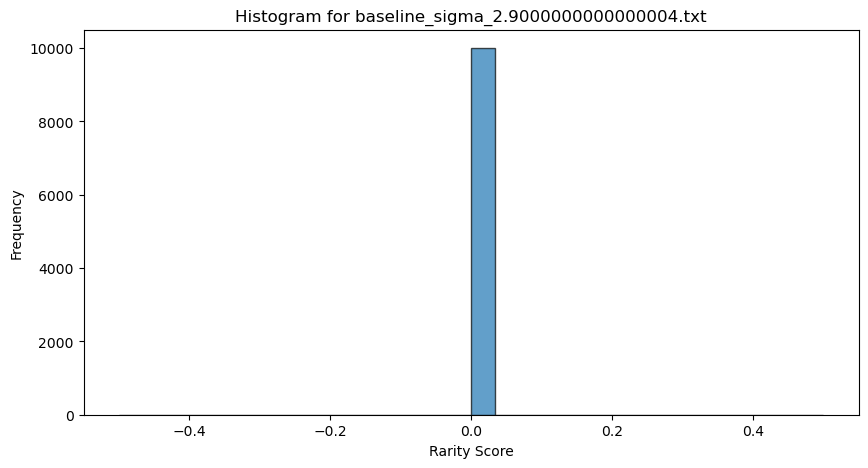

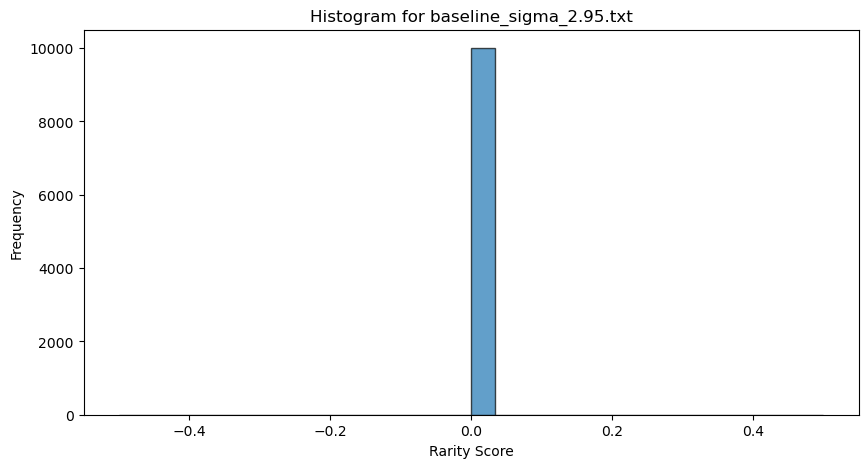

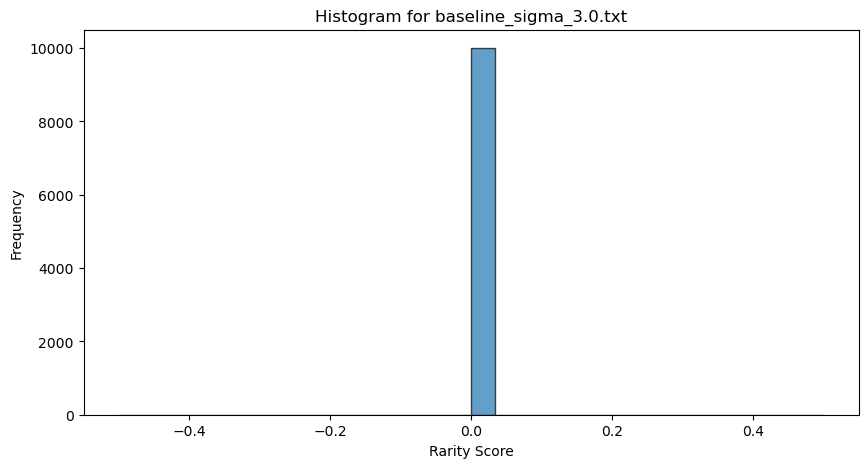

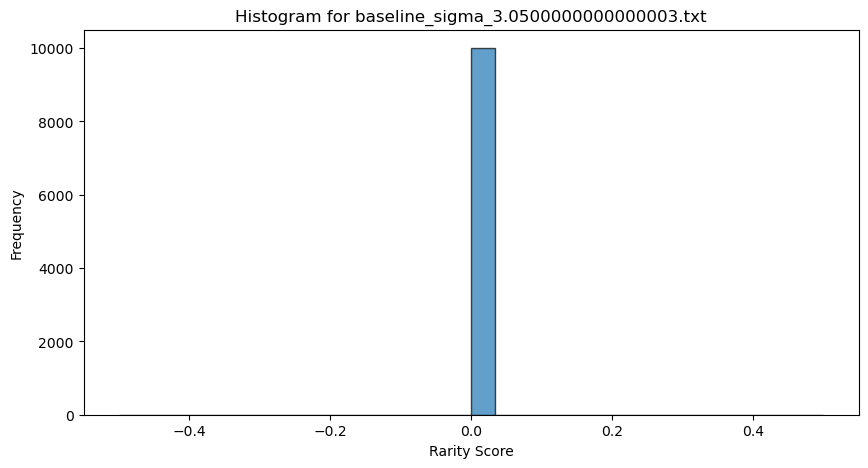

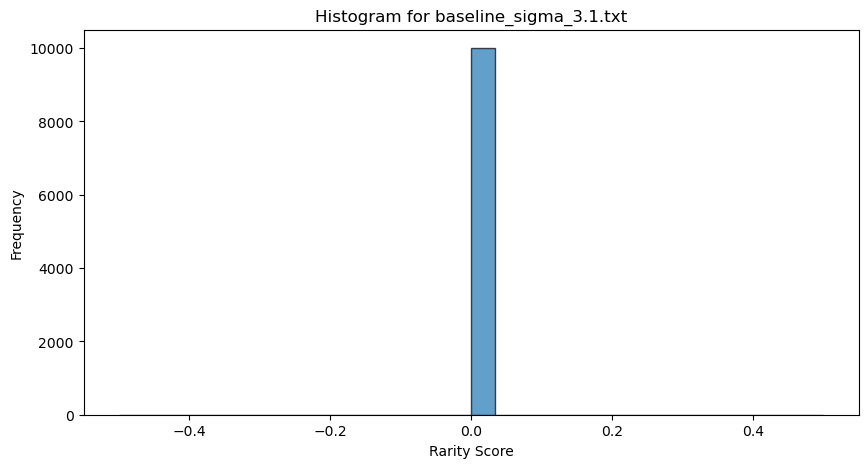

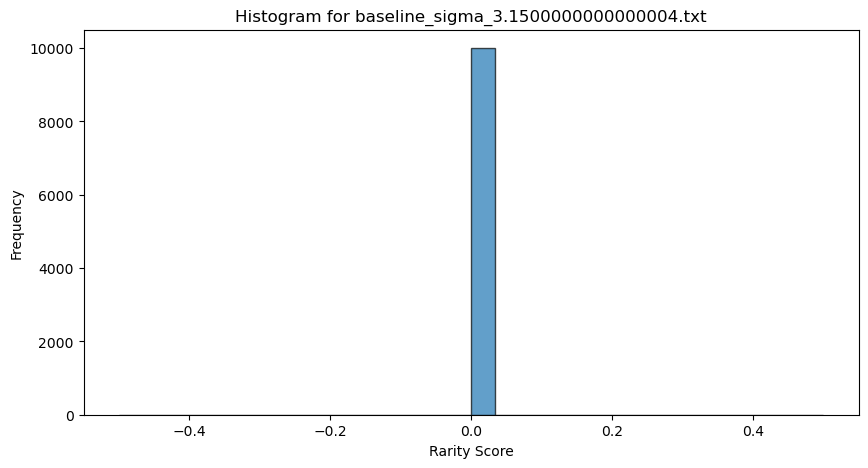

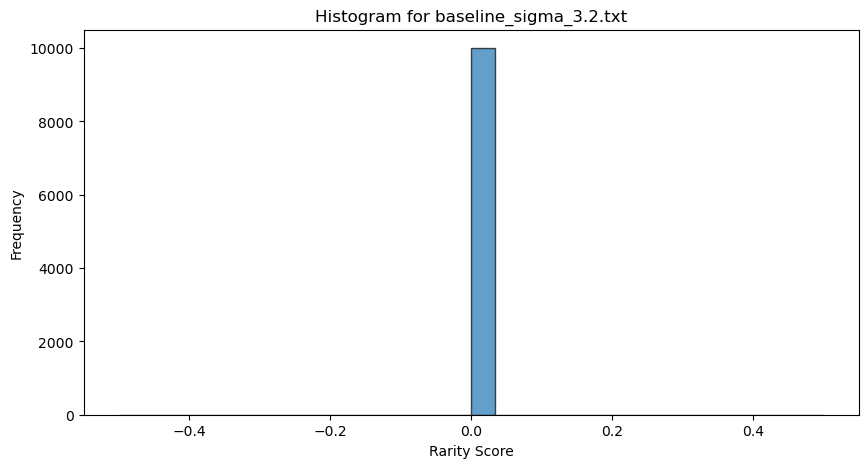

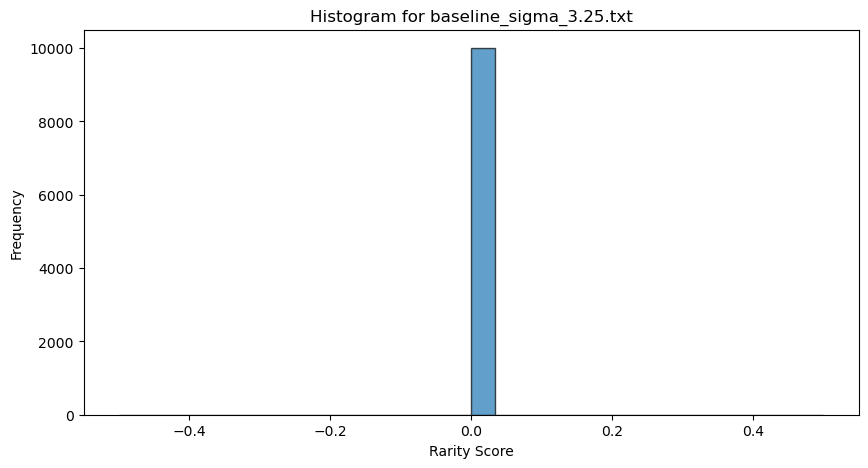

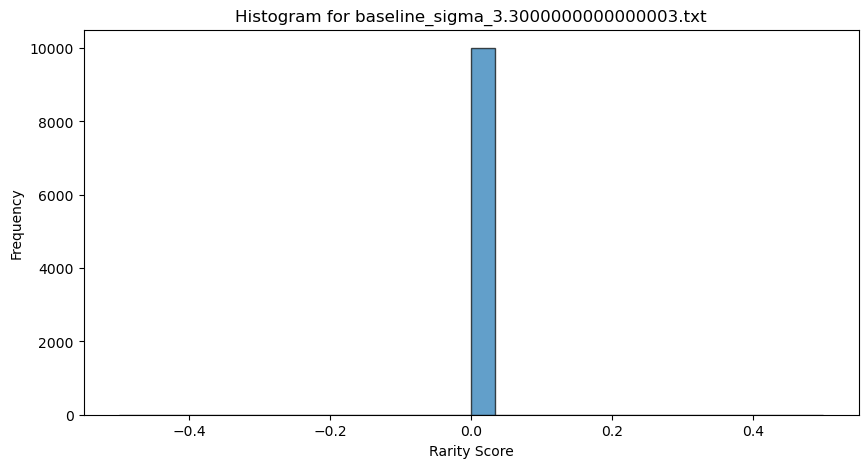

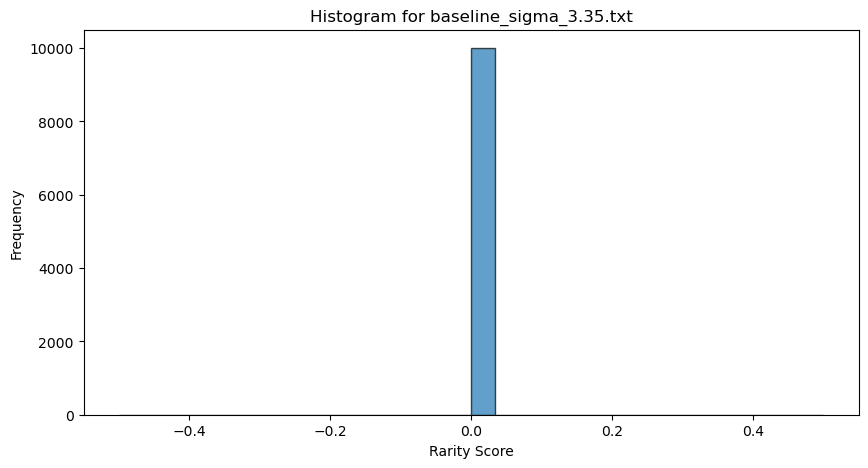

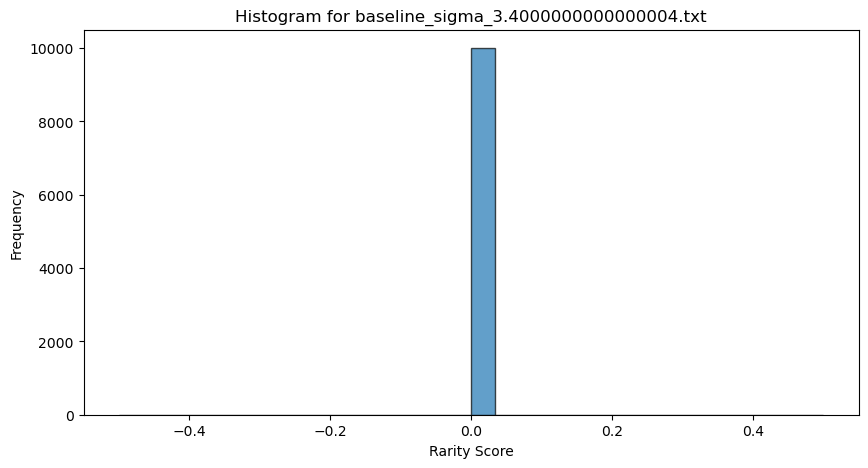

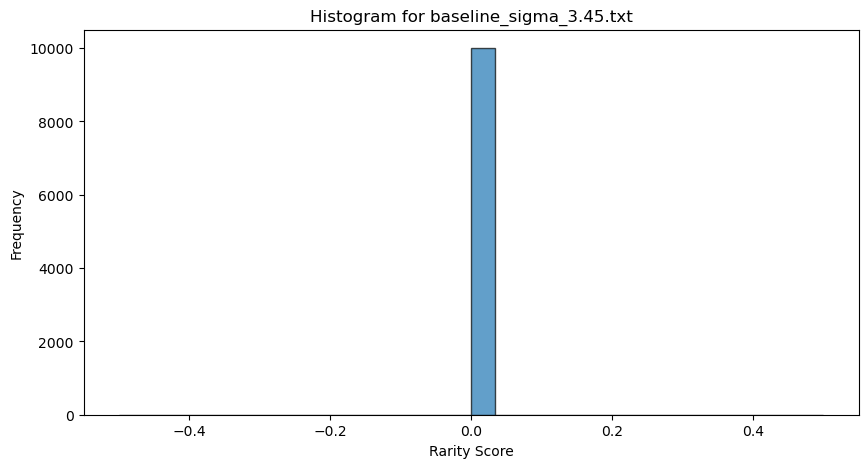

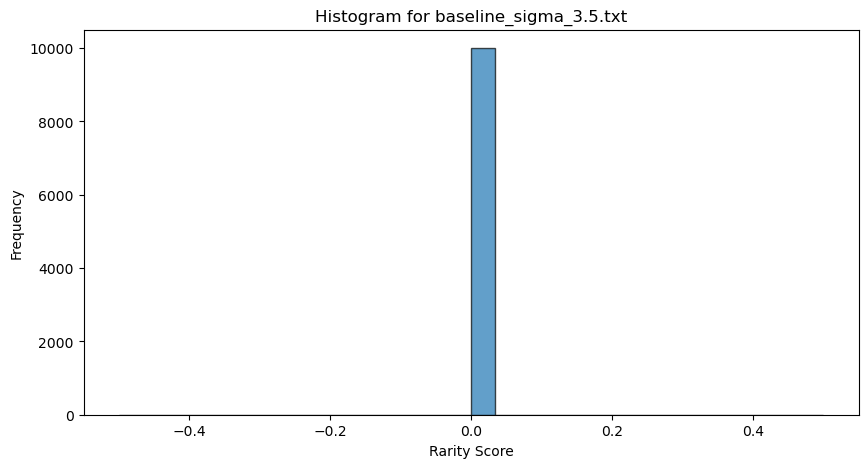

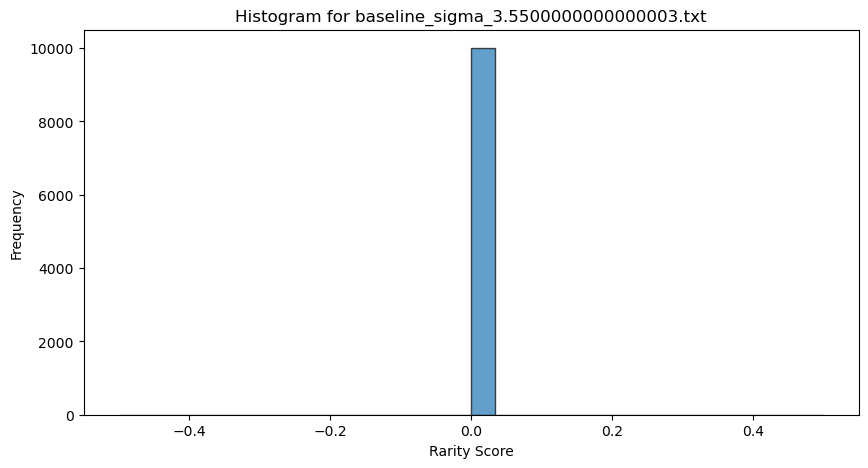

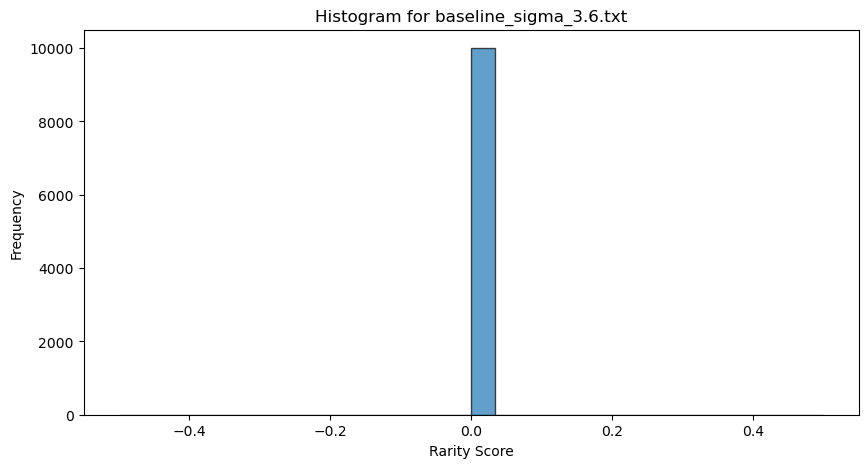

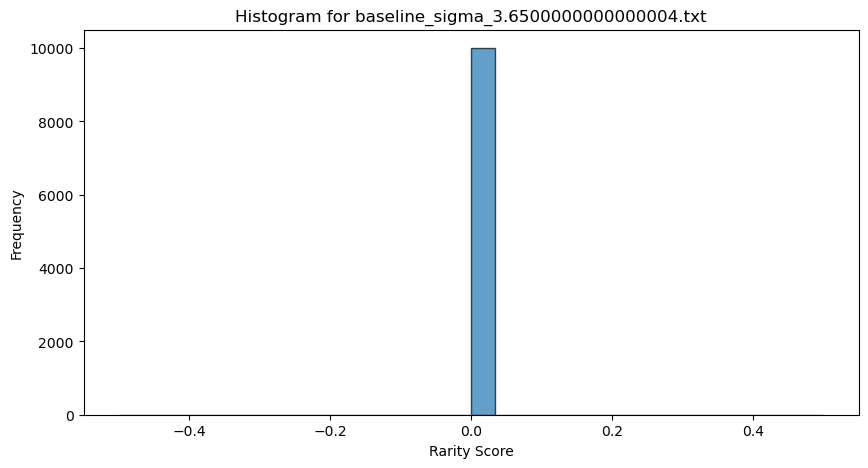

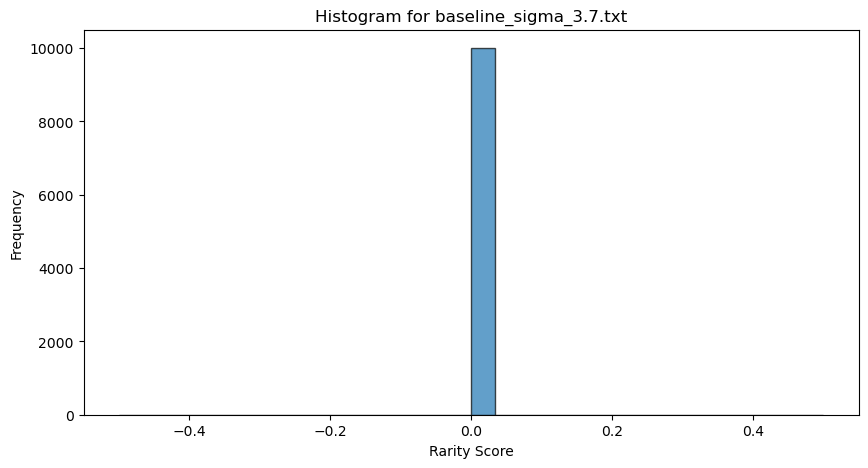

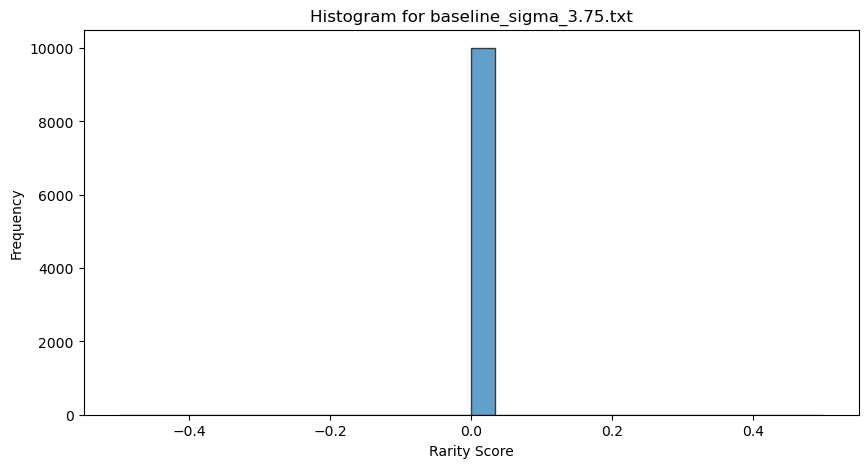

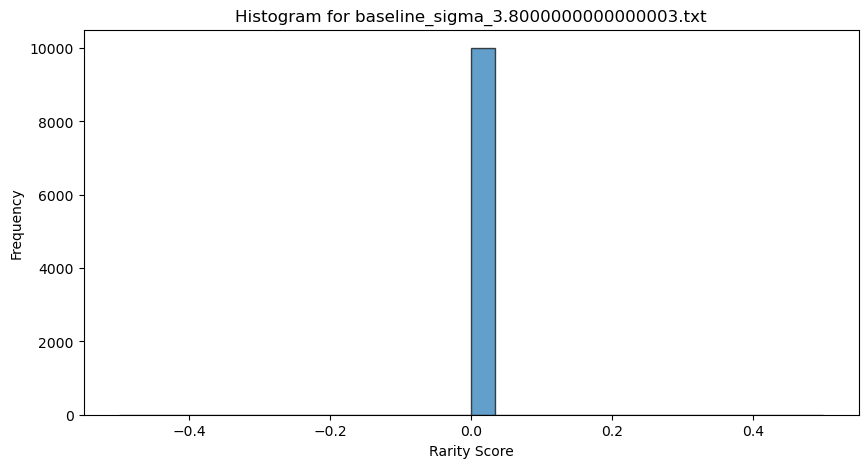

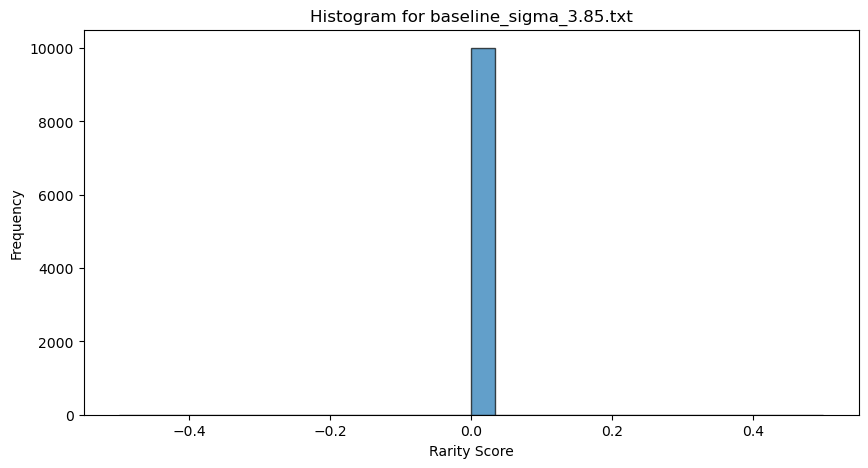

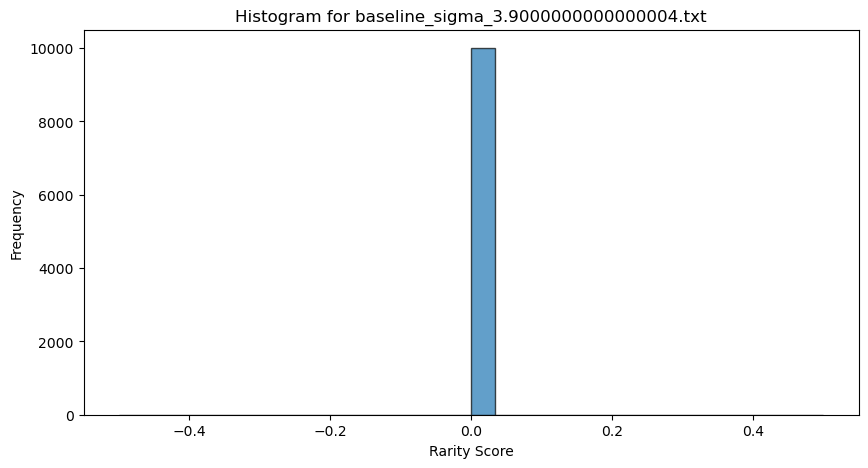

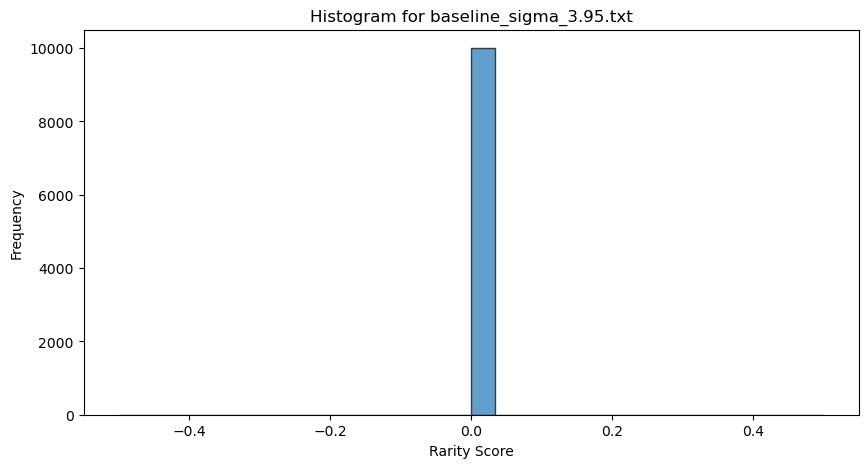

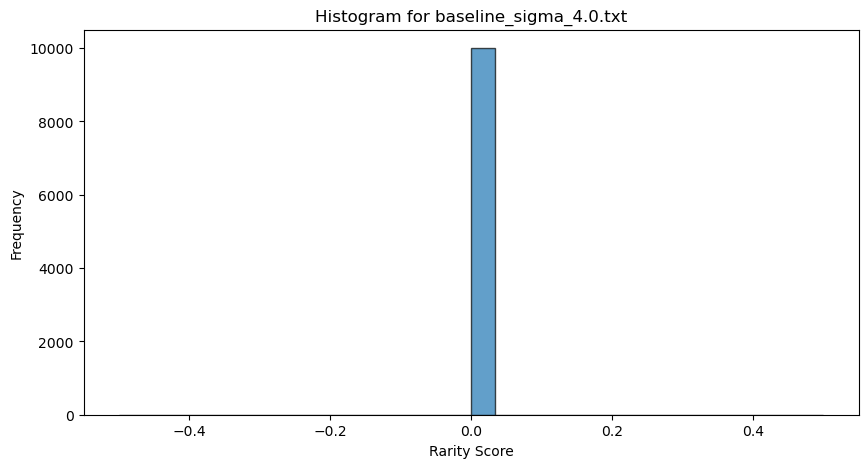

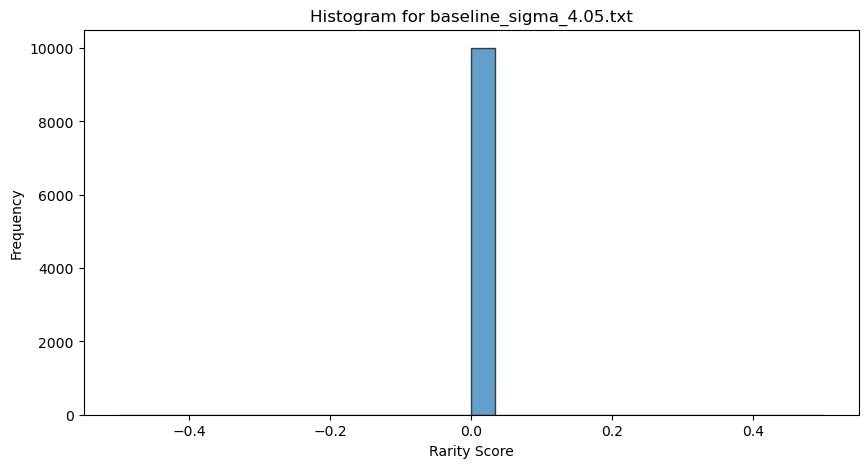

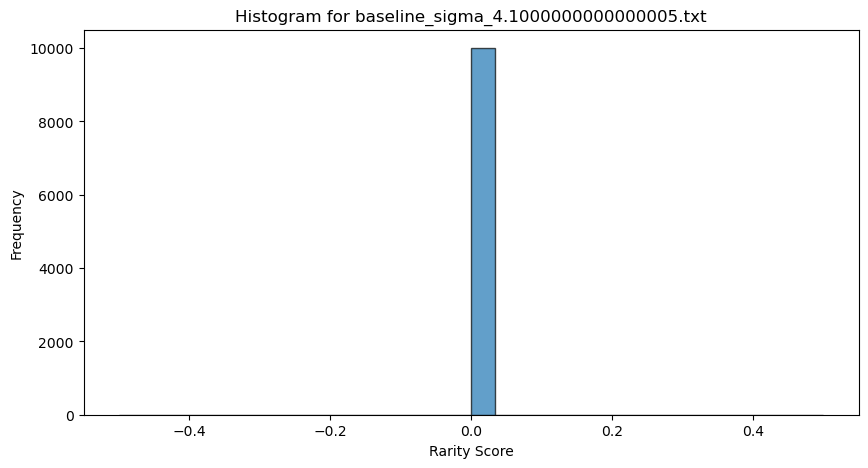

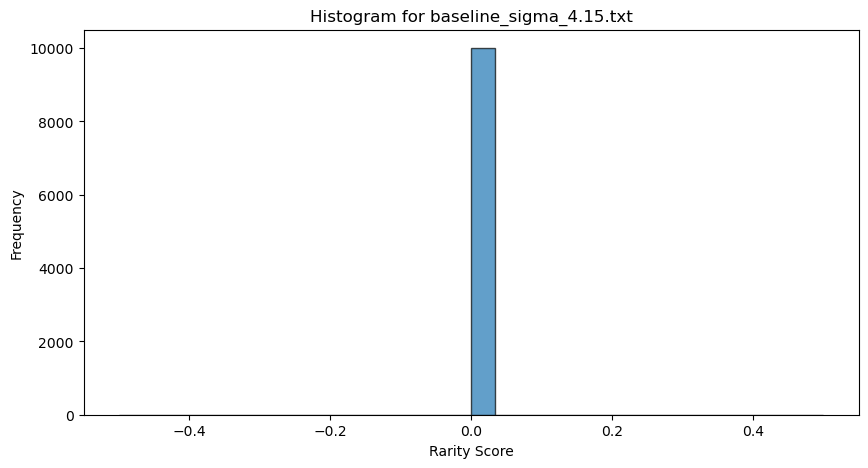

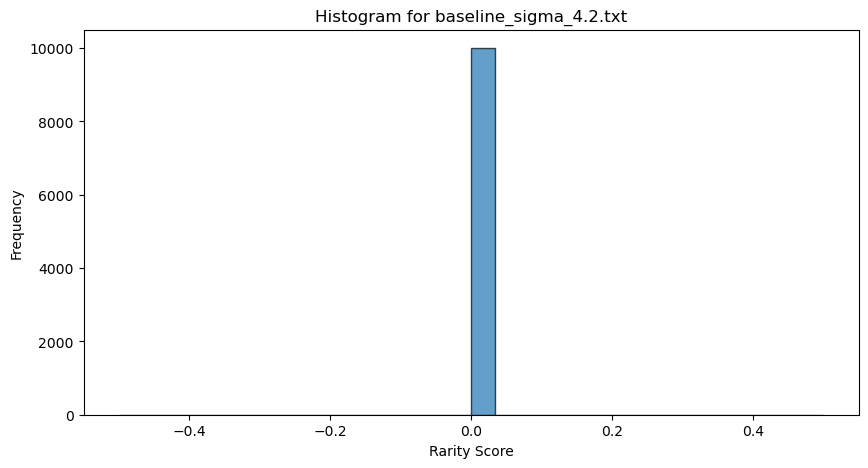

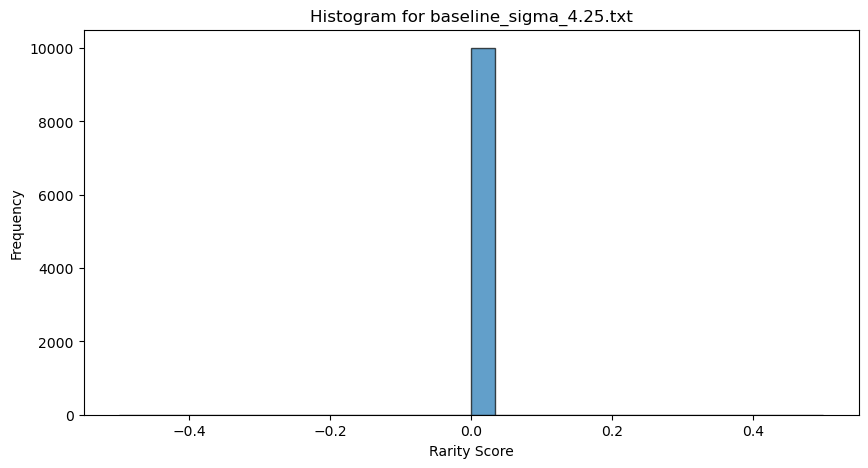

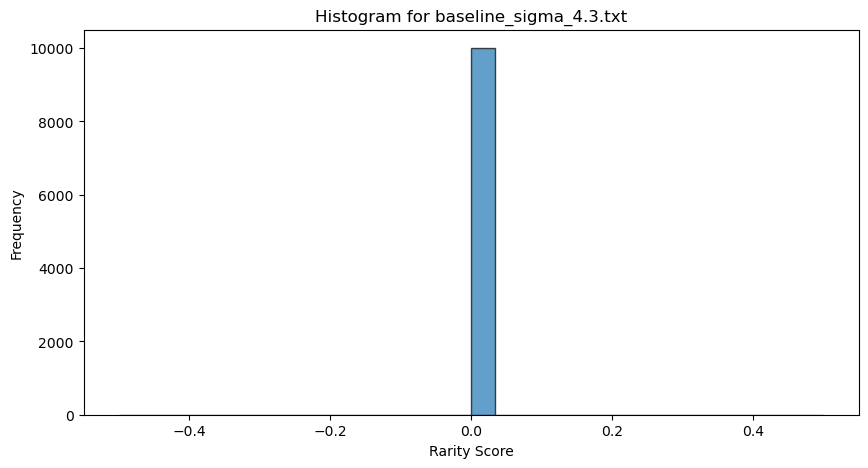

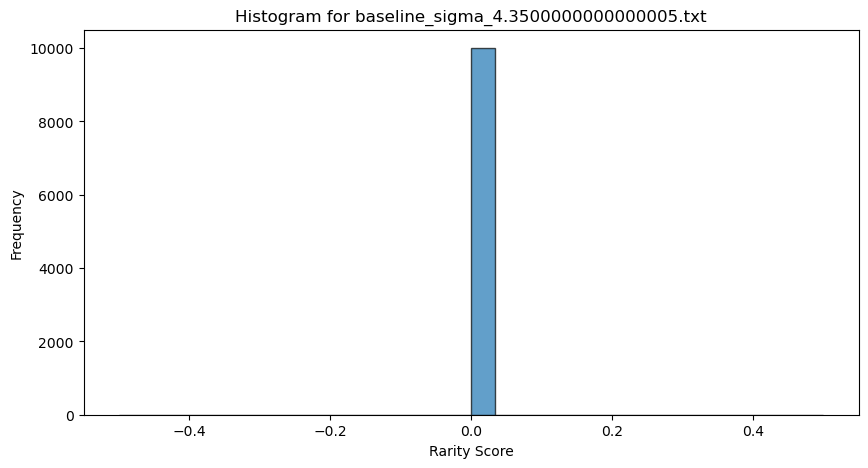

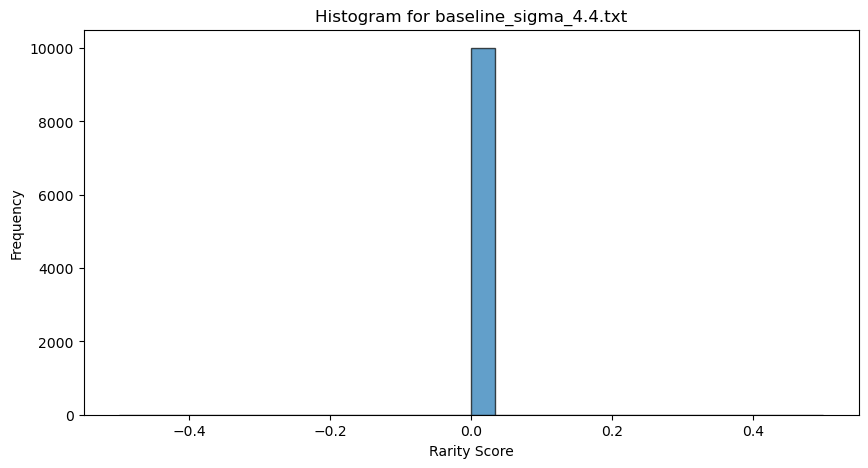

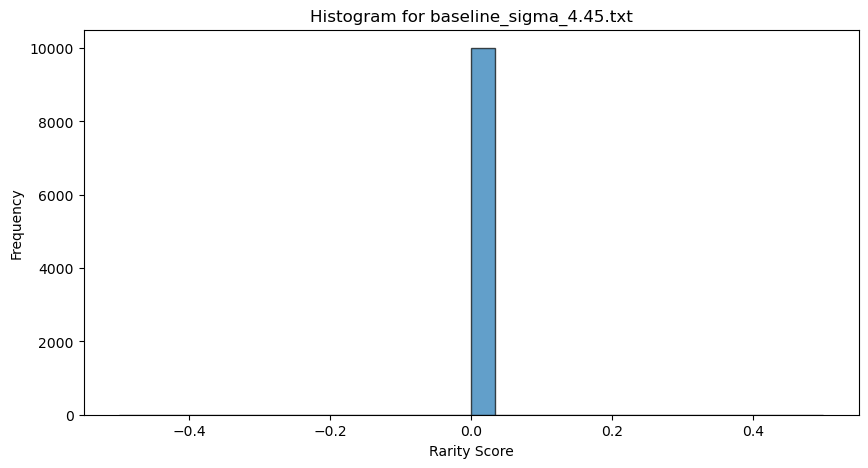

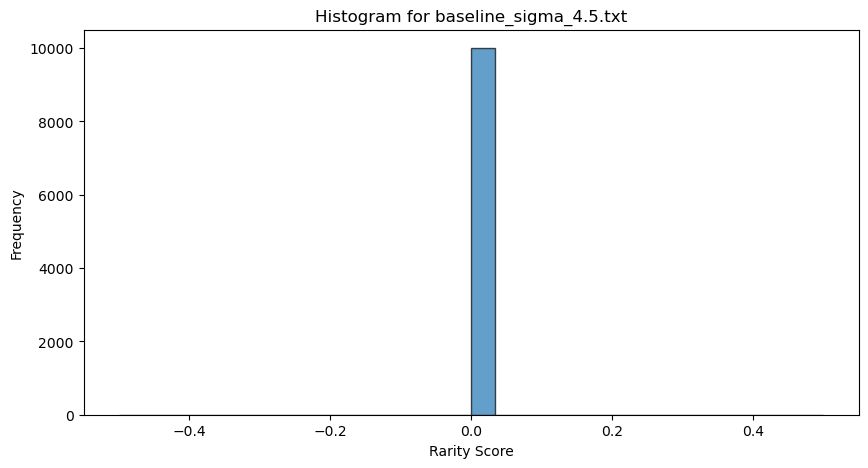

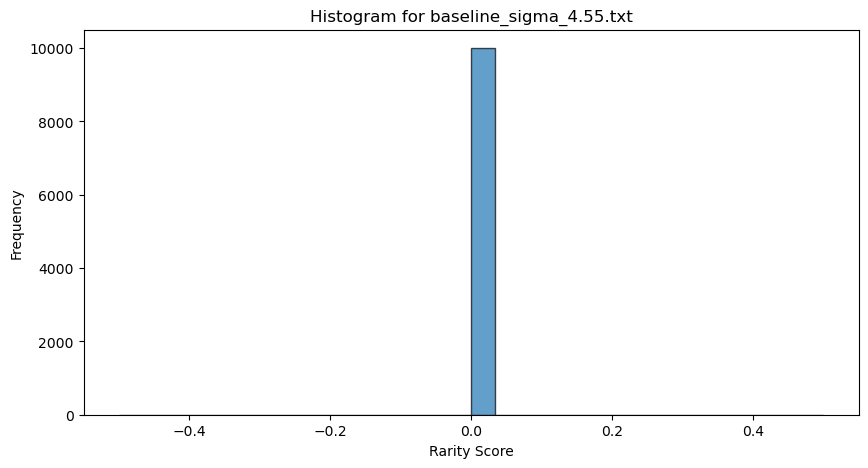

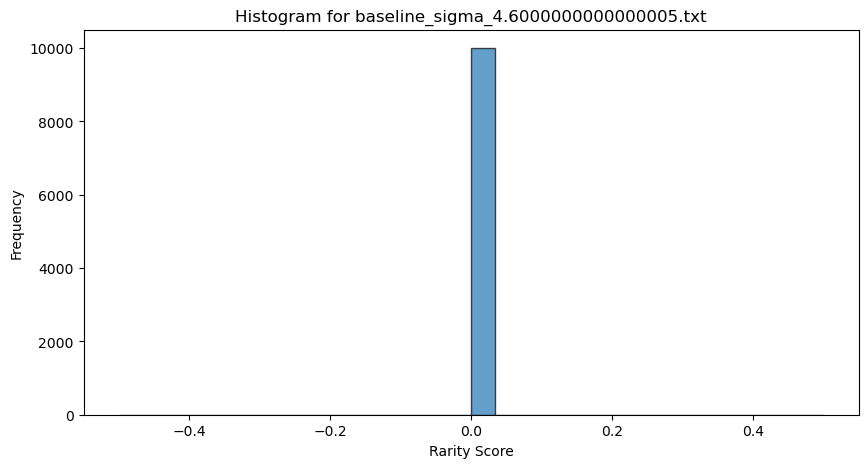

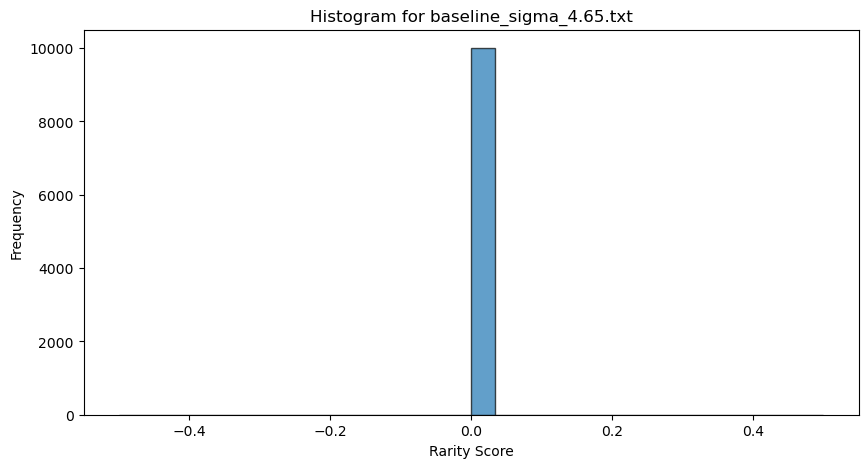

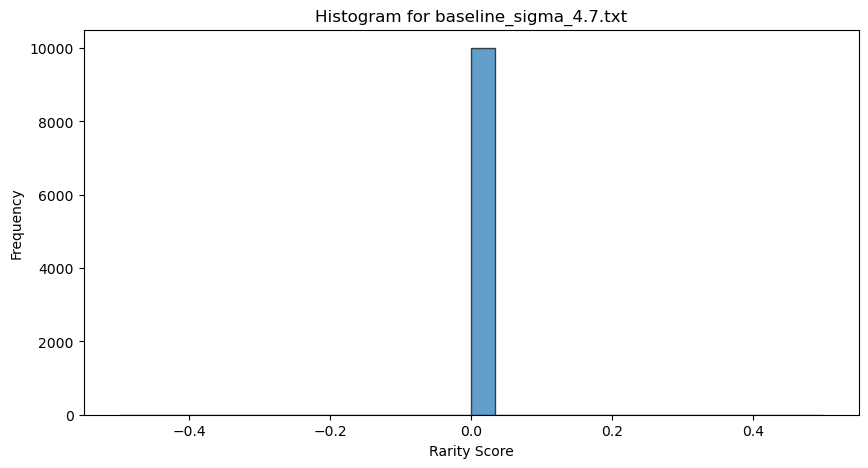

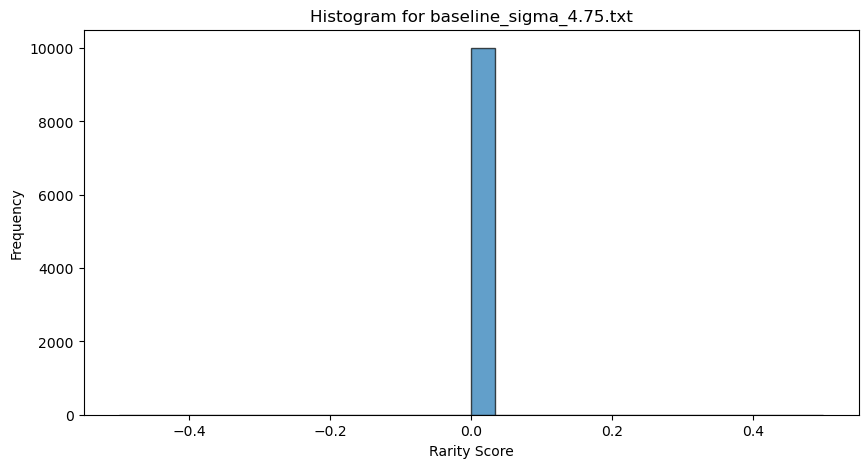

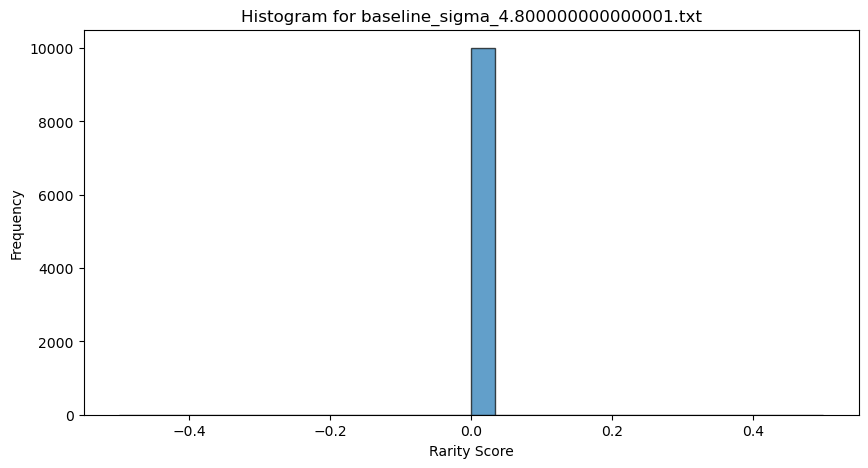

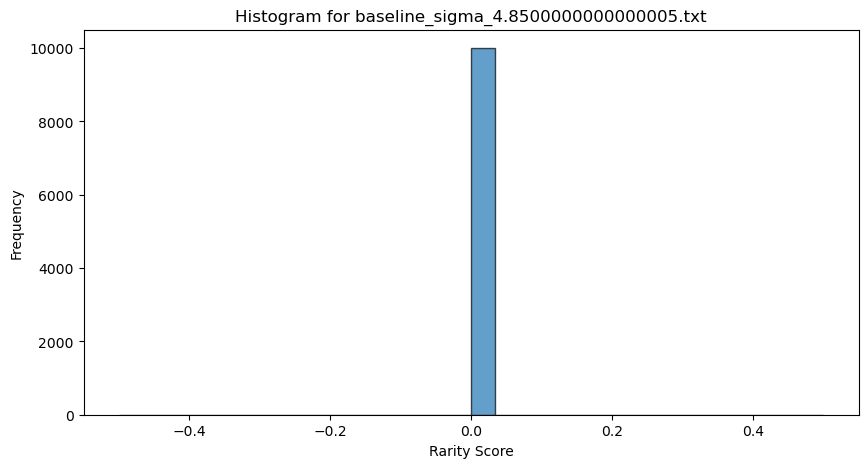

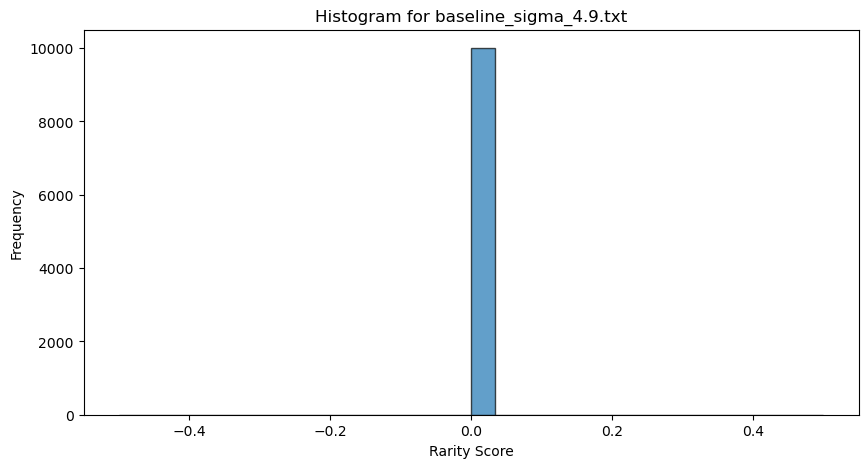

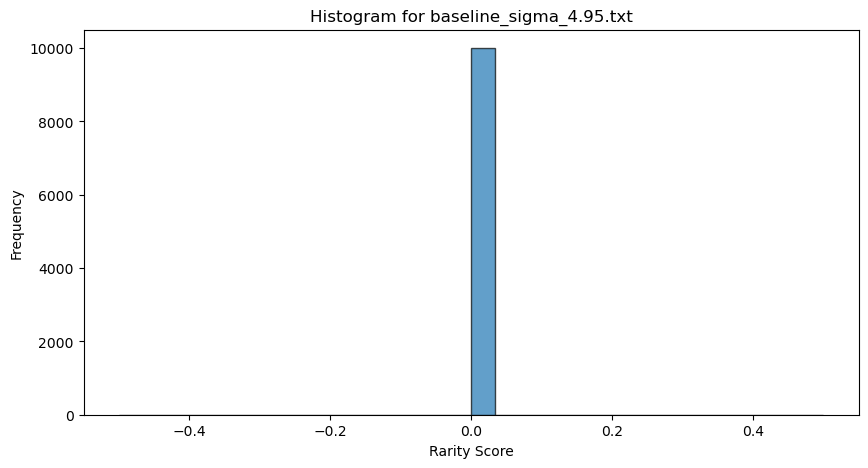

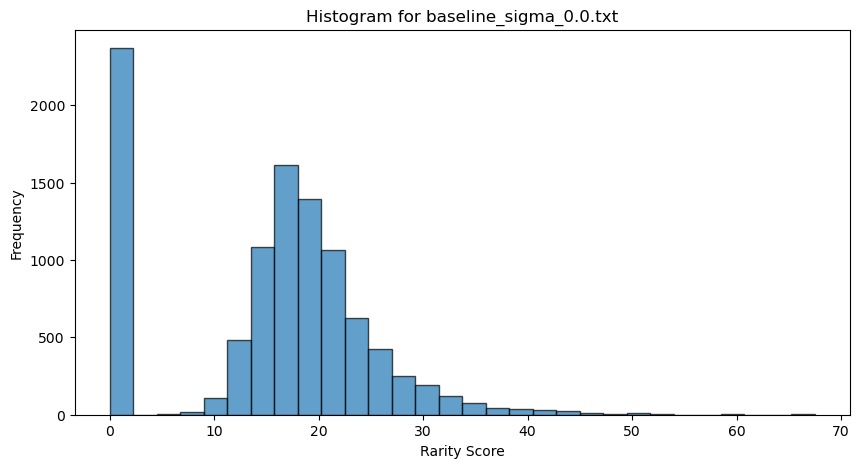

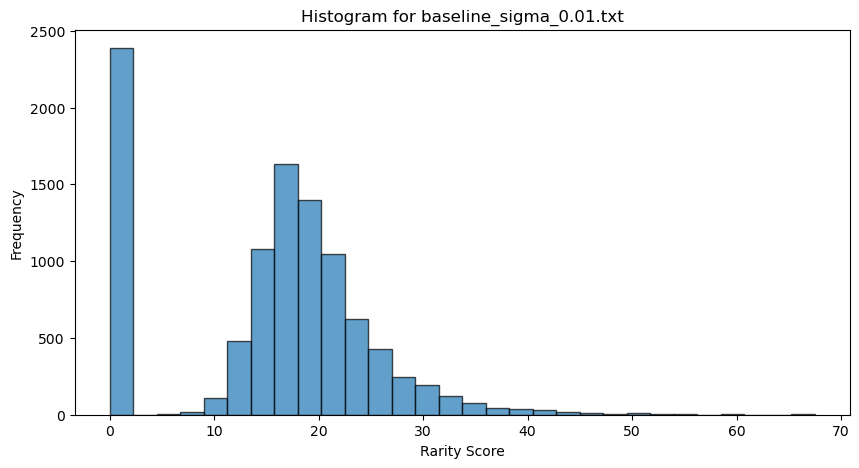

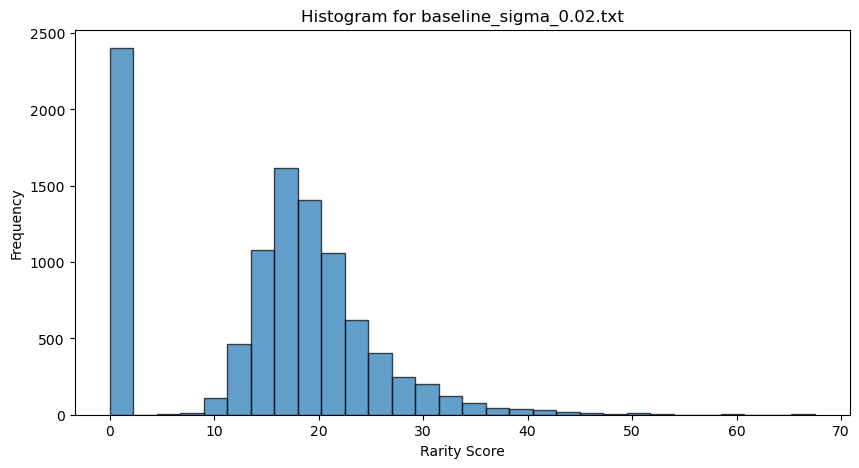

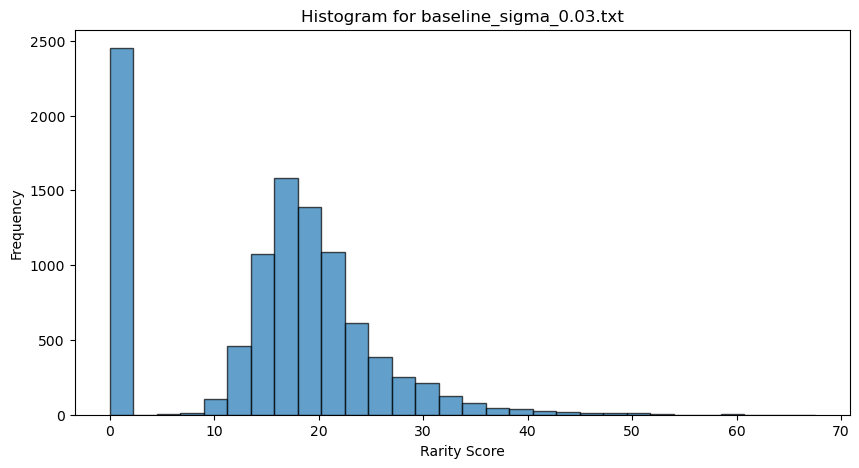

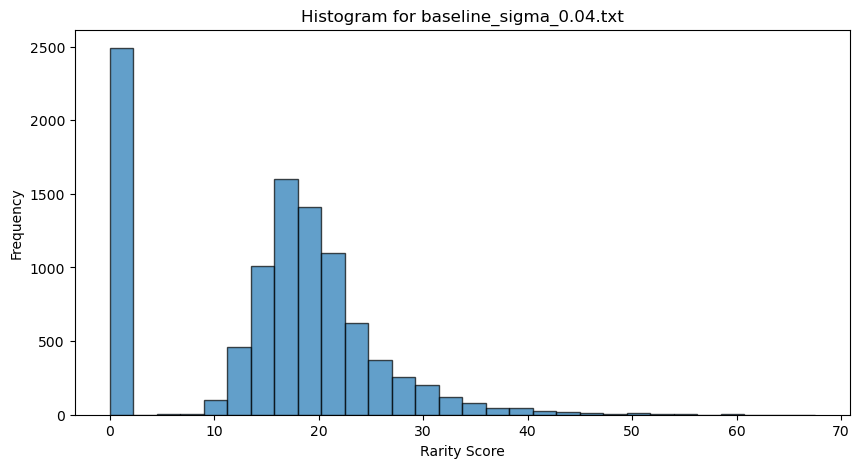

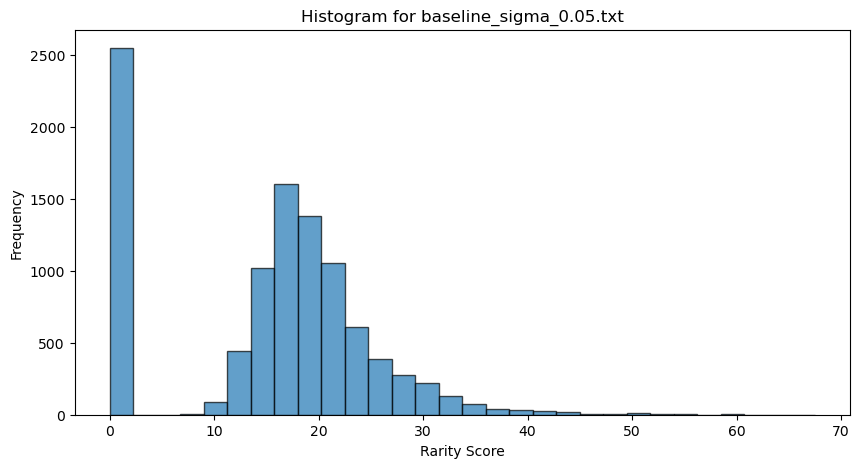

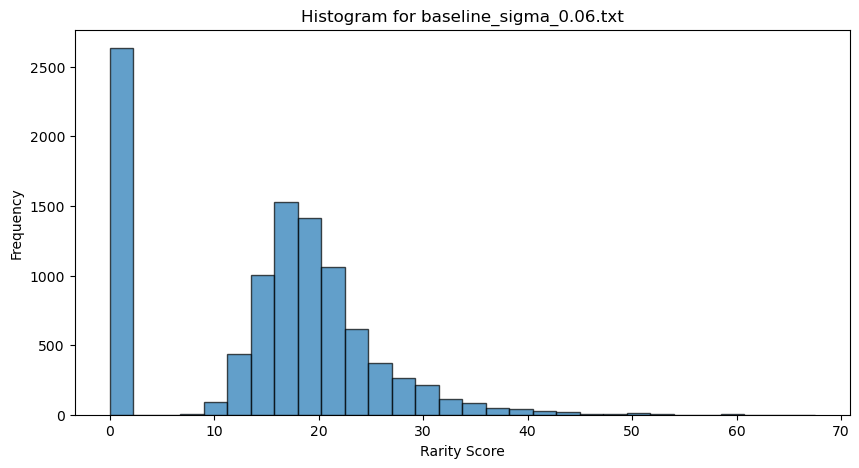

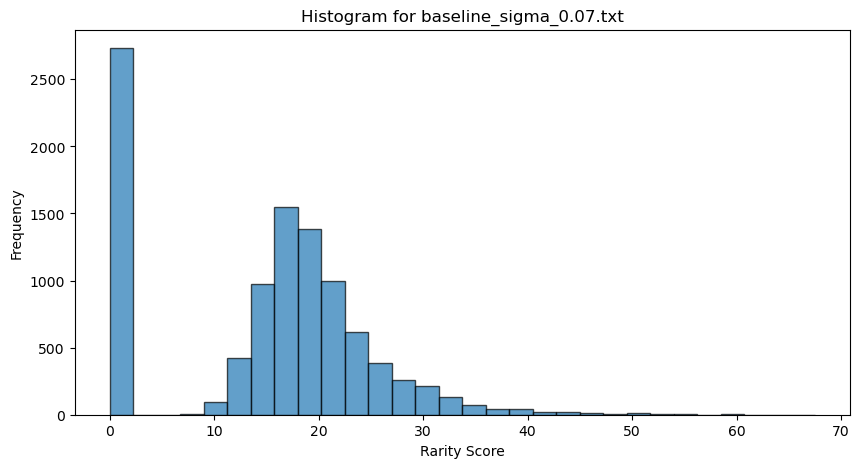

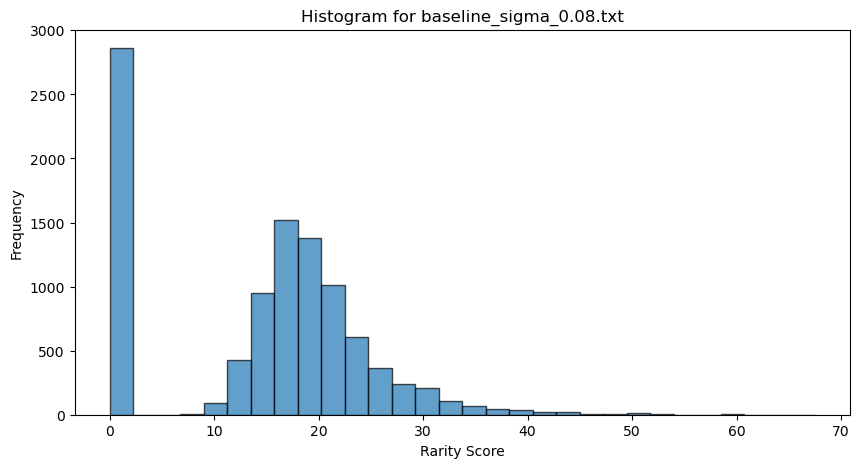

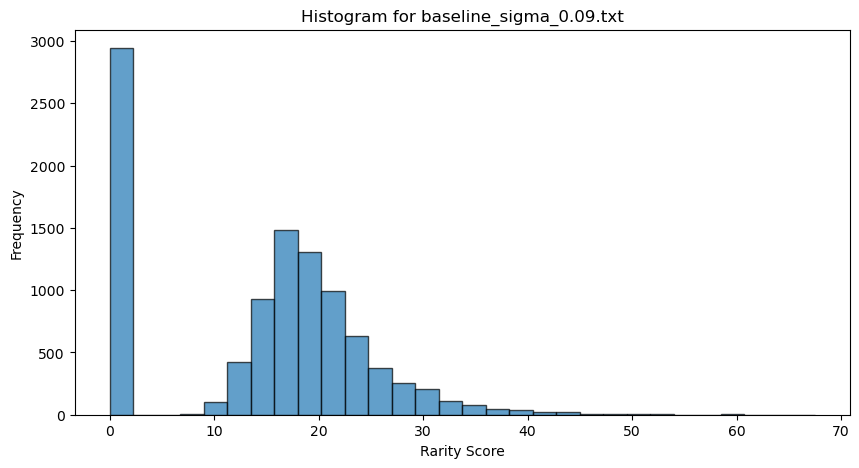

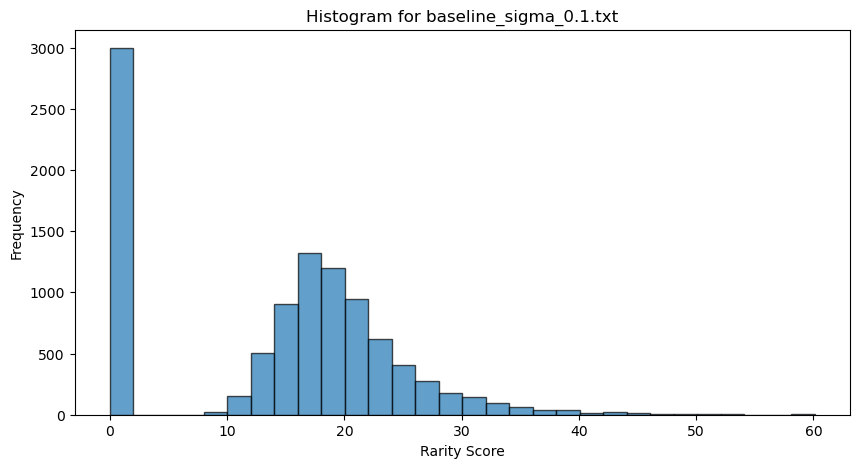

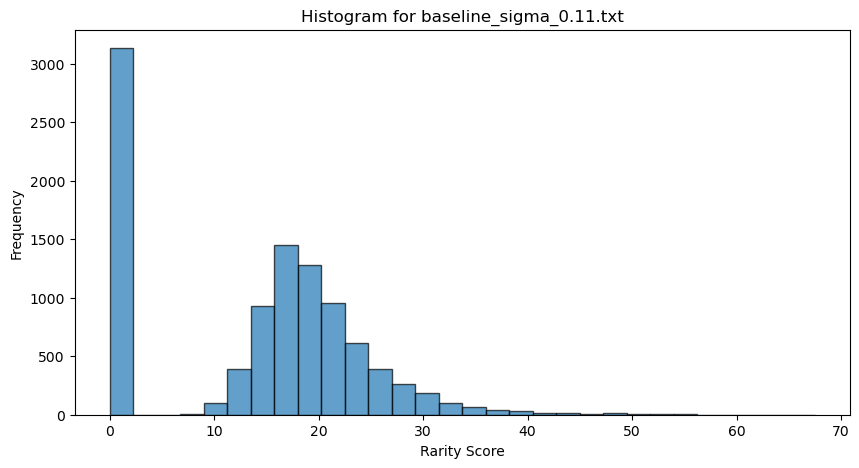

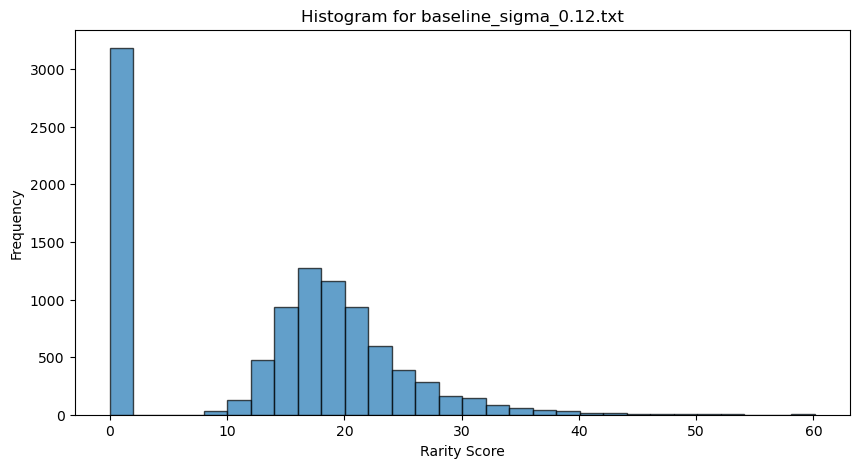

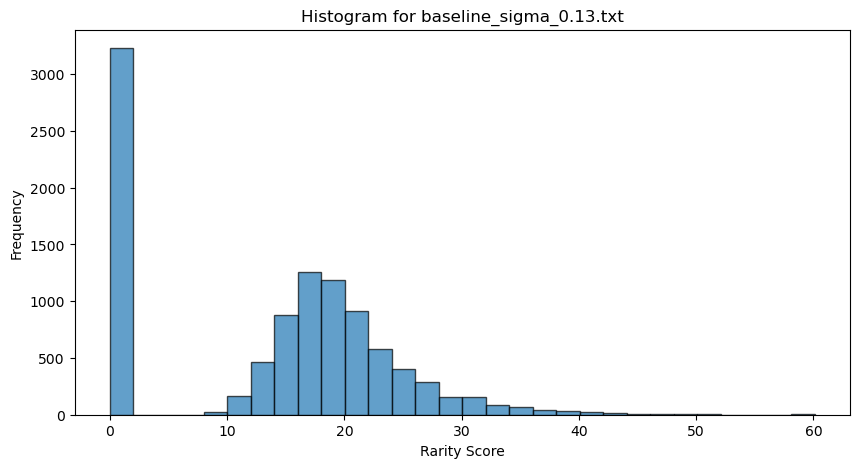

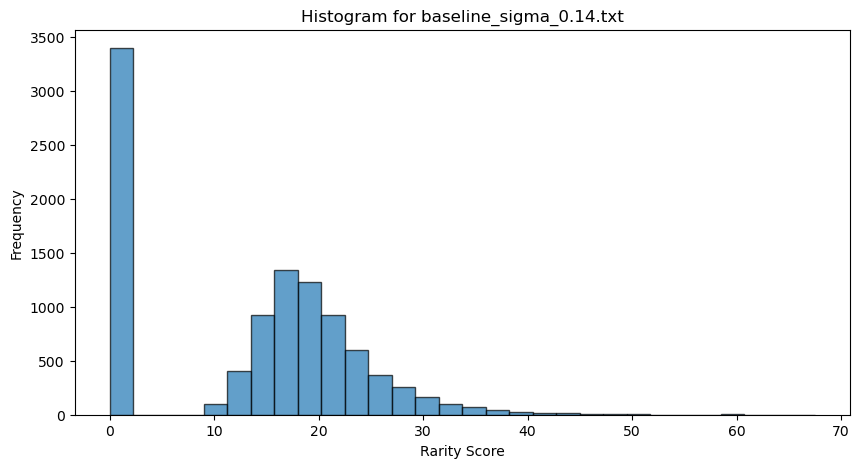

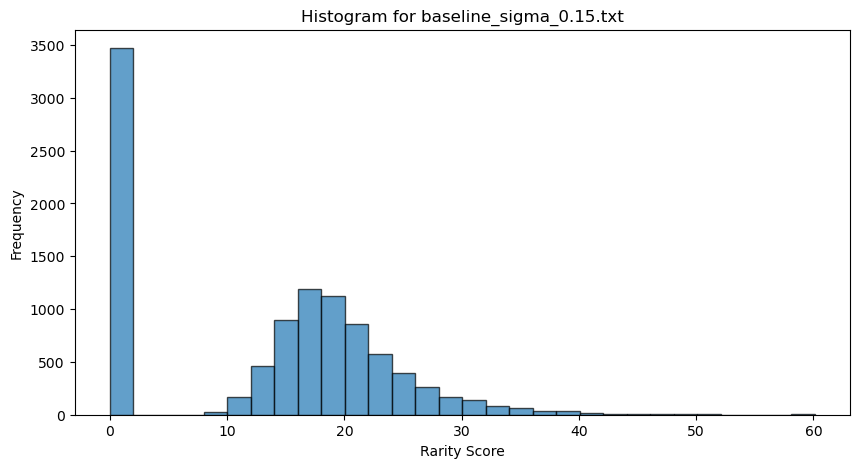

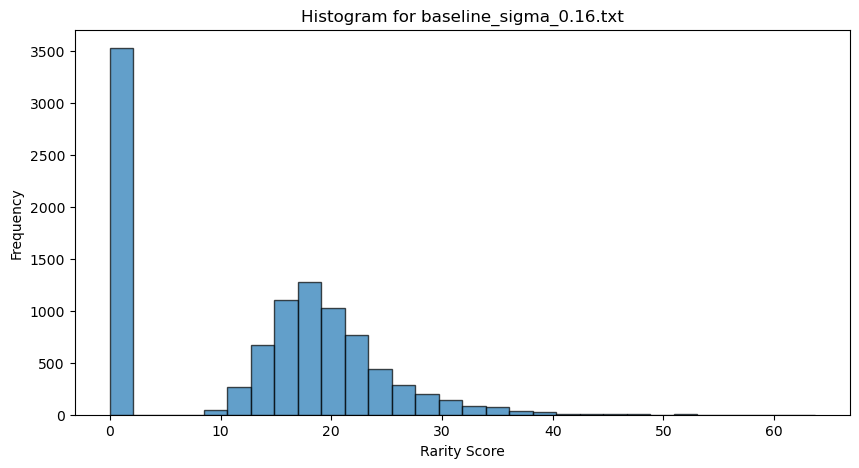

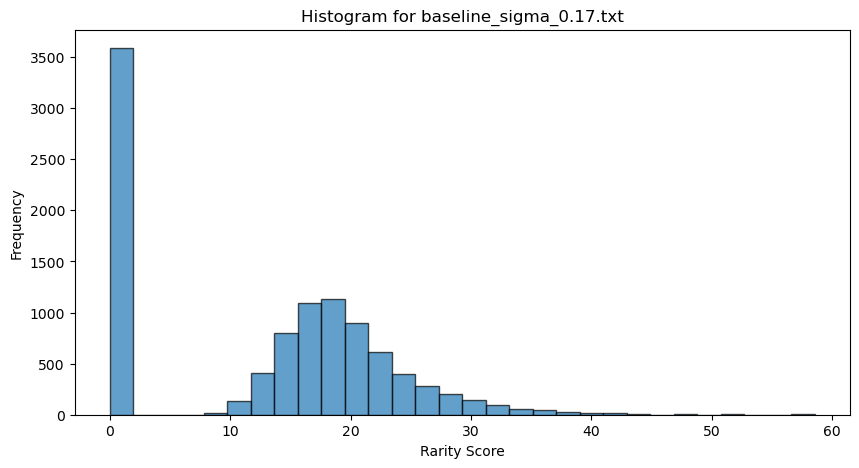

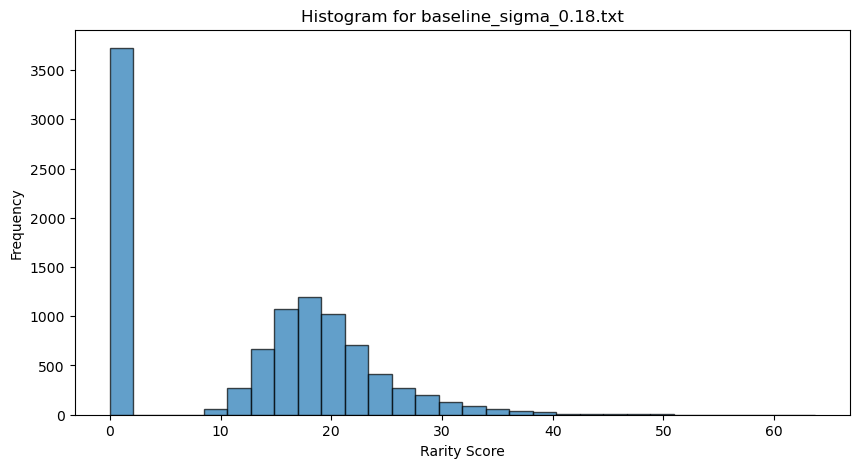

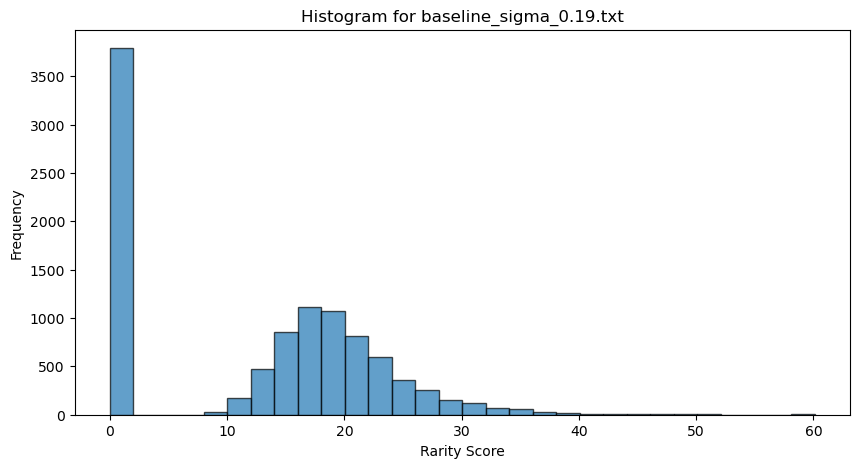

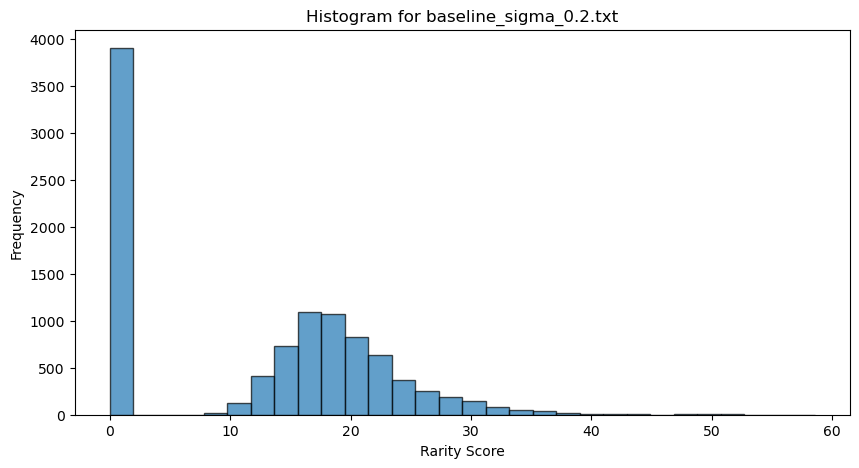

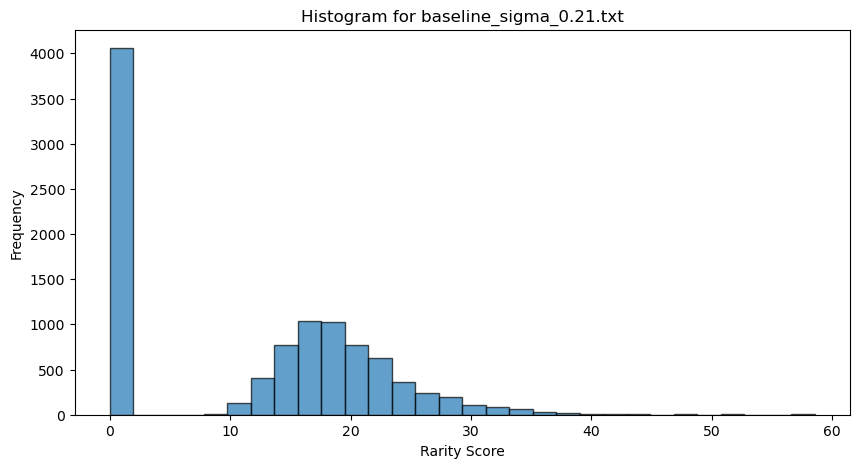

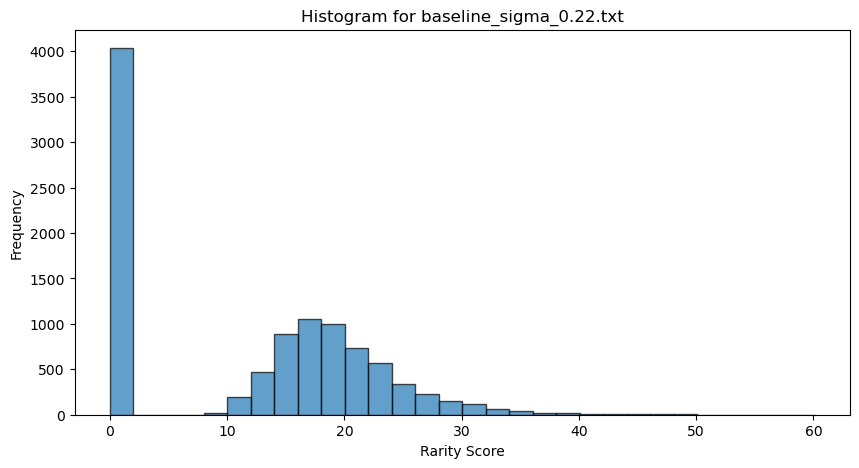

KeyboardInterrupt: 

In [5]:


directories = ['result/2_pairs_of_class/', 'result/9_class_against_remain/', 'result/add_gaussian_noise/',  'result/add_gaussian_noise_trial_2/']

for directory in directories:
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            scores = np.loadtxt(os.path.join(directory, filename))
            # filtered_scores = scores[scores != 0]  # filter out zeros
            
            plt.figure(figsize=(10, 5))
            plt.hist(scores, bins=30, edgecolor='black', alpha=0.7)
            plt.title(f"Histogram for {filename}")
            plt.xlabel('Rarity Score')
            plt.ylabel('Frequency')
            plt.show()


# Pairs Comparison

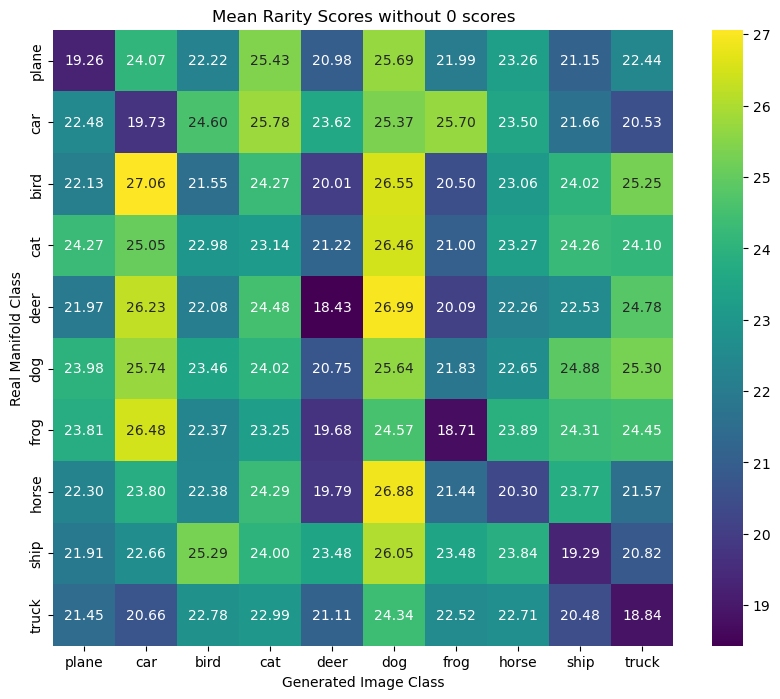

23.04414225978236
[[19.26051996 24.07124751 22.22490734 25.42829902 20.98334908 25.68835356
  21.98605324 23.25601104 21.14786241 22.44139808]
 [22.47994166 19.73268968 24.59586705 25.77796445 23.61915591 25.37427393
  25.70048686 23.50072102 21.66375852 20.53276225]
 [22.12585903 27.06436986 21.54949727 24.2683174  20.00816009 26.5477359
  20.49848248 23.06071104 24.01798819 25.24621242]
 [24.27024879 25.05057017 22.98340863 23.13931014 21.22388796 26.45985824
  20.99535897 23.26516449 24.26163757 24.09728706]
 [21.97193531 26.23088585 22.08469654 24.48170693 18.43218989 26.99328655
  20.08599012 22.26199154 22.52952505 24.77852094]
 [23.98010427 25.73671117 23.46109389 24.01574076 20.75220829 25.63606143
  21.82826683 22.65005559 24.88487734 25.29772509]
 [23.81287272 26.47800155 22.37215782 23.24748797 19.68222167 24.56812901
  18.71401909 23.89483189 24.30544134 24.44607844]
 [22.29693211 23.79876738 22.37907359 24.2887373  19.78923232 26.88408048
  21.44281192 20.29731202 23.77020

In [133]:
classDict = {'plane': 0, 'car': 1, 'bird': 2, 'cat': 3, 'deer': 4,
             'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

mean_scores_matrix = np.zeros((10, 10))


for filename in os.listdir('result/2_pairs_of_class/'):
    # Extract the class numbers
    _, gen_class, real_class = filename.split('_')
    _, real_class = real_class.split('against')
    real_class = real_class.removesuffix(".txt")
    real_class, gen_class = int(real_class), int(gen_class)
    # Get the mean score 
    mean_score = np.loadtxt(os.path.join('result/2_pairs_of_class/', filename))
    mean_score = np.mean(mean_score[mean_score!=0])
    
    mean_scores_matrix[real_class][gen_class] = mean_score

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(mean_scores_matrix, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=classDict.keys(), yticklabels=classDict.keys())
plt.title('Mean Rarity Scores without 0 scores')
plt.xlabel('Generated Image Class')
plt.ylabel('Real Manifold Class')
plt.show()

print(np.mean(mean_scores_matrix))
print(mean_scores_matrix)

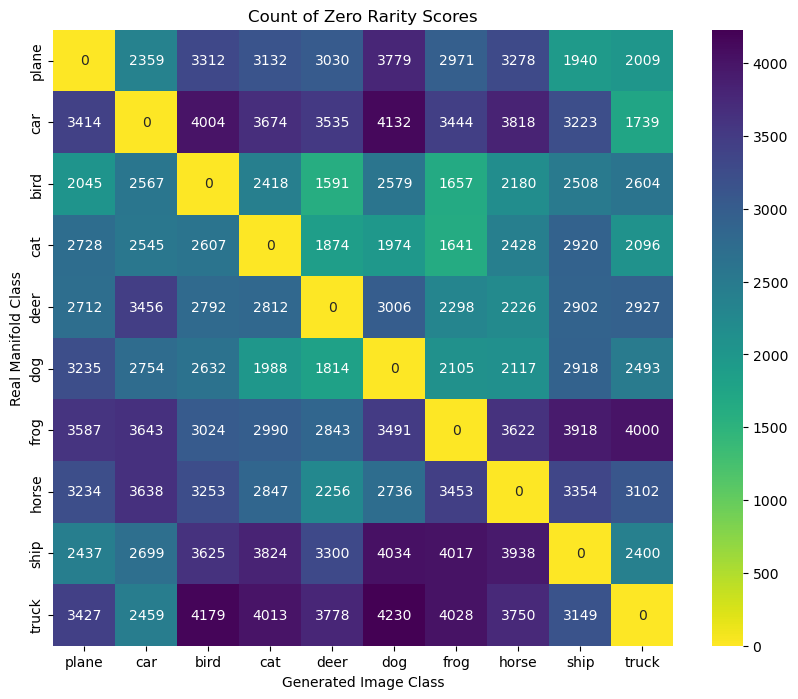

2672.2
[[   0 2359 3312 3132 3030 3779 2971 3278 1940 2009]
 [3414    0 4004 3674 3535 4132 3444 3818 3223 1739]
 [2045 2567    0 2418 1591 2579 1657 2180 2508 2604]
 [2728 2545 2607    0 1874 1974 1641 2428 2920 2096]
 [2712 3456 2792 2812    0 3006 2298 2226 2902 2927]
 [3235 2754 2632 1988 1814    0 2105 2117 2918 2493]
 [3587 3643 3024 2990 2843 3491    0 3622 3918 4000]
 [3234 3638 3253 2847 2256 2736 3453    0 3354 3102]
 [2437 2699 3625 3824 3300 4034 4017 3938    0 2400]
 [3427 2459 4179 4013 3778 4230 4028 3750 3149    0]]


In [134]:
zero_scores_count_matrix = np.zeros((10, 10))

for filename in os.listdir('result/2_pairs_of_class/'):
    # Extract the class numbers
    _, gen_class, real_class = filename.split('_')
    _, real_class = real_class.split('against')
    real_class = real_class.removesuffix(".txt")
    real_class, gen_class = int(real_class), int(gen_class)
    
    # Count the zero scores
    scores = np.loadtxt(os.path.join('result/2_pairs_of_class/', filename))
    zero_count = np.sum(scores == 0)
    
    zero_scores_count_matrix[real_class][gen_class] = zero_count

zero_scores_count_matrix = zero_scores_count_matrix.astype(int)

plt.figure(figsize=(10,8))
sns.heatmap(zero_scores_count_matrix, annot=True, fmt="d", cmap='viridis_r', 
            xticklabels=classDict.keys(), yticklabels=classDict.keys())
plt.title('Count of Zero Rarity Scores')
plt.xlabel('Generated Image Class')
plt.ylabel('Real Manifold Class')
plt.show()
print(np.mean(zero_scores_count_matrix))
print(zero_scores_count_matrix)


# Pairs of Classes Comparison (line plot)

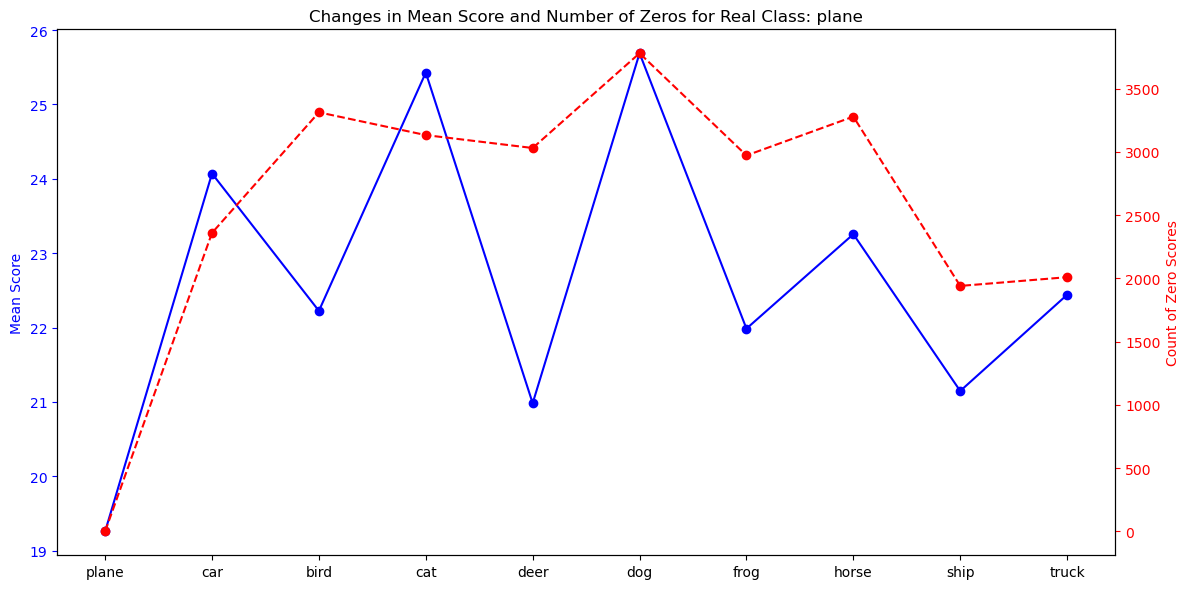

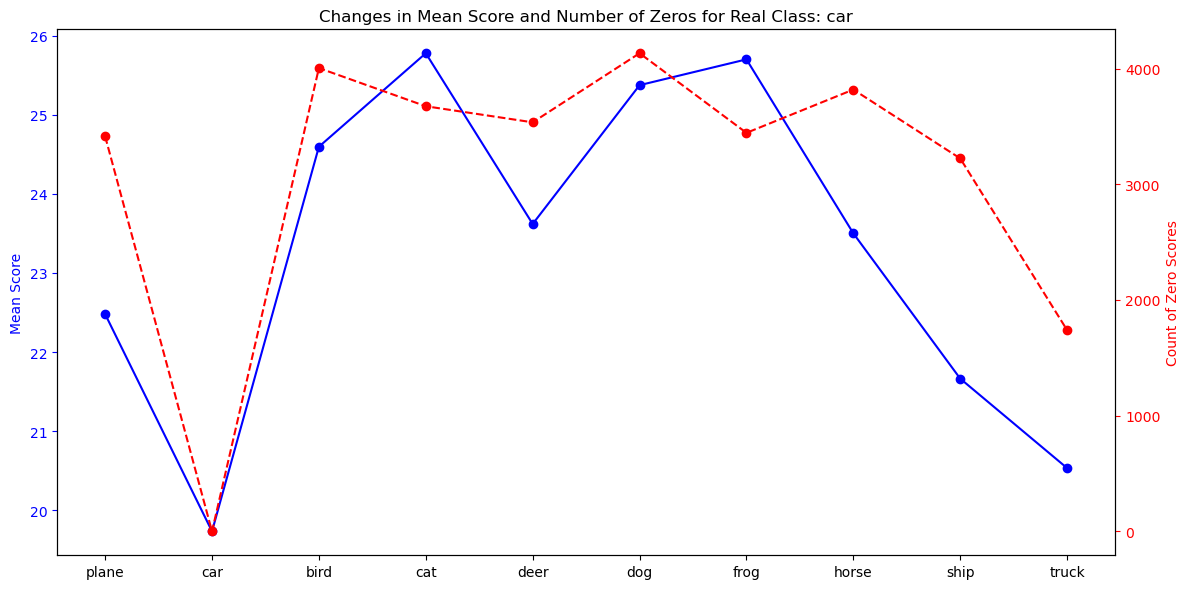

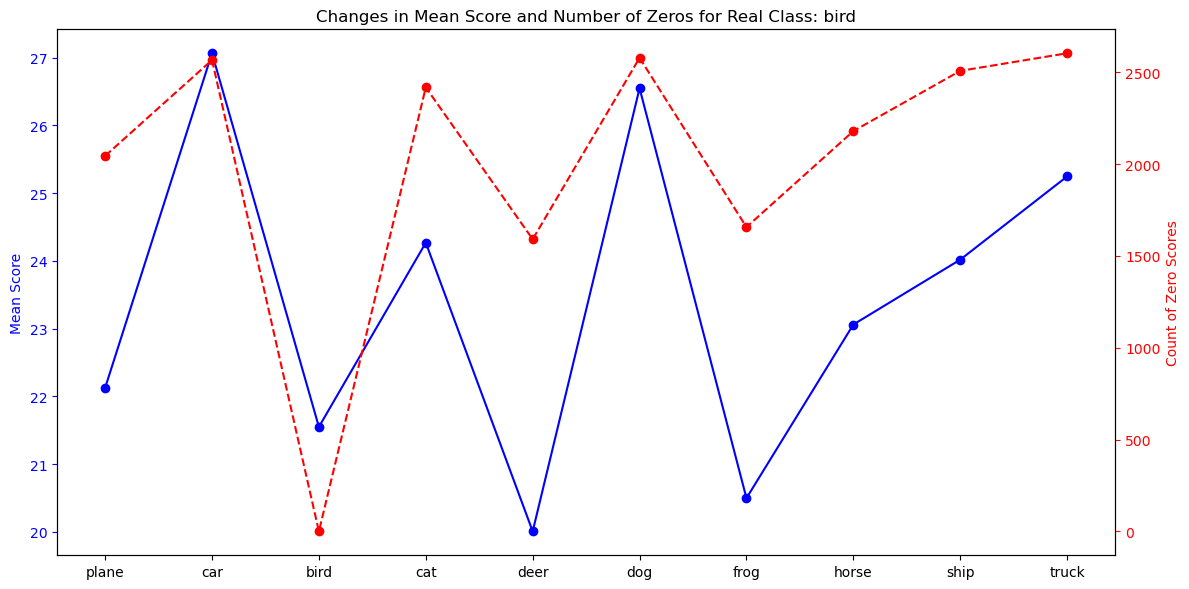

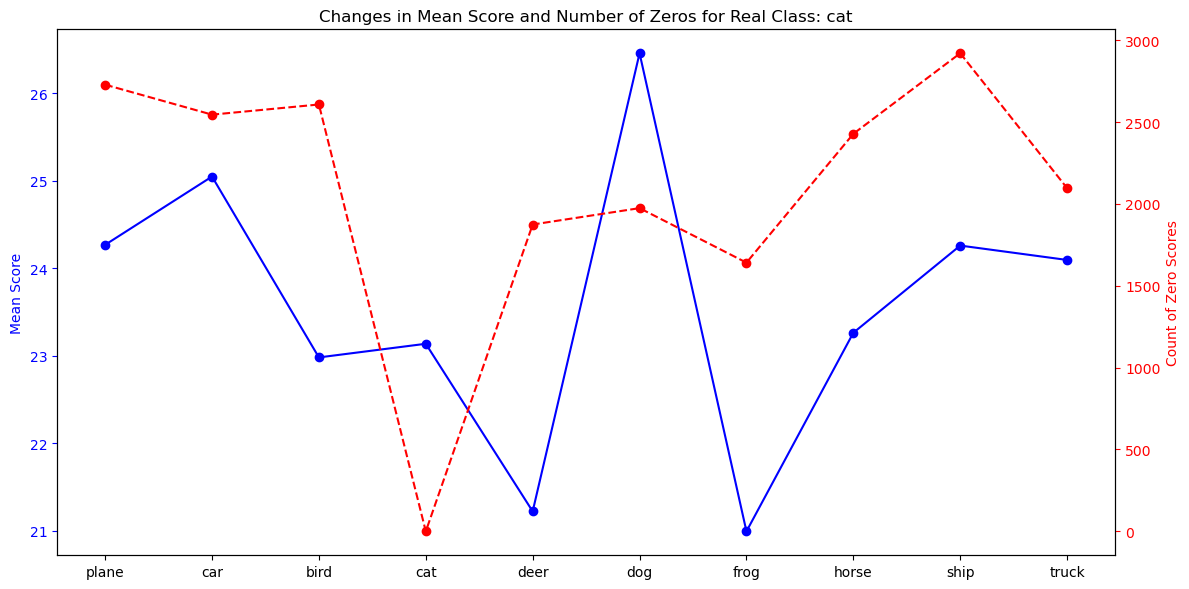

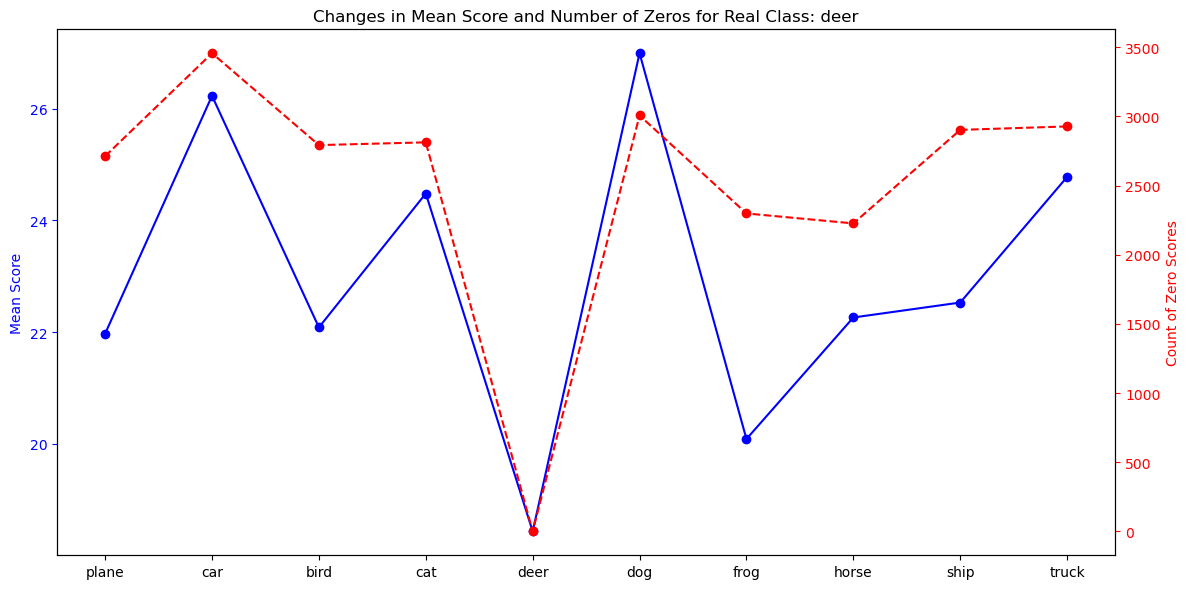

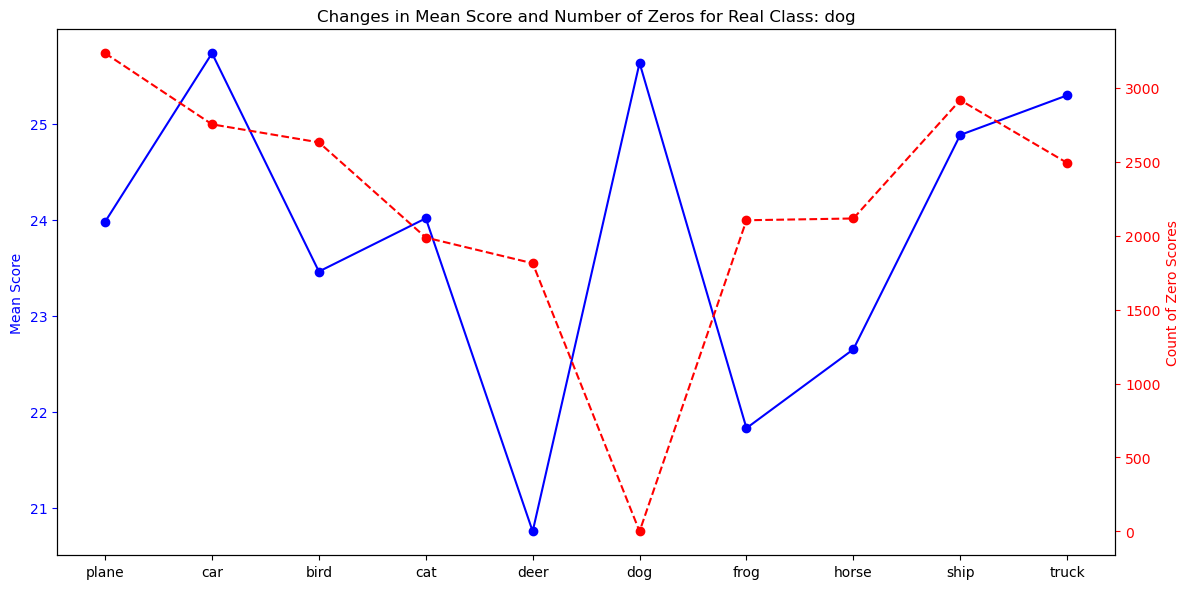

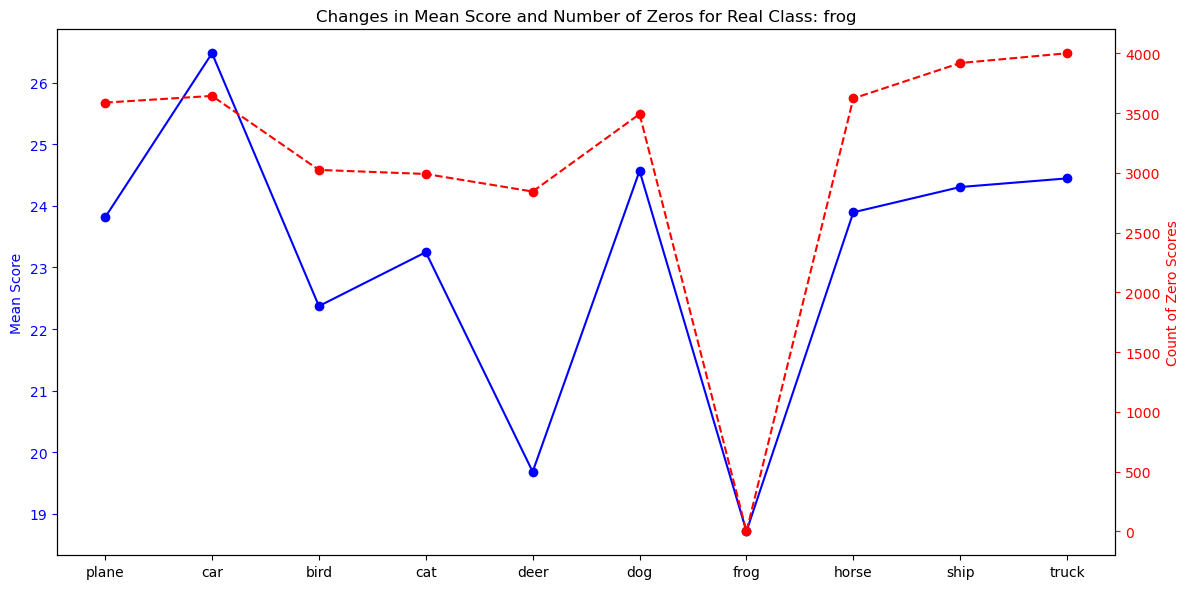

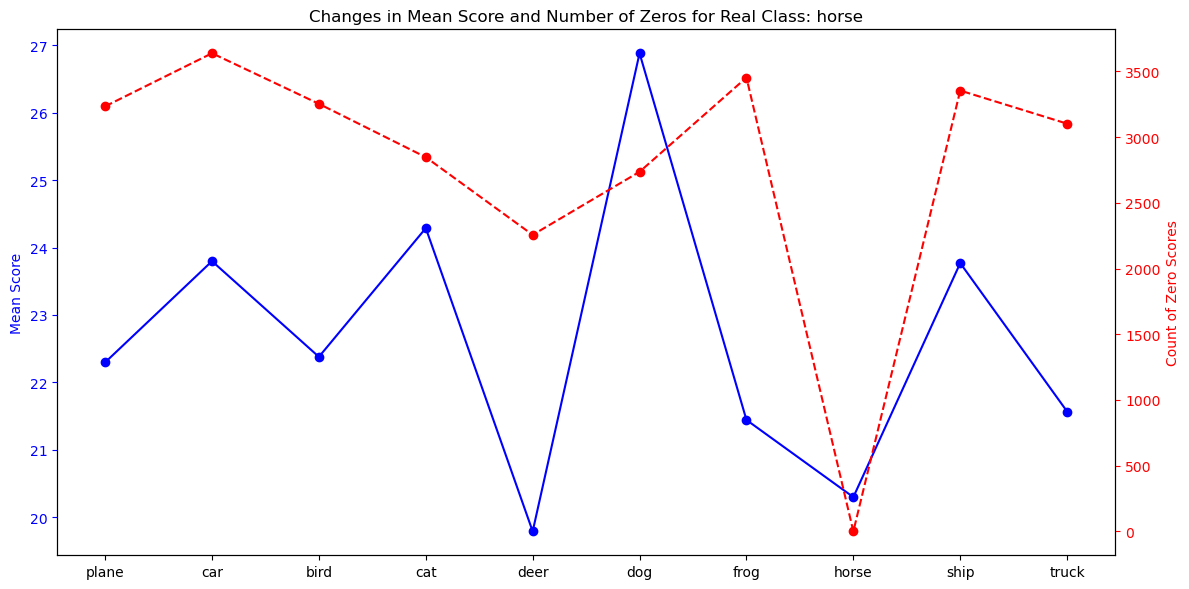

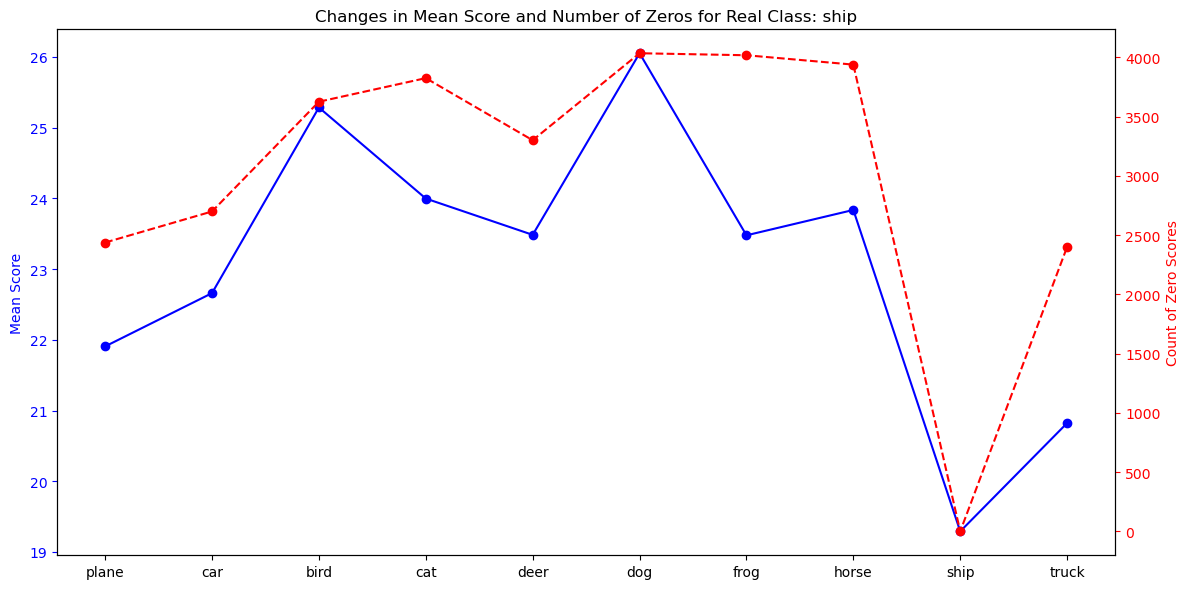

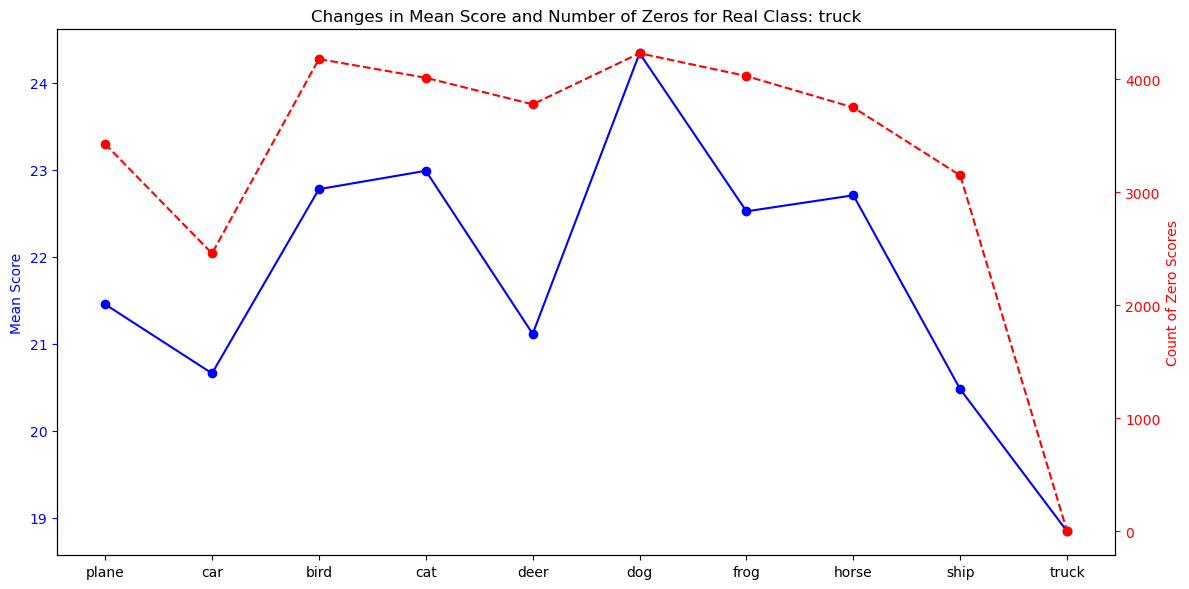

In [8]:
class_names = list(classDict.keys())

# Iterate through each real class
for i, real_class in enumerate(class_names):
    plt.figure(figsize=(12, 6))
    
    # Left y-axis represents the mean score
    plt.plot(class_names, mean_scores_matrix[i], color='b', marker='o', label='Mean Rarity Score')
    plt.ylabel('Mean Score', color='b')
    plt.tick_params('y', colors='b')
    
    # Second y-axis for the number of zeros
    ax2 = plt.twinx()
    ax2.plot(class_names, zero_scores_count_matrix[i], color='r', marker='o', linestyle='--', label='Number of Zeros')
    ax2.set_ylabel('Count of Zero Scores', color='r')
    ax2.tick_params('y', colors='r')
    
    plt.title(f'Changes in Mean Score and Number of Zeros for Real Class: {real_class}')
    plt.xlabel('Generated Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 9 against remain plot

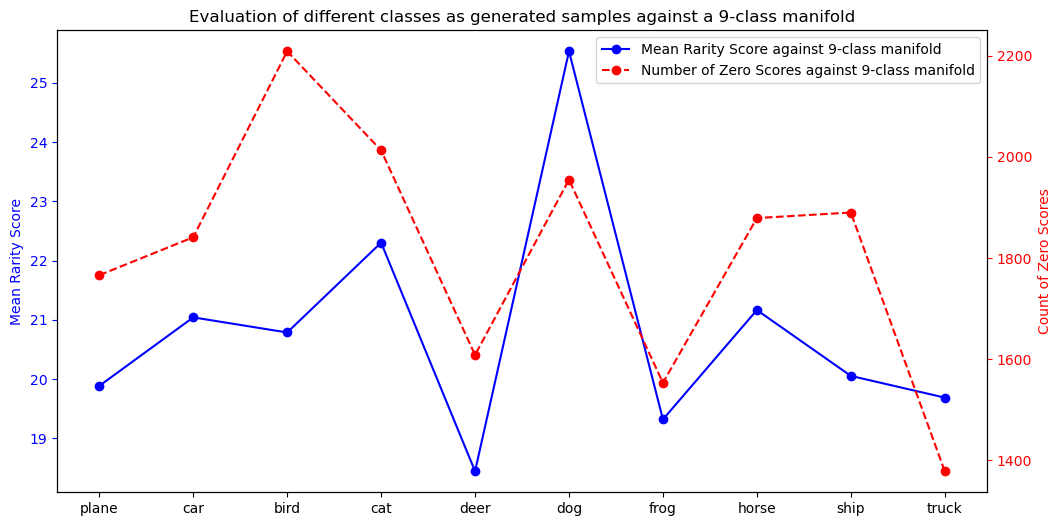

20.819963089383673
[19.882884498978633, 21.03976348425104, 20.784657701135547, 22.301686433451785, 18.44092698028045, 25.533087173020768, 19.31641216611365, 21.163644791938285, 20.05164140684515, 19.68492625782142]
[1766, 1841, 2209, 2013, 1608, 1955, 1553, 1879, 1890, 1378]


In [135]:
mean_scores_reamin = []
zero_scores_reamin = []

for filename in os.listdir('result/9_class_against_remain/'):
    _, classname = filename.split('_')
    classindex = classname.removesuffix(".txt")
    
    scores = np.loadtxt(os.path.join('result/9_class_against_remain/', filename))
    mean_scores_reamin.append(np.mean(scores[scores!=0]))
    zero_scores_reamin.append(np.sum(scores == 0))
    


# Left y-axis represents the mean score
plt.figure(figsize=(12, 6))
line1, = plt.plot(class_names, mean_scores_reamin, color='b', marker='o', label='Mean Rarity Score against 9-class manifold')
plt.ylabel('Mean Rarity Score', color='b')
plt.tick_params('y', colors='b')

# Second y-axis for the number of zeros
ax2 = plt.twinx()
line2, = ax2.plot(class_names, zero_scores_reamin, color='r', marker='o', linestyle='--', label='Number of Zero Scores against 9-class manifold')
ax2.set_ylabel('Count of Zero Scores', color='r')
ax2.tick_params('y', colors='r')

plt.title('Evaluation of different classes as generated samples against a 9-class manifold')
plt.xlabel('Generated Class (against other 9 classes)')
plt.xticks(rotation=45)

# Combine legends of both the axes
lines = [line1, line2]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

# plt.tight_layout()

plt.show()

print(np.mean(mean_scores_reamin))
print(mean_scores_reamin)
print(zero_scores_reamin)

# Add Gaussian Noise Experiment

In [143]:
def plot_2axes(path):

    mean_scores_noise = []
    zero_scores_noise = []
    sigmas = []

    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            _, _, sigma = filename.split('_')
            sigma = sigma.removesuffix(".txt")
            sigmas.append(sigma)
            
            scores = np.loadtxt(os.path.join(path, filename))
            scores_non_zero = scores[scores != 0]
            # mean = np.mean(scores_non_zero) if scores_non_zero.size else 0
            mean_scores_noise.append(scores_non_zero)
            zero_scores_noise.append(np.sum(scores == 0))

    # sigmas to float for plotting
    sigmas_float = [float(s) for s in sigmas]

    # Sort results based on sigma values
    sorted_indices = np.argsort(sigmas_float)
    sigmas_sorted = np.array(sigmas_float)[sorted_indices]
    mean_scores_sorted = np.array(mean_scores_noise)[sorted_indices]
    zero_scores_sorted = np.array(zero_scores_noise)[sorted_indices]

    plt.figure(figsize=(14, 7))
    # Left y-axis will represent the mean score
    line1, = plt.plot(sigmas_sorted, mean_scores_sorted, color='b', marker='o', label='Mean Rarity Score with Gaussian Noise without 0')
    plt.ylabel('Mean Rarity Score', color='b')
    plt.tick_params('y', colors='b')

    # Second y-axis for the number of zeros
    ax2 = plt.twinx()
    line2, = ax2.plot(sigmas_sorted, zero_scores_sorted, color='r', marker='o', linestyle='--', label='Number of Zero Scores with Gaussian Noise', alpha=0.2)
    ax2.set_ylabel('Count of Zero Scores', color='r')
    ax2.tick_params('y', colors='r')

    plt.title('Effect of Gaussian Noise on Rarity Score')
    plt.xlabel('Sigma (Noise Level)')
    plt.xticks(rotation=45)

    # Combine legends of both the axes
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    plt.legend(lines, labels, loc='upper left')

    # plt.tight_layout()
    plt.show()
    print(mean_scores_sorted)
    print(zero_scores_sorted)
    print(sigmas_sorted)
    



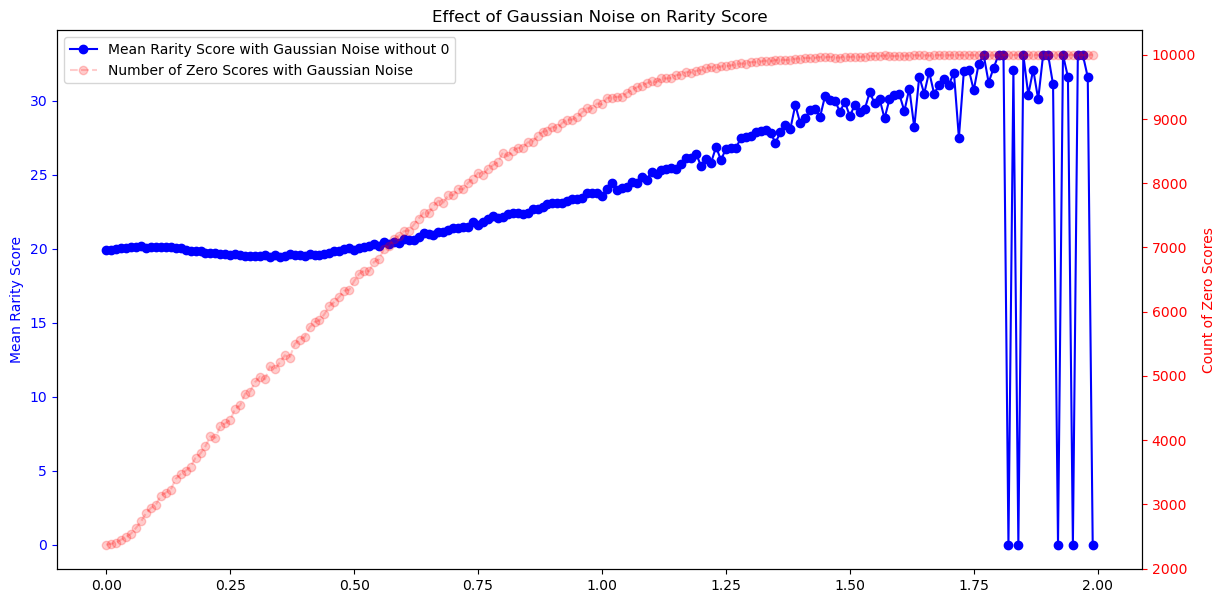

[19.94181108 19.93174061 19.9655849  20.01977619 20.04218992 20.12745357
 20.10944269 20.16491704 20.0566597  20.13840258 20.13168833 20.11953264
 20.08359591 20.12430185 20.0269492  20.05521687 19.9344689  19.85877414
 19.87237056 19.83963032 19.71822242 19.70183916 19.71595584 19.61553645
 19.66742411 19.54113429 19.65860152 19.56490456 19.50587627 19.48196294
 19.4814284  19.48480581 19.57840142 19.43429752 19.58188195 19.44418998
 19.47352128 19.64805129 19.58582837 19.57241014 19.5132918  19.66041675
 19.5534737  19.5802711  19.64532831 19.68952092 19.86253469 19.85254718
 19.96891482 20.04266972 19.92858856 20.05043222 20.1395573  20.21083653
 20.32087736 20.19829206 20.41737666 20.31701199 20.46166457 20.41129001
 20.67010322 20.61158886 20.60329722 20.77443819 21.04534272 20.99953188
 20.89604427 21.12115543 21.13220148 21.2905127  21.38931613 21.37526802
 21.45230411 21.45643245 21.78376898 21.56845739 21.81891549 22.01533991
 22.21850431 22.0890967  22.13361884 22.3340483  22

In [144]:
# plot_2axes('result/add_gaussian_noise/')
plot_2axes('result/add_gaussian_noise_trial_2/')